In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline


In [2]:
IRS_data = pd.read_csv('/Users/chrislele/Downloads/IRSIncomeByZipCode.csv')

In [3]:
IRS_data.head()

STATE  ZIPCODE  Number of returns  Adjusted gross income (AGI)    Avg AGI  \
0    AL        0            2022380                    105089761  51.963410   
1    AL    35004               4930                       255534  51.832454   
2    AL    35005               3300                       128387  38.905152   
3    AL    35006               1230                        58302  47.400000   
4    AL    35007              11990                       643708  53.687073   

   Number of returns with total income  Total income amount  Avg total income  \
0                              2022380            106420533         52.621433   
1                                 4930               258024         52.337525   
2                                 3300               129390         39.209091   
3                                 1230                58585         47.630081   
4                                11990               651350         54.324437   

   Number of returns with taxable income  Taxable income amount  \
0                                1468370               67850874   
1                                   4020                 163859   
2                                   2440                  70760   
3                                    940                  36341   
4                                   9280                 414878   

   Avg taxable income  
0           46.208295  
1           40.760945  
2           29.000000  
3           38.660638  
4           44.706681

In [4]:
SAT_info = pd.read_csv('/Users/chrislele/Downloads/scores.csv')

In [5]:
SAT_info.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   

                                                                           2    \
School ID                                                               01M539   
School Name                  New Explorations into Science, Technology and ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia Street   
City                                                                 Manhattan   
State                                                    

In [6]:
nyc_zipcodes = SAT_info['Zip Code'].unique()

filtered_irs_data = IRS_data[IRS_data['ZIPCODE'].isin(nyc_zipcodes)][['ZIPCODE', 'Avg total income']]
filtered_irs_data.rename(columns={'ZIPCODE': 'Zip Code'}, inplace=True)

merged_data = SAT_info.merge(filtered_irs_data, on='Zip Code', how='left')

In [7]:
merged_data.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   
Avg total income                                     155.101676   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   
Avg total income                                                     46.846786   

                                                                           2    \
School ID                                                               01M539   
School Name                  New Explorations into Science, Technology and ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia 

In [8]:
missing = pd.concat([merged_data.isnull().sum(), 100 * merged_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

count          %
Average Score (SAT Writing)     60  13.793103
Average Score (SAT Reading)     60  13.793103
Average Score (SAT Math)        60  13.793103
Percent Tested                  49  11.264368
Percent Asian                    7   1.609195
Percent Hispanic                 7   1.609195
Percent Black                    7   1.609195
Percent White                    7   1.609195
Student Enrollment               7   1.609195
Start Time                       4   0.919540
End Time                         4   0.919540
School ID                        0   0.000000
School Name                      0   0.000000
Phone Number                     0   0.000000
Longitude                        0   0.000000
Latitude                         0   0.000000
Zip Code                         0   0.000000
State                            0   0.000000
City                             0   0.000000
Street Address                   0   0.000000
Building Code                    0   0.000000
Borough                          0   0.000000
Avg total income                 0   0.000000

In [9]:
NYC_Housing = pd.read_csv('/Users/chrislele/Downloads/NYC Housing Sales.csv')

In [10]:
NYC_Housing.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7         -    2016-12-14 00:00:00  
2                              C7         -    2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [11]:
NYC_Housing.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [12]:
import numpy as np

# Replace '-' with NaN
NYC_Housing['SALE PRICE'] = NYC_Housing['SALE PRICE'].replace('-', np.nan)

# Count non-null values
non_null_values = NYC_Housing['SALE PRICE'].notnull().sum()

# Count null values
null_values = len(NYC_Housing) - non_null_values

print("Number of null values in 'SALE PRICE':", null_values)

Number of null values in 'SALE PRICE': 0


In [13]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_1000 = len(NYC_Housing[NYC_Housing['SALE PRICE'] > 1000])

print("Number of values greater than 1000 in 'SALE PRICE':", count_greater_than_1000)

Number of values greater than 1000 in 'SALE PRICE': 58604


In [14]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_100 = len(NYC_Housing[NYC_Housing['GROSS SQUARE FEET'] > 100])

print("Number of values greater than 100 in 'GROSS SQUARE FEET':", count_greater_than_100)

Number of values greater than 100 in 'GROSS SQUARE FEET': 45514


In [15]:
# Convert 'SALE PRICE' and 'GROSS SQUARE FEET' columns to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Create 'Avg_price_sqft' column by dividing 'SALE PRICE' by 'GROSS SQUARE FEET'
NYC_Housing['Avg_price_sqft'] = NYC_Housing['SALE PRICE'] / NYC_Housing['GROSS SQUARE FEET']

In [16]:
NYC_Housing['Avg_price_sqft'].info

<bound method Series.info of 0        1028.726708
1                NaN
2                NaN
3         579.374742
4        1733.477790
            ...     
84543     174.757282
84544     231.384098
84545     307.486631
84546     182.374986
84547      28.875000
Name: Avg_price_sqft, Length: 84548, dtype: float64>

In [17]:
# Remove NaN values from 'Avg_price_sqft' column
NYC_Housing_cleaned = NYC_Housing.dropna(subset=['Avg_price_sqft'])

# View head of cleaned DataFrame
NYC_Housing_cleaned['Avg_price_sqft'].head(50)

0      1028.726708
3       579.374742
4      1733.477790
6       755.522953
9       876.315932
11      838.056680
22      709.346686
73      767.712218
172     982.142857
173    1286.554922
174    1279.288985
195    1031.790296
206    1926.070039
207       0.001769
208       0.001769
209       0.001769
212    1556.850141
214    2228.187919
216    4253.056885
218    2058.823529
219    1638.888889
220    2629.848784
221    1079.963235
222     250.211690
223      65.843602
224      99.584518
227    3442.622951
230     843.137255
231     868.192581
232     965.575147
233     850.000000
234     231.248743
239      29.689600
277      23.114754
831    2025.228325
832       0.002995
834    1855.183270
928    4240.196078
929    3016.505407
931    1326.705701
932     990.243902
937    1360.759494
938    2255.866206
940    5263.157895
941    2715.189873
943    2481.854367
945     933.333333
947    2305.064322
949     726.088583
950    1143.075690
Name: Avg_price_sqft, dtype: float64

In [18]:
NYC_Housing_filtered = NYC_Housing[NYC_Housing['Avg_price_sqft'] >= 20]
NYC_Housing_filtered.head(100)

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0              4        1  ALPHABET CITY   
3              7        1  ALPHABET CITY   
4              8        1  ALPHABET CITY   
6             10        1  ALPHABET CITY   
9             13        1  ALPHABET CITY   
...          ...      ...            ...   
2050        2054        1        FASHION   
2051        2055        1        FASHION   
2058        2062        1        FASHION   
2059        2063        1        FASHION   
2064        2068        1        FASHION   

                          BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0     07 RENTALS - WALKUP APARTMENTS                                2A    392   
3     07 RENTALS - WALKUP APARTMENTS                                2B    402   
4     07 RENTALS - WALKUP APARTMENTS                                2A    404   
6     07 RENTALS - WALKUP APARTMENTS                                2B    406   
9     08 RENTALS - ELEVATOR APARTMENTS                               2    387   
...                                           ...                  ...    ...   
2050  21 OFFICE BUILDINGS                                            4    833   
2051  21 OFFICE BUILDINGS                                            4    838   
2058  23 LOFT BUILDINGS                                              4    762   
2059  23 LOFT BUILDINGS                                              4    785   
2064  25 LUXURY HOTELS                                               4    760   

      LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0       6                                  C2            153 AVENUE B  ...   
3      21                                  C4     154 EAST 7TH STREET  ...   
4      55                                  C2  301 EAST 10TH   STREET  ...   
6      32                                  C4            210 AVENUE B  ...   
9     153                                  D9     629 EAST 5TH STREET  ...   
...   ...       ...                       ...                     ...  ...   
2050   11                                  O4           1250 BROADWAY  ...   
2051   12                                  O6   53 WEST 36TH   STREET  ...   
2058   61                                  L1  338 WEST 39TH   STREET  ...   
2059   75                                  L3  260 WEST 36TH   STREET  ...   
2064   18                                  H2  341 WEST 36TH   STREET  ...   

     COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                   0            5              1633             6440.0   
3                   0           10              2272             6794.0   
4                   0            6              2369             4615.0   
6                   0            8              1750             4226.0   
9                   0           24              4489            18523.0   
...               ...          ...               ...                ...   
2050               55           55             30750           645977.0   
2051               17           17              5925            64300.0   
2058               12           12              4937            55473.0   
2059               12           12              7266            81375.0   
2064                1            1              7406            81000.0   

      YEAR BUILT TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0           1900                         2                              C2   
3           1913                         2                              C4   
4           1900                         2                              C2   
6           1920                         2                              C4   
9           1920                         2                              D9   
...          ...                       ...                             ...   
2050        1969                         4                              O4   
2051        1911                         4

In [19]:
print(merged_data.columns)
print(NYC_Housing.columns)

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income'],
      dtype='object')
Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')


In [21]:
# Check the existing column names in NYC_Housing DataFrame
print(NYC_Housing.columns)



Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')


In [20]:
NYC_Housing.head(2).T

0  \
Unnamed: 0                                                                4   
BOROUGH                                                                   1   
NEIGHBORHOOD                                                  ALPHABET CITY   
BUILDING CLASS CATEGORY         07 RENTALS - WALKUP APARTMENTS                
TAX CLASS AT PRESENT                                                     2A   
BLOCK                                                                   392   
LOT                                                                       6   
EASE-MENT                                                                     
BUILDING CLASS AT PRESENT                                                C2   
ADDRESS                                                        153 AVENUE B   
APARTMENT NUMBER                                                              
ZIP CODE                                                              10009   
RESIDENTIAL UNITS                                                         5   
COMMERCIAL UNITS                                                          0   
TOTAL UNITS                                                               5   
LAND SQUARE FEET                                                       1633   
GROSS SQUARE FEET                                                    6440.0   
YEAR BUILT                                                             1900   
TAX CLASS AT TIME OF SALE                                                 2   
BUILDING CLASS AT TIME OF SALE                                           C2   
SALE PRICE                                                        6625000.0   
SALE DATE                                               2017-07-19 00:00:00   
Avg_price_sqft                                                  1028.726708   

                                                                          1  
Unnamed: 0                                                                5  
BOROUGH                                                                   1  
NEIGHBORHOOD                                                  ALPHABET CITY  
BUILDING CLASS CATEGORY         07 RENTALS - WALKUP APARTMENTS               
TAX CLASS AT PRESENT                                                      2  
BLOCK                                                                   399  
LOT                                                                      26  
EASE-MENT                                                                    
BUILDING CLASS AT PRESENT                                                C7  
ADDRESS                                               234 EAST 4TH   STREET  
APARTMENT NUMBER                                                             
ZIP CODE                                                              10009  
RESIDENTIAL UNITS                                                        28  
COMMERCIAL UNITS                                                          3  
TOTAL UNITS                                                              31  
LAND SQUARE FEET                                                       4616  
GROSS SQUARE FEET                                                   18690.0  
YEAR BUILT                                                             1900  
TAX CLASS AT TIME OF SALE                                                 2  
BUILDING CLASS AT TIME OF SALE                                           C7  
SALE PRICE                                                              NaN  
SALE DATE                                               2016-12-14 00:00:00  
Avg_price_sqft                                                          NaN

In [21]:
# Rename 'ZIP CODE' column to 'Zip Code' in NYC_Housing
NYC_Housing.rename(columns={'ZIP CODE': 'Zip Code'}, inplace=True)




In [22]:
display(NYC_Housing.columns, merged_data.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'Zip Code',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income'],
      dtype='object')

In [23]:
# Select columns from NYC_Housing
columns_to_merge = ['BUILDING CLASS AT PRESENT', 'TOTAL UNITS', 'Zip Code','GROSS SQUARE FEET', 'SALE PRICE', 'SALE DATE', 'Avg_price_sqft']

# Merge DataFrames
#merged_data = merged_data.merge(NYC_Housing[columns_to_merge], on='Zip Code', how='left')

md = merged_data.merge(NYC_Housing[columns_to_merge].groupby('Zip Code').median().reset_index(), on='Zip Code', how='left')

# View head of the merged DataFrame
#merged_data.head()
md.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   
Avg total income                                     155.101676   
TOTAL UNITS                                                 1.0   
GROSS SQUARE FEET                                       19453.0   
SALE PRICE                                            1750000.0   
Avg_price_sqft                                       990.243902   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                         

In [24]:
md.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   
Avg total income                                     155.101676   
TOTAL UNITS                                                 1.0   
GROSS SQUARE FEET                                       19453.0   
SALE PRICE                                            1750000.0   
Avg_price_sqft                                       990.243902   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                         

In [25]:
ST_ratio = pd.read_csv('/Users/chrislele/Downloads/2015_-_2016_Final_Class_Size_Report_Pupil-to-Teacher_Ratio__PTR_.csv')



In [26]:
ST_ratio

DBN                                        School Name  \
0     15K001                                P.S. 001 THE BERGEN   
1     12X691                                BRONX LITTLE SCHOOL   
2     11X567                      LINDEN TREE ELEMENTARY SCHOOL   
3     09X555                      MOUNT EDEN CHILDREN'S ACADEMY   
4     12X536                                             PS 536   
...      ...                                                ...   
1566  20K223                             J.H.S. 223 THE MONTAUK   
1567  32K168          THE BROOKLYN SCHOOL FOR MATH AND RESEARCH   
1568  17K122  PATHWAYS IN TECHNOLOGY EARLY COLLEGE HIGH SCHO...   
1569  14K071                 JUAN MOREL CAMPOS SECONDARY SCHOOL   
1570  18K068                           I.S. 068 ISAAC BILDERSEE   

      School Pupil-Teacher Ratio  
0                           13.4  
1                           12.0  
2                           16.9  
3                           18.1  
4                           14.8  
...                          ...  
1566                        14.9  
1567                        13.6  
1568                        19.8  
1569                        10.7  
1570                        10.2  

[1571 rows x 3 columns]

In [27]:
md.T

0    \
School ID                                                02M260   
School Name                  Clinton School Writers and Artists   
Borough                                               Manhattan   
Building Code                                              M933   
Street Address                             425 West 33rd Street   
City                                                  Manhattan   
State                                                        NY   
Zip Code                                                  10001   
Latitude                                               40.75321   
Longitude                                             -73.99786   
Phone Number                                       212-695-9114   
Start Time                                                  NaN   
End Time                                                    NaN   
Student Enrollment                                          NaN   
Percent White                                               NaN   
Percent Black                                               NaN   
Percent Hispanic                                            NaN   
Percent Asian                                               NaN   
Average Score (SAT Math)                                    NaN   
Average Score (SAT Reading)                                 NaN   
Average Score (SAT Writing)                                 NaN   
Percent Tested                                              NaN   
Avg total income                                     155.101676   
TOTAL UNITS                                                 1.0   
GROSS SQUARE FEET                                       19453.0   
SALE PRICE                                            1750000.0   
Avg_price_sqft                                       990.243902   

                                                                           1    \
School ID                                                               06M211   
School Name                  Inwood Early College for Health and Informatio...   
Borough                                                              Manhattan   
Building Code                                                             M052   
Street Address                                              650 Academy Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.86605   
Longitude                                                            -73.92486   
Phone Number                                                    718-935-3660     
Start Time                                                             8:30 AM   
End Time                                                               3:00 PM   
Student Enrollment                                                        87.0   
Percent White                                                             3.4%   
Percent Black                                                            21.8%   
Percent Hispanic                                                         67.8%   
Percent Asian                                                             4.6%   
Average Score (SAT Math)                                                   NaN   
Average Score (SAT Reading)                                                NaN   
Average Score (SAT Writing)                                                NaN   
Percent Tested                                                             NaN   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                         

In [28]:
ST_ratio.columns

Index(['DBN', 'School Name', 'School Pupil-Teacher Ratio'], dtype='object')

In [29]:
md['School Name'] = md['School Name'].apply(lambda x: x.upper())


In [30]:
# Assuming 'ST_ratio' is the DataFrame containing the 'School Pupil-Teacher Ratio' column
md_merged_data = md.merge(ST_ratio[['School Name', 'School Pupil-Teacher Ratio']], on='School Name', how='left')

In [31]:
df_unmatched = pd.DataFrame(md_merged_data[md_merged_data['School Pupil-Teacher Ratio'].isnull()]['School Name'].unique())

In [32]:
df_unmatched = df_unmatched.rename(columns={0: 'School Name'})
df_unmatched['New Name'] = ''
df_unmatched

School Name New Name
0                  CLINTON SCHOOL WRITERS AND ARTISTS         
1        URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW         
2              HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY         
3   URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN         
4   47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...         
..                                                ...      ...
85  QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...         
86          YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS         
87                  QUEENS COLLEGIATE (COLLEGE BOARD)         
88                  HILLSIDE ARTS AND LETTERS ACADEMY         
89      ACADEMY OF MEDICAL TECHNOLOGY (COLLEGE BOARD)         

[90 rows x 2 columns]

In [33]:
df_unmatched.to_csv('lookup_names_missing.csv')

<AxesSubplot:xlabel='Average Score (SAT Math)', ylabel='School Pupil-Teacher Ratio'>

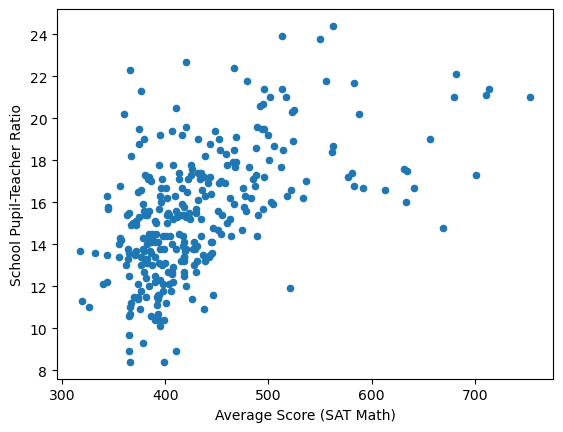

In [34]:
md_merged_data.plot(x="Average Score (SAT Math)", y="School Pupil-Teacher Ratio", kind='scatter')

In [35]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("ACADEMY OF MEDICAL TECHNOLOGY")

DBN                                        School Name  \
1276  27Q309  ACADEMY OF MEDICAL TECHNOLOGY: A COLLEGE BOARD...   

      School Pupil-Teacher Ratio  
1276                        12.8

In [36]:
Edited_File = pd.read_csv('/Users/chrislele/Downloads/lookup_names_missing.csv')

In [37]:
df_unmatched['School Name'].update(Edited_File['School Name'])
print(df_unmatched['School Name'].head())

0                   CLINTON SCHOOL WRITERS AND ARTISTS
1         URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW
2               HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
3    URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN
4    47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...
Name: School Name, dtype: object


In [38]:
nan_count = df_unmatched['School Name'].isna().sum()
print("Number of NaN values in 'School Name' column: ", nan_count)

Number of NaN values in 'School Name' column:  0


In [39]:
df_unmatched.head(100)

School Name New Name
0                  CLINTON SCHOOL WRITERS AND ARTISTS         
1        URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW         
2              HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY         
3   URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN         
4   47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...         
..                                                ...      ...
85  QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...         
86          YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS         
87                  QUEENS COLLEGIATE (COLLEGE BOARD)         
88                  HILLSIDE ARTS AND LETTERS ACADEMY         
89      ACADEMY OF MEDICAL TECHNOLOGY (COLLEGE BOARD)         

[90 rows x 2 columns]

In [40]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("NYC LAB SCHOOL FOR COLLABORATIVE STUDIES")

Empty DataFrame
Columns: [DBN, School Name, School Pupil-Teacher Ratio]
Index: []

In [41]:
print(df_unmatched.columns)

Index(['School Name', 'New Name'], dtype='object')


In [42]:
md_merged_data[(md_merged_data['Average Score (SAT Math)'].isnull())] 

School ID                                        School Name    Borough  \
0      02M260                 CLINTON SCHOOL WRITERS AND ARTISTS  Manhattan   
1      06M211  INWOOD EARLY COLLEGE FOR HEALTH AND INFORMATIO...  Manhattan   
15     02M546                   ACADEMY FOR SOFTWARE ENGINEERING  Manhattan   
16     02M533           UNION SQUARE ACADEMY FOR HEALTH SCIENCES  Manhattan   
28     02M047  47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...  Manhattan   
31     02M422                                     QUEST TO LEARN  Manhattan   
33     02M534                     HARVEST COLLEGIATE HIGH SCHOOL  Manhattan   
36     02M605                     HUMANITIES PREPARATORY ACADEMY  Manhattan   
42     02M432                                MURRAY HILL ACADEMY  Manhattan   
49     02M135     URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGEMENT  Manhattan   
62     03M859                               SPECIAL MUSIC SCHOOL  Manhattan   
77     04M372                      ESPERANZA PREPARATORY ACADEMY  Manhattan   
85     06M423          HIGH SCHOOL FOR EXCELLENCE AND INNOVATION  Manhattan   
86     05M157          URBAN ASSEMBLY SCHOOL FOR GLOBAL COMMERCE  Manhattan   
91     02M280     MANHATTAN EARLY COLLEGE SCHOOL FOR ADVERTISING  Manhattan   
93     02M282                       URBAN ASSEMBLY MAKER ACADEMY  Manhattan   
94     02M139  STEPHEN T. MATHER BUILDING ARTS AND CRAFTSMANS...  Manhattan   
116    07X522              BRONX DESIGN AND CONSTRUCTION ACADEMY      Bronx   
125    09X327                 COMPREHENSIVE MODEL SCHOOL PROJECT      Bronx   
127    07X223        LABORATORY SCHOOL OF FINANCE AND TECHNOLOGY      Bronx   
130    07X520         FOREIGN LANGUAGE ACADEMY OF GLOBAL STUDIES      Bronx   
132    07X259  HERO HIGH (HEALTH, EDUCATION, AND RESEARCH OCC...      Bronx   
137    08X559                 SCHOOL FOR TOURISM AND HOSPITALITY      Bronx   
146    09X564                CLAREMONT INTERNATIONAL HIGH SCHOOL      Bronx   
150    09X276                               LEADERSHIP INSTITUTE      Bronx   
151    09X350                    NEW DIRECTIONS SECONDARY SCHOOL      Bronx   
160    10X524                  CROTONA INTERNATIONAL HIGH SCHOOL      Bronx   
162    10X264      BRONX ACADEMY FOR SOFTWARE ENGINEERING (BASE)      Bronx   
165    10X565              HIGH SCHOOL FOR ENERGY AND TECHNOLOGY      Bronx   
179    08X348              SCHUYLERVILLE PREPARATORY HIGH SCHOOL      Bronx   
181    08X558                         WESTCHESTER SQUARE ACADEMY      Bronx   
182    08X320                             PELHAM LAB HIGH SCHOOL      Bronx   
184    08X349                            BRONX RIVER HIGH SCHOOL      Bronx   
206    10X353                             WORLD VIEW HIGH SCHOOL      Bronx   
211    10X351                    BRONX COLLABORATIVE HIGH SCHOOL      Bronx   
226    08X432                          BRONX BRIDGES HIGH SCHOOL      Bronx   
229    08X561                          BRONX COMPASS HIGH SCHOOL      Bronx   
250    30Q258                            ENERGY TECH HIGH SCHOOL     Queens   
254    15K423                     BROOKLYN FRONTIERS HIGH SCHOOL   Brooklyn   
264    17K745                BROOKLYN INSTITUTE FOR LIBERAL ARTS   Brooklyn   
278    14K322                                FOUNDATIONS ACADEMY   Brooklyn   
279    14K614        YOUNG WOMEN'S LEADERSHIP SCHOOL OF BROOKLYN   Brooklyn   
291    19K764  URBAN ASSEMBLY SCHOOL FOR COLLABORATIVE HEALTH...   Brooklyn   
292    19K422                      SPRING CREEK COMMUNITY SCHOOL   Brooklyn   
311    16K765           NELSON MANDELA SCHOOL FOR SOCIAL JUSTICE   Brooklyn   
324    15K592                KHALIL GIBRAN INTERNATIONAL ACADEMY   Brooklyn   
332    16K393     FREDERICK DOUGLASS ACADEMY IV SECONDARY SCHOOL   Brooklyn   
355    23K644                     EAGLE ACADEMY FOR YOUNG MEN II   Brooklyn   
358    22K611                                ORIGINS HIGH SCHOOL   Brooklyn   
368    32K168              BROOKLYN SCHOOL FOR MATH AN

In [43]:
new_data = md_merged_data.dropna()

In [44]:
new_data.shape

(298, 28)

In [45]:
new_data.head()

School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Math) Average Score (SAT Reading)  \
2  -73.97943  ...                    657.0                       601.0   
3  -73.98953  ...                    395.0                       411.0   
4  -73.98953  ...                    418.0                       428.0   
5  -73.98953  ...                    613.0                       453.0   
6  -73.98526  ...                    410.0                       406.0   

  Average Score (SAT Writing)  Percent Tested Avg total income TOTAL UNITS  \
2                       601.0           91.0%        46.846786         0.0   
3                       387.0           78.9%        46.846786         0.0   
4                       415.0           65.1%        46.846786         0.0   
5                       463.0           95.9%        46.846786         0.0   
6                       381.0           59.7%        46.846786         0.0   

  GROSS SQUARE FEET SALE PRICE  Avg_price_sqft  School Pupil-Teacher Ratio  
2           10230.0   845000.0     1016.835017                        19.0  
3           10230.0   845000.0     1016.835017                        13.8  
4           10230.0   845000.0     1016.835017                        13.4  
5           10230.0   845000.0     1016.835017                        16.6  
6           10230.0   845000.0     1016.835017                         8.9  

[5 rows x 28 columns]

In [46]:
new_data['Percent Tested'] = new_data['Percent Tested'].str.replace('%', '').astype(float) / 100

# Display the updated dataframe
print(new_data.head())

  School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Math) Average Score (SAT Reading)  \


/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/163798216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent Tested'] = new_data['Percent Tested'].str.replace('%', '').astype(float) / 100


In [47]:
new_data['SAT Cumulative Score'] = new_data['Average Score (SAT Math)'] + new_data['Average Score (SAT Reading)'] + new_data['Average Score (SAT Writing)']

# Display the updated dataframe
print(grouped_data.head())

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/1901828677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['SAT Cumulative Score'] = new_data['Average Score (SAT Math)'] + new_data['Average Score (SAT Reading)'] + new_data['Average Score (SAT Writing)']


NameError: name 'grouped_data' is not defined

In [48]:
new_data.T

2    \
School ID                                                               01M539   
School Name                  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.71873   
Longitude                                                            -73.97943   
Phone Number                                                      212-677-5190   
Start Time                                                             8:15 AM   
End Time                                                               4:00 PM   
Student Enrollment                                                      1735.0   
Percent White                                                            28.6%   
Percent Black                                                            13.3%   
Percent Hispanic                                                         18.0%   
Percent Asian                                                            38.5%   
Average Score (SAT Math)                                                 657.0   
Average Score (SAT Reading)                                              601.0   
Average Score (SAT Writing)                                              601.0   
Percent Tested                                                            0.91   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                                            845000.0   
Avg_price_sqft                                                     1016.835017   
School Pupil-Teacher Ratio                                                19.0   
SAT Cumulative Score                                                    1859.0   

                                              3    \
School ID                                  02M294   
School Name                  ESSEX STREET ACADEMY   
Borough                                 Manhattan   
Building Code                                M445   
Street Address                   350 Grand Street   
City                                    Manhattan   
State                                          NY   
Zip Code                                    10002   
Latitude                                 40.71687   
Longitude                               -73.98953   
Phone Number                         212-475-4773   
Start Time                                8:00 AM   
End Time                                  2:45 PM   
Student Enrollment                          358.0   
Percent White                               11.7%   
Percent Black                               38.5%   
Percent Hispanic                            41.3%   
Percent Asian                                5.9%   
Average Score (SAT Math)                    395.0   
Average Score (SAT Reading)                 411.0   
Average Score (SAT Writing)                 387.0   
Percent Tested                              0.789   
Avg total income                        46.846786   
TOTAL UNITS                                   0.0   
GROSS SQUARE FEET                         10230.0   
SALE PRICE                               845000.0   
Avg_price_sqft                        1016.835017   
School Pupil-Teacher Ratio                   13.8   
SAT Cumulative Score                       1193.0   

                       

In [49]:
new_data['Percent White'] = new_data['Percent White'].str.replace('%', '').astype(float) / 100
new_data['Percent Black'] = new_data['Percent Black'].str.replace('%', '').astype(float) / 100
new_data['Percent Hispanic'] = new_data['Percent Hispanic'].str.replace('%', '').astype(float) / 100
new_data['Percent Asian'] = new_data['Percent Asian'].str.replace('%', '').astype(float) / 100

# Display the updated dataframe
print(new_data.head())

  School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Reading) Average Score (SAT Writing) 

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/3860259273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent White'] = new_data['Percent White'].str.replace('%', '').astype(float) / 100
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/3860259273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent Black'] = new_data['Percent Black'].str.replace('%', '').astype(float) / 100
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/3

In [50]:
grouped_data = new_data.groupby('Zip Code').agg({
    'Avg total income': 'mean',
    'Avg_price_sqft': 'mean',
    'Average Score (SAT Math)': 'mean',
    'Average Score (SAT Reading)': 'mean',
    'Average Score (SAT Writing)': 'mean',
    'GROSS SQUARE FEET': 'mean',
    'SALE PRICE': 'mean',
    'School Pupil-Teacher Ratio': 'mean',
    'Percent Tested': 'mean',
    'Percent White': 'mean',
    'Percent Black': 'mean',
    'Percent Hispanic': 'mean',
    'Percent Asian': 'mean',
    'Student Enrollment': 'mean',
    'SAT Cumulative Score': 'mean'  
})

# Display the grouped data
grouped_data.head()

Avg total income  Avg_price_sqft  Average Score (SAT Math)  \
Zip Code                                                               
10002            46.846786     1016.835017                     481.3   
10003           212.309032     1103.710015                     450.5   
10004           350.689535      696.494817                     478.0   
10006           181.589407     1563.542836                     429.5   
10009            72.640410      892.857143                     454.0   

          Average Score (SAT Reading)  Average Score (SAT Writing)  \
Zip Code                                                             
10002                           453.9                        443.1   
10003                           446.0                        435.5   
10004                           476.0                        468.0   
10006                           419.0                        419.5   
10009                           428.0                        445.0   

          GROSS SQUARE FEET  SALE PRICE  School Pupil-Teacher Ratio  \
Zip Code                                                              
10002               10230.0    845000.0                      14.080   
10003                7692.0   1225000.0                      16.125   
10004              143730.0   1075000.0                      14.700   
10006              130054.0   2520168.0                      17.100   
10009                9464.0    952000.0                      14.500   

          Percent Tested  Percent White  Percent Black  Percent Hispanic  \
Zip Code                                                                   
10002            0.72840        0.10590        0.24850           0.39160   
10003            0.74575        0.19875        0.22425           0.38825   
10004            0.77600        0.18100        0.20800           0.42900   
10006            0.60850        0.05800        0.25400           0.54500   
10009            0.85200        0.08300        0.22100           0.57900   

          Percent Asian  Student Enrollment  SAT Cumulative Score  
Zip Code                                                           
10002          0.227500          522.300000                1378.3  
10003          0.156000          757.250000                1332.0  
10004          0.158333          557.333333                1422.0  
10006          0.128000          747.500000                1268.0  
10009          0.094000          666.000000                1327.0

In [51]:
new_data.head()

School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Reading) Average Score (SAT Writing)  \
2  -73.97943  ...                       601.0                       601.0   
3  -73.98953  ...                       411.0                       387.0   
4  -73.98953  ...                       428.0                       415.0   
5  -73.98953  ...                       453.0                       463.0   
6  -73.98526  ...                       406.0                       381.0   

  Percent Tested  Avg total income  TOTAL UNITS  GROSS SQUARE FEET  \
2          0.910         46.846786          0.0            10230.0   
3          0.789         46.846786          0.0            10230.0   
4          0.651         46.846786          0.0            10230.0   
5          0.959         46.846786          0.0            10230.0   
6          0.597         46.846786          0.0            10230.0   

   SALE PRICE  Avg_price_sqft  School Pupil-Teacher Ratio  \
2    845000.0     1016.835017                        19.0   
3    845000.0     1016.835017                        13.8   
4    845000.0     1016.835017                        13.4   
5    845000.0     1016.835017                        16.6   
6    845000.0     1016.835017                         8.9   

   SAT Cumulative Score  
2                1859.0  
3                1193.0  
4                1261.0  
5                1529.0  
6                1197.0  

[5 rows x 29 columns]

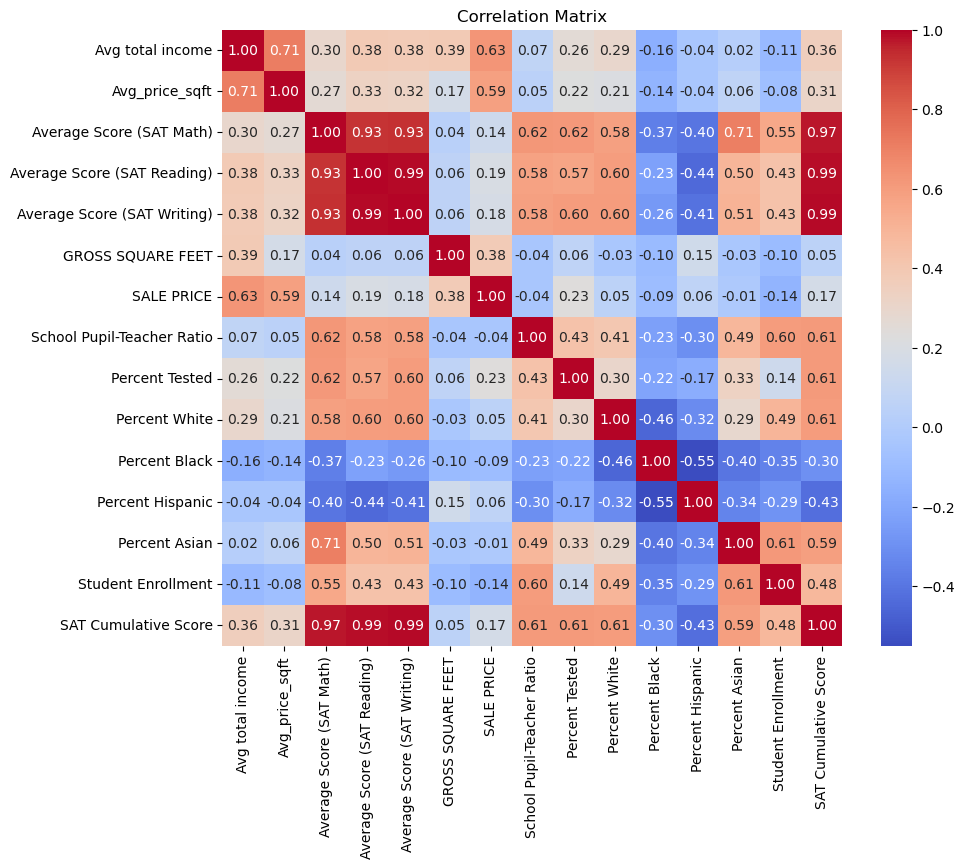

In [52]:
correlation_matrix = grouped_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

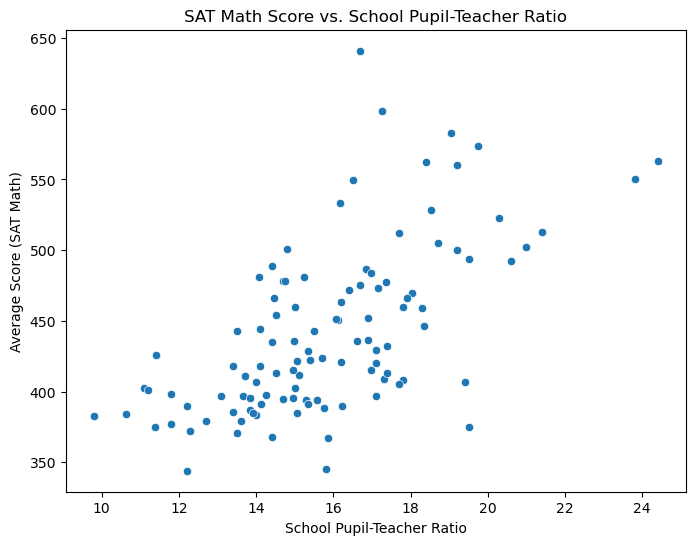

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='School Pupil-Teacher Ratio', y='Average Score (SAT Math)', data=grouped_data)
plt.title('SAT Math Score vs. School Pupil-Teacher Ratio')
plt.xlabel('School Pupil-Teacher Ratio')
plt.ylabel('Average Score (SAT Math)')
plt.show()

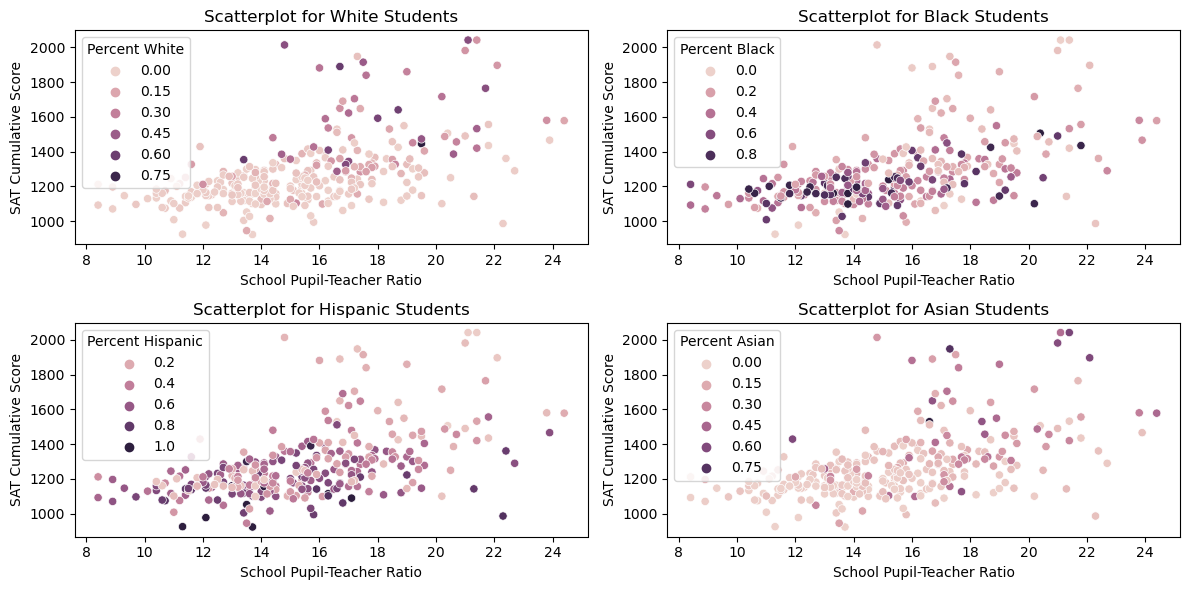

In [54]:
# Create scatterplot for White students
plt.figure(figsize=(12, 6))

# Create scatterplot for White students
plt.subplot(2, 2, 1)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent White')
plt.title("Scatterplot for White Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Black students
plt.subplot(2, 2, 2)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent Black')
plt.title("Scatterplot for Black Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Hispanic students
plt.subplot(2, 2, 3)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent Hispanic')
plt.title("Scatterplot for Hispanic Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Asian students
plt.subplot(2, 2, 4)
sns.scatterplot(data=new_data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent Asian')
plt.title("Scatterplot for Asian Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.ylabel("SAT Cumulative Score")

# Adjust layout
plt.tight_layout()

# Show all scatterplots
plt.show()

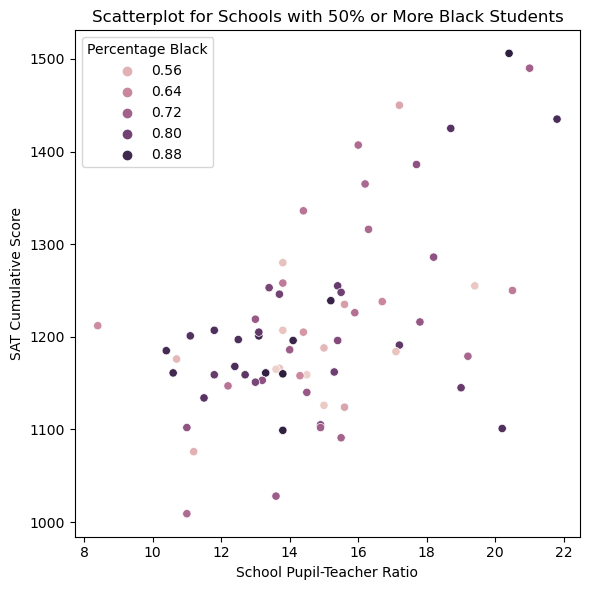

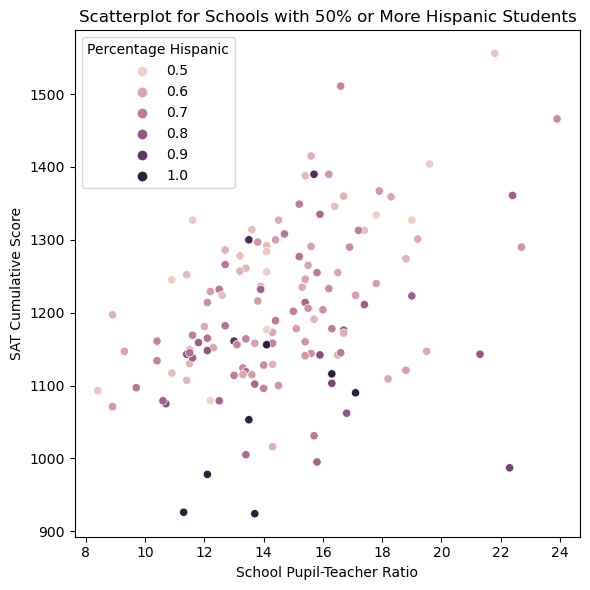

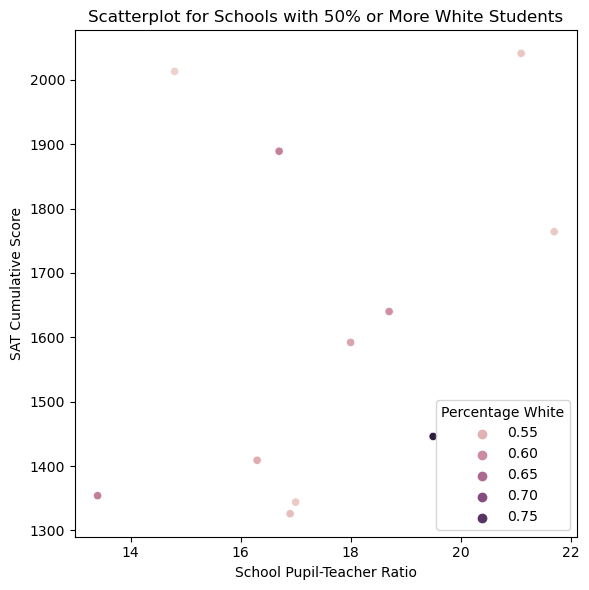

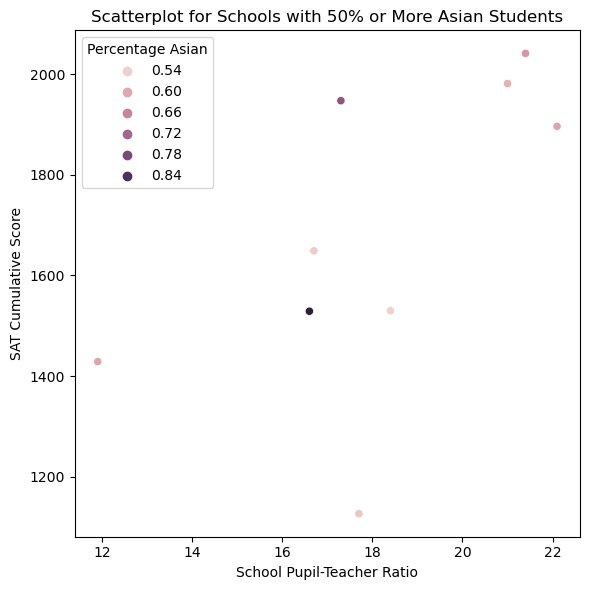

In [55]:
# Create a function to generate scatterplots
def create_scatterplot(data, ethnicity, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=data, x='School Pupil-Teacher Ratio', y='SAT Cumulative Score', hue='Percent ' + ethnicity)
    plt.title(title)
    plt.xlabel("School Pupil-Teacher Ratio")
    plt.ylabel("SAT Cumulative Score")
    plt.legend(title='Percentage ' + ethnicity)
    plt.tight_layout()
    plt.show()

# Filter data for each ethnicity
black_data = new_data[new_data['Percent Black'] >= .50]
hispanic_data = new_data[new_data['Percent Hispanic'] >= .50]
white_data = new_data[new_data['Percent White'] >= .50]
asian_data = new_data[new_data['Percent Asian'] >= .50]

# Create scatterplots for each ethnicity
create_scatterplot(black_data, 'Black', "Scatterplot for Schools with 50% or More Black Students")
create_scatterplot(hispanic_data, 'Hispanic', "Scatterplot for Schools with 50% or More Hispanic Students")
create_scatterplot(white_data, 'White', "Scatterplot for Schools with 50% or More White Students")
create_scatterplot(asian_data, 'Asian', "Scatterplot for Schools with 50% or More Asian Students")



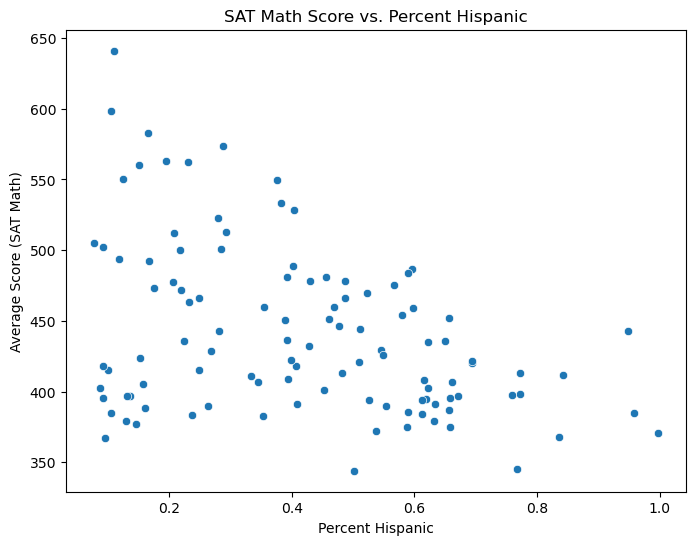

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Percent Hispanic', y='Average Score (SAT Math)', data=grouped_data)
plt.title('SAT Math Score vs. Percent Hispanic')
plt.xlabel('Percent Hispanic')
plt.ylabel('Average Score (SAT Math)')
plt.show()

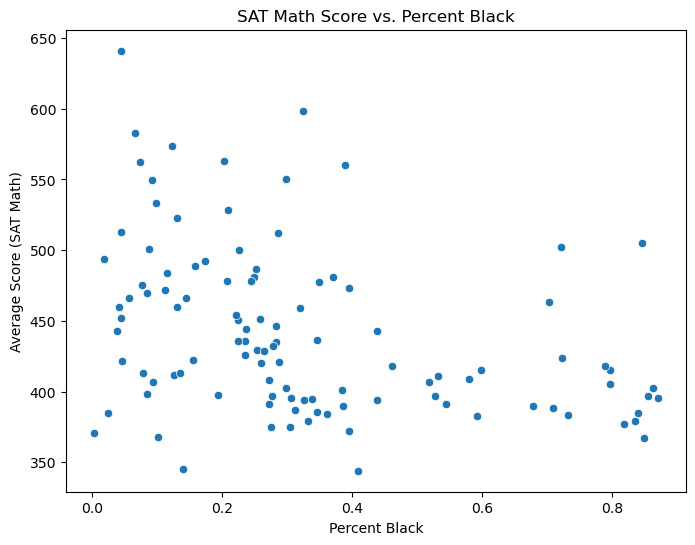

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Percent Black', y='Average Score (SAT Math)', data=grouped_data)
plt.title('SAT Math Score vs. Percent Black')
plt.xlabel('Percent Black')
plt.ylabel('Average Score (SAT Math)')
plt.show()

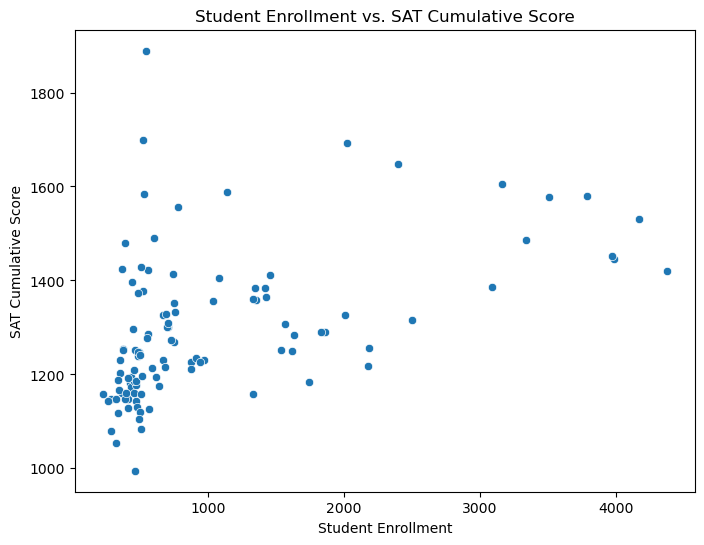

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='SAT Cumulative Score', data=grouped_data)
plt.title('Student Enrollment vs. SAT Cumulative Score')
plt.xlabel('Student Enrollment')
plt.ylabel('SAT Cumulative Score')
plt.show()

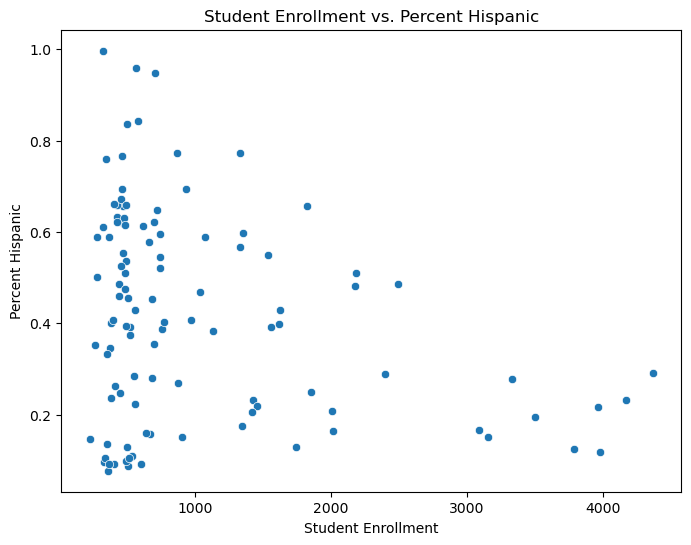

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='Percent Hispanic', data=grouped_data)
plt.title('Student Enrollment vs. Percent Hispanic')
plt.xlabel('Student Enrollment')
plt.ylabel('Percent Hispanic')
plt.show()

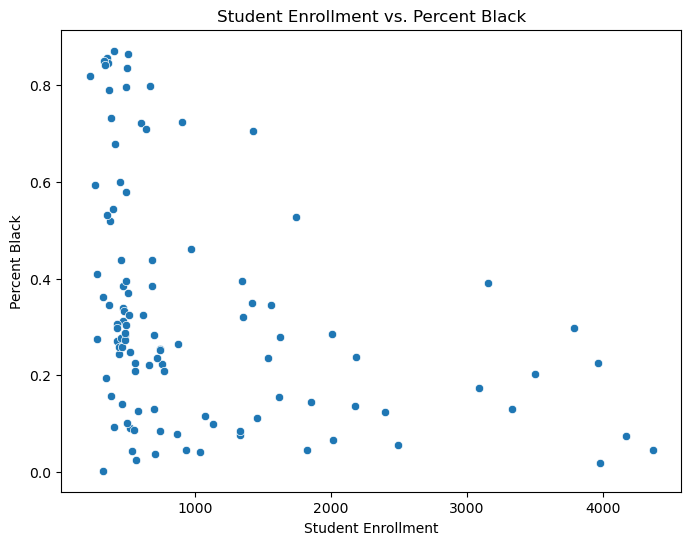

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='Percent Black', data=grouped_data)
plt.title('Student Enrollment vs. Percent Black')
plt.xlabel('Student Enrollment')
plt.ylabel('Percent Black')
plt.show()

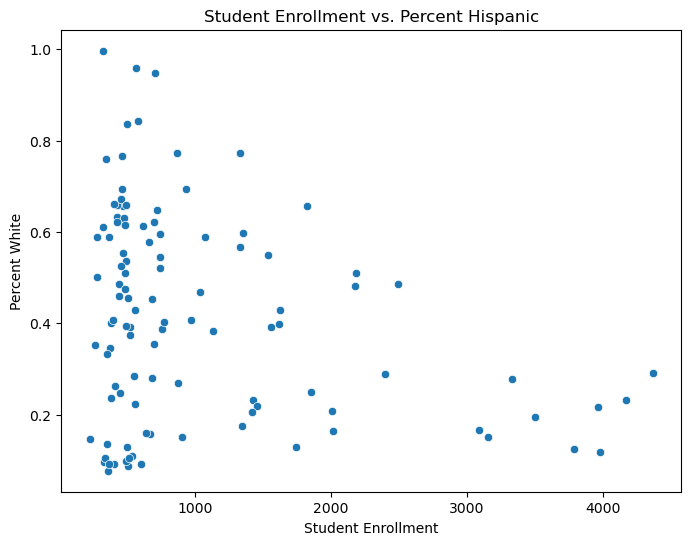

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='Percent Hispanic', data=grouped_data)
plt.title('Student Enrollment vs. Percent Hispanic')
plt.xlabel('Student Enrollment')
plt.ylabel('Percent White')
plt.show()

In [62]:
schools_with_50_percent_white = new_data.query("`Percent White` >= .50")
num_schools_with_50_percent_white = len(schools_with_50_percent_white)
print("Number of schools with at least 50% white students:", num_schools_with_50_percent_white)

schools_with_50_percent_black = new_data.query("`Percent Black` >= .50")
num_schools_with_50_percent_black = len(schools_with_50_percent_black)
print("Number of schools with at least 50% black students:", num_schools_with_50_percent_black)

schools_with_50_percent_hispanic = new_data.query("`Percent Hispanic` >= .50")
num_schools_with_50_percent_hispanic = len(schools_with_50_percent_hispanic)
print("Number of schools with at least 50% hispanic students:", num_schools_with_50_percent_hispanic)

Number of schools with at least 50% white students: 11
Number of schools with at least 50% black students: 70
Number of schools with at least 50% hispanic students: 138


In [63]:
schools_with_50_percent_black = new_data.query("`Percent Black` >= .50")
num_schools_with_50_percent_black = len(schools_with_50_percent_black)
print("Number of schools with at least 50% black students:", num_schools_with_50_percent_black)

Number of schools with at least 50% black students: 70


In [64]:
# Filter schools with at least 50% black students
schools_with_50_percent_black = new_data[new_data['Percent Black'] >= .50]

# Calculate total enrollment for schools with at least 50% black students
total_enrollment_50_percent_black = schools_with_50_percent_black['Student Enrollment'].sum()

# Filter schools with at least 50% Hispanic students
schools_with_50_percent_hispanic = new_data[new_data['Percent Hispanic'] >= .50]

# Calculate total enrollment for schools with at least 50% Hispanic students
total_enrollment_50_percent_hispanic = schools_with_50_percent_hispanic['Student Enrollment'].sum()

print("Total enrollment of schools with at least 50% black students:", total_enrollment_50_percent_black)
print("Total enrollment of schools with at least 50% Hispanic students:", total_enrollment_50_percent_hispanic)

Total enrollment of schools with at least 50% black students: 35820.0
Total enrollment of schools with at least 50% Hispanic students: 81783.0


In [65]:
# Filter schools with less than 1000 students enrolled
small_schools = new_data[new_data['Student Enrollment'] < 1000]

# Calculate the percentage of black, Hispanic, and white students in small schools
percent_black_small_schools = (small_schools['Percent Black'].mean() * 100)
percent_hispanic_small_schools = (small_schools['Percent Hispanic'].mean() * 100)
percent_white_small_schools = (small_schools['Percent White'].mean() * 100)

print("Percentage of black students in small schools:", percent_black_small_schools)
print("Percentage of Hispanic students in small schools:", percent_hispanic_small_schools)
print("Percentage of white students in small schools:", percent_white_small_schools)

Percentage of black students in small schools: 36.68502024291498
Percentage of Hispanic students in small schools: 46.65384615384616
Percentage of white students in small schools: 6.905263157894735


In [66]:
percent_black = (new_data['Percent Black'].mean() * 100)
percent_hispanic = (new_data['Percent Hispanic'].mean() * 100)
percent_white = (new_data['Percent White'].mean() * 100)

print("Percentage of black students in all schools:", percent_black)
print("Percentage of hispanic students in all schools:", percent_hispanic)
print("Percentage of white students in all schools:", percent_white)

Percentage of black students in all schools: 34.179865771812096
Percentage of hispanic students in all schools: 44.55234899328859
Percentage of white students in all schools: 8.93926174496645


In [67]:
import statsmodels.api as sm

X = new_data[['Student Enrollment', 'School Pupil-Teacher Ratio']]
y_math = new_data['Average Score (SAT Math)']
y_reading = new_data['Average Score (SAT Reading)']
y_writing = new_data['Average Score (SAT Writing)']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Create and fit regression models for each SAT score component
reg_math = sm.OLS(y_math, X).fit()
reg_reading = sm.OLS(y_reading, X).fit()
reg_writing = sm.OLS(y_writing, X).fit()

# Get regression summary for each model
print("Regression summary for Math scores:")
print(reg_math.summary())

print("Regression summary for Reading scores:")
print(reg_reading.summary())

print("Regression summary for Writing scores:")
print(reg_writing.summary())


Regression summary for Math scores:
                               OLS Regression Results                               
Dep. Variable:     Average Score (SAT Math)   R-squared:                       0.334
Model:                                  OLS   Adj. R-squared:                  0.329
Method:                       Least Squares   F-statistic:                     73.89
Date:                      Sat, 26 Aug 2023   Prob (F-statistic):           9.66e-27
Time:                              13:50:07   Log-Likelihood:                -1633.8
No. Observations:                       298   AIC:                             3274.
Df Residuals:                           295   BIC:                             3285.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [68]:
import statsmodels.api as sm

# Assuming 'new_data' contains the necessary columns for analysis
# 'SAT Cumulative Score' is the dependent variable, and 'Avg total income', 'Percent White', 'School Pupil-Teacher Ratio', and 'Student Enrollment' are independent variables

# Create a new dataframe containing the independent variables
X = new_data[['Avg total income', 'Percent White', 'School Pupil-Teacher Ratio', 'Student Enrollment']]

# Add a constant column to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = new_data['SAT Cumulative Score']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     SAT Cumulative Score   R-squared:                       0.501
Model:                              OLS   Adj. R-squared:                  0.494
Method:                   Least Squares   F-statistic:                     73.52
Date:                  Sat, 26 Aug 2023   Prob (F-statistic):           4.52e-43
Time:                          13:50:18   Log-Likelihood:                -1889.3
No. Observations:                   298   AIC:                             3789.
Df Residuals:                       293   BIC:                             3807.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [69]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'new_data'

# Create interaction terms between 'Average Score (SAT Math)' and 'Race'
new_data['Math_Score_Race_White'] = new_data['Average Score (SAT Math)'] * new_data['Percent White']
new_data['Math_Score_Race_Black'] = new_data['Average Score (SAT Math)'] * new_data['Percent Black']
# Add other combinations for different races

# Create interaction terms between 'Average Score (SAT Math)' and 'School Size' or 'School Pupil-Teacher Ratio' if applicable

# Fit the multiple linear regression model with the interaction terms
X = new_data[['Avg total income', 'Percent White', 'Percent Black', 'Math_Score_Race_White', 'Math_Score_Race_Black']]
X = sm.add_constant(X)
y = new_data['SAT Cumulative Score']

model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     SAT Cumulative Score   R-squared:                       0.807
Model:                              OLS   Adj. R-squared:                  0.803
Method:                   Least Squares   F-statistic:                     243.4
Date:                  Sat, 26 Aug 2023   Prob (F-statistic):          6.93e-102
Time:                          13:50:23   Log-Likelihood:                -1748.1
No. Observations:                   298   AIC:                             3508.
Df Residuals:                       292   BIC:                             3530.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/4099881213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Math_Score_Race_White'] = new_data['Average Score (SAT Math)'] * new_data['Percent White']
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/4099881213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Math_Score_Race_Black'] = new_data['Average Score (SAT Math)'] * new_data['Percent Black']


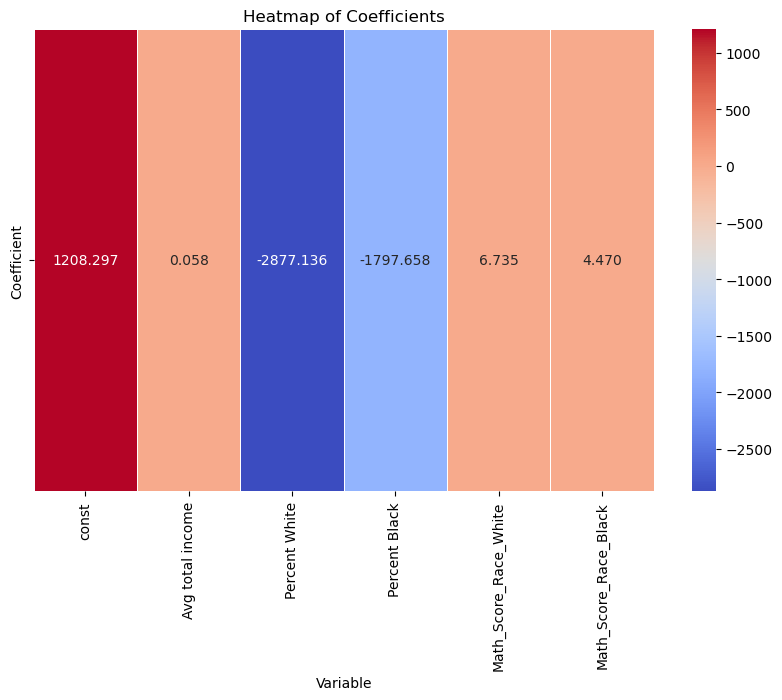

In [70]:
import seaborn as sns


coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.params})
coefficients = coefficients.set_index('Variable')

# Plot a heatmap of the coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(coefficients.transpose(), cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Coefficients")
plt.show()

In [71]:
new_data.describe()

Zip Code    Latitude   Longitude  Student Enrollment  \
count    298.000000  298.000000  298.000000          298.000000   
mean   10745.637584   40.739713  -73.925858          784.855705   
std      534.864490    0.084404    0.070462          823.219018   
min    10002.000000   40.528230  -74.192150          142.000000   
25%    10314.000000   40.679530  -73.979260          387.500000   
50%    10472.500000   40.734965  -73.927030          482.500000   
75%    11216.750000   40.820045  -73.888230          678.250000   
max    11694.000000   40.887920  -73.739650         5447.000000   

       Percent White  Percent Black  Percent Hispanic  Percent Asian  \
count     298.000000     298.000000        298.000000     298.000000   
mean        0.089393       0.341799          0.445523       0.106279   
std         0.137529       0.249453          0.243546       0.146321   
min         0.000000       0.000000          0.033000       0.000000   
25%         0.013000       0.151250          0.223250       0.016000   
50%         0.027000       0.284000          0.454500       0.047000   
75%         0.099000       0.463250          0.630500       0.119750   
max         0.799000       0.912000          1.000000       0.889000   

       Average Score (SAT Math)  Average Score (SAT Reading)  ...  \
count                298.000000                   298.000000  ...   
mean                 432.348993                   422.852349  ...   
std                   71.394897                    61.924672  ...   
min                  317.000000                   302.000000  ...   
25%                  384.000000                   385.000000  ...   
50%                  414.000000                   411.000000  ...   
75%                  459.750000                   445.000000  ...   
max                  714.000000                   672.000000  ...   

       Percent Tested  Avg total income  TOTAL UNITS  GROSS SQUARE FEET  \
count      298.000000        298.000000   298.000000         298.000000   
mean         0.640191         76.534842     1.308725        8406.862416   
std          0.194769         86.663253     0.755668       24278.831643   
min          0.185000         23.858969     0.000000           0.000000   
25%          0.488000         30.625892     1.000000        1532.000000   
50%          0.633500         41.524048     1.000000        2115.000000   
75%          0.794250         65.057690     2.000000        3600.000000   
max          1.000000        497.786169     3.000000      143730.000000   

         SALE PRICE  Avg_price_sqft  School Pupil-Teacher Ratio  \
count  2.980000e+02      298.000000                  298.000000   
mean   5.960630e+05             inf                   15.415436   
std    4.733559e+05             NaN                    3.015118   
min    1.000000e+05        0.442180                    8.400000   
25%    3.006250e+05      202.035900                   13.400000   
50%    4.417250e+05      378.787879                   15.350000   
75%    8.450000e+05      961.337031                   17.200000   
max    4.210000e+06             inf                   24.400000   

       SAT Cumulative Score  Math_Score_Race_White  Math_Score_Race_Black  
count            298.000000             298.000000             298.000000  
mean            1272.067114              44.399497             141.380953  
std              194.444115              74.653493              99.694186  
min              924.000000               0.000000               0.000000  
25%             1151.250000               5.112250              70.857500  
50%             1223.500000              11.043000             117.776000  
75%             1332.250000              42.481250             190.289500  
max             2041.000000             394.706000             477.225000  

[8 rows x 21 columns]

In [72]:
new_data['Percent White'].mean()

0.0893926174496645

In [73]:
mean_scores_by_zip = new_data.groupby('Zip Code')['SAT Cumulative Score'].mean().reset_index()
mean_scores_by_zip = mean_scores_by_zip.rename(columns={'SAT Cumulative Score': 'mean_SAT_score_by_zip'})
new_data = pd.merge(new_data, mean_scores_by_zip, on='Zip Code', how='left')

In [74]:
new_data.T

0    \
School ID                                                               01M539   
School Name                  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.71873   
Longitude                                                            -73.97943   
Phone Number                                                      212-677-5190   
Start Time                                                             8:15 AM   
End Time                                                               4:00 PM   
Student Enrollment                                                      1735.0   
Percent White                                                            0.286   
Percent Black                                                            0.133   
Percent Hispanic                                                          0.18   
Percent Asian                                                            0.385   
Average Score (SAT Math)                                                 657.0   
Average Score (SAT Reading)                                              601.0   
Average Score (SAT Writing)                                              601.0   
Percent Tested                                                            0.91   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                                            845000.0   
Avg_price_sqft                                                     1016.835017   
School Pupil-Teacher Ratio                                                19.0   
SAT Cumulative Score                                                    1859.0   
Math_Score_Race_White                                                  187.902   
Math_Score_Race_Black                                                   87.381   
mean_SAT_score_by_zip                                                   1378.3   

                                              1    \
School ID                                  02M294   
School Name                  ESSEX STREET ACADEMY   
Borough                                 Manhattan   
Building Code                                M445   
Street Address                   350 Grand Street   
City                                    Manhattan   
State                                          NY   
Zip Code                                    10002   
Latitude                                 40.71687   
Longitude                               -73.98953   
Phone Number                         212-475-4773   
Start Time                                8:00 AM   
End Time                                  2:45 PM   
Student Enrollment                          358.0   
Percent White                               0.117   
Percent Black                               0.385   
Percent Hispanic                            0.413   
Percent Asian                               0.059   
Average Score (SAT Math)                    395.0   
Average Score (SAT Reading)                 411.0   
Average Score (SAT Writing)                 387.0   
Percent Tested                              0.789   
Avg total income                        46.846786   
TOTAL UNITS                                   0.0   
GROSS SQUARE FEET                         1

In [75]:
new_data['mean_SAT_score_by_zip'].head()

0    1378.3
1    1378.3
2    1378.3
3    1378.3
4    1378.3
Name: mean_SAT_score_by_zip, dtype: float64

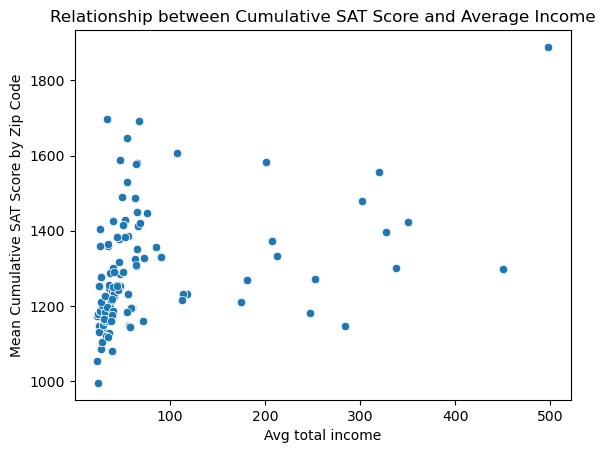

In [76]:
sns.scatterplot(data=new_data, x='Avg total income', y='mean_SAT_score_by_zip')
plt.title('Relationship between Cumulative SAT Score and Average Income')
plt.xlabel('Avg total income')
plt.ylabel('Mean Cumulative SAT Score by Zip Code')
plt.show()

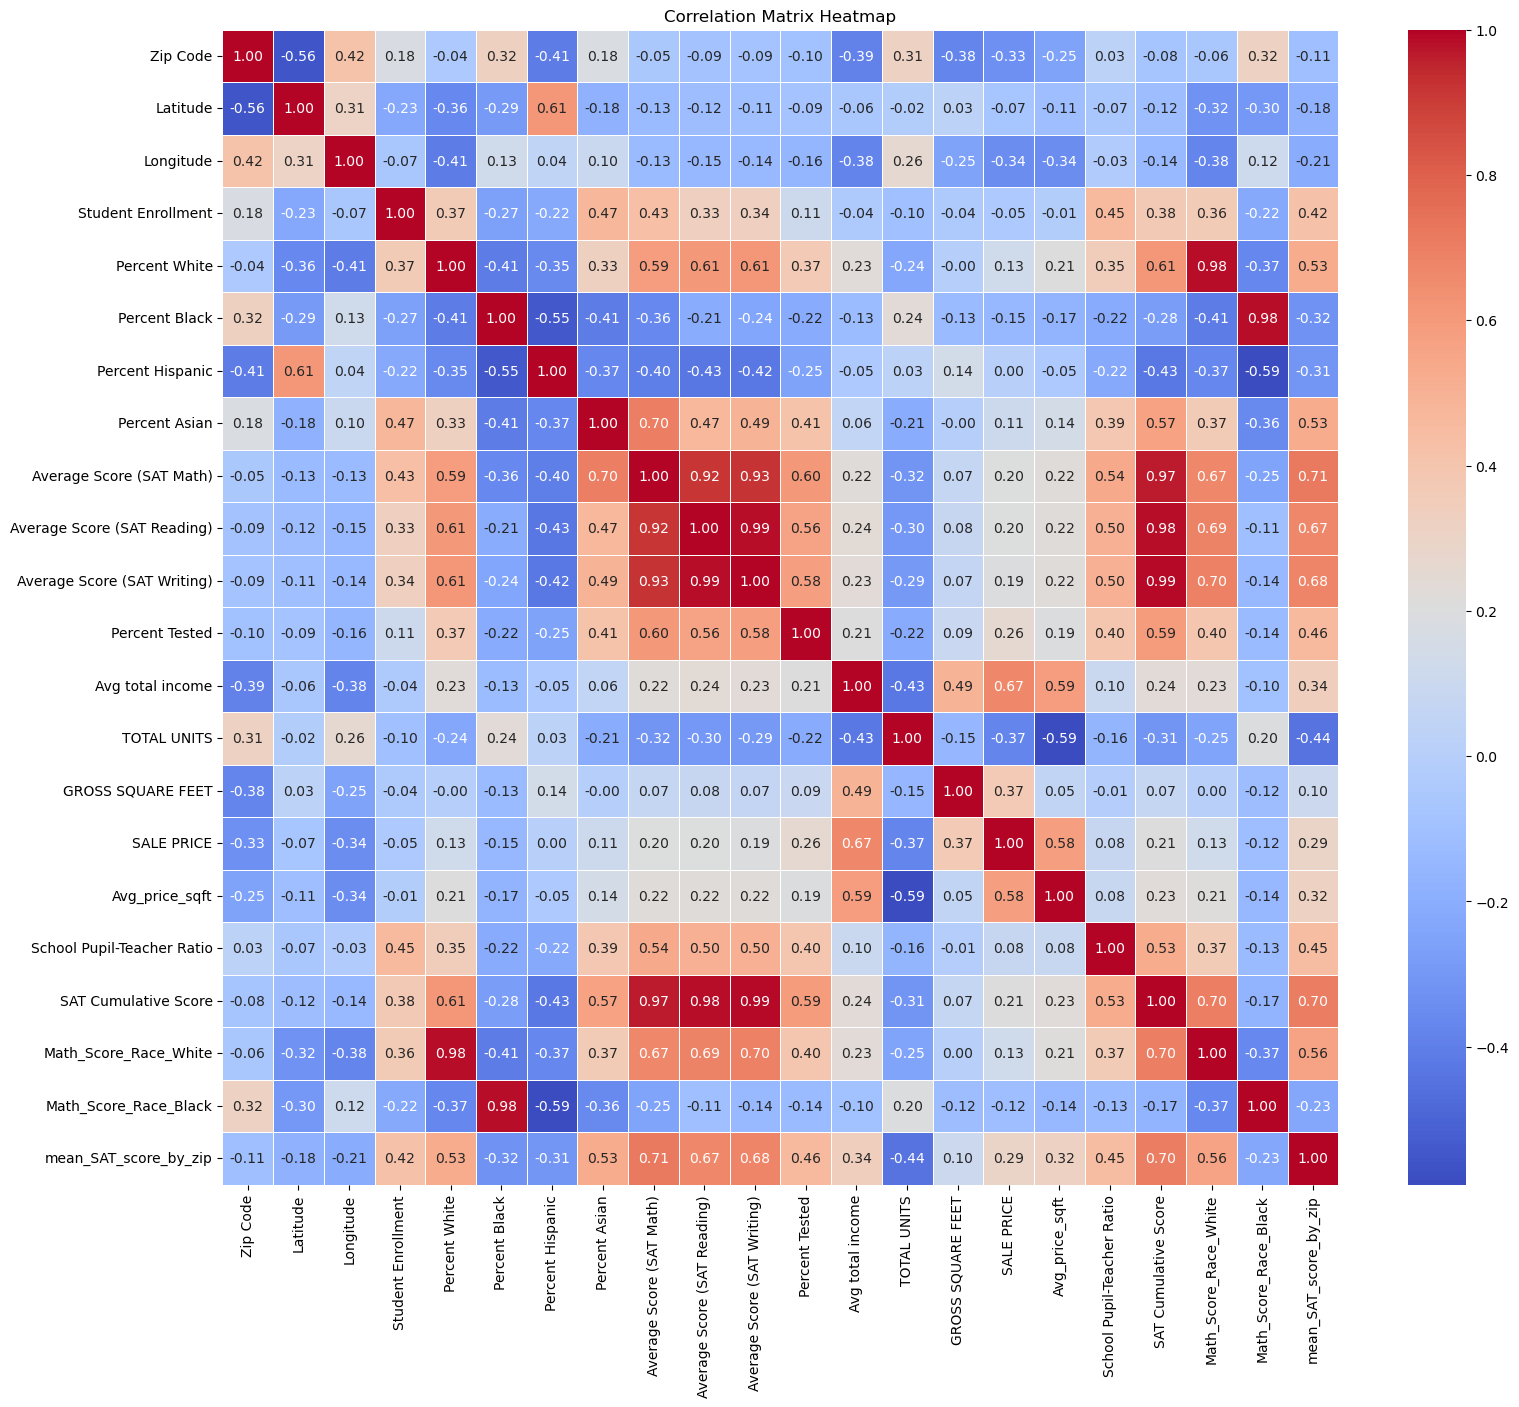

In [77]:
correlation_matrix = new_data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [83]:
#My theory so far: Black/Hispanic classrooms have lower pupil teacher ratio, but are generally lacking in some other quality metric: teacher quality, overall resources. Because Average total income only had a weak correlation, the idea that the wealthier are accessing tutors is not as likely.

In [78]:
# Filter schools where Black enrollment is greater than 50%
black_greater_than_50 = new_data[new_data['Percent Black'] > .60]
mean_ratio_black_greater_than_50 = black_greater_than_50['School Pupil-Teacher Ratio'].mean()

# Filter schools where Hispanic enrollment is greater than 50%
hispanic_greater_than_50 = new_data[new_data['Percent Hispanic'] > .60]
mean_ratio_hispanic_greater_than_50 = hispanic_greater_than_50['School Pupil-Teacher Ratio'].mean()

# Filter schools where White enrollment is greater than 50%
white_greater_than_50 = new_data[new_data['Percent White'] > .60]
mean_ratio_white_greater_than_50 = white_greater_than_50['School Pupil-Teacher Ratio'].mean()

# Filter schools where Asian enrollment is greater than 50%
asian_greater_than_50 = new_data[new_data['Percent Asian'] > .60]
mean_ratio_asian_greater_than_50 = asian_greater_than_50['School Pupil-Teacher Ratio'].mean()

print("Mean School Pupil-Teacher Ratio for schools with Black enrollment > 60%:", mean_ratio_black_greater_than_50)
print("Mean School Pupil-Teacher Ratio for schools with Hispanic enrollment > 60%:", mean_ratio_hispanic_greater_than_50)
print("Mean School Pupil-Teacher Ratio for schools with White enrollment > 60%:", mean_ratio_white_greater_than_50)
print("Mean School Pupil-Teacher Ratio for schools with Asian enrollment > 60%:", mean_ratio_asian_greater_than_50)

Mean School Pupil-Teacher Ratio for schools with Black enrollment > 60%: 14.800000000000002
Mean School Pupil-Teacher Ratio for schools with Hispanic enrollment > 60%: 14.730000000000002
Mean School Pupil-Teacher Ratio for schools with White enrollment > 60%: 16.533333333333335
Mean School Pupil-Teacher Ratio for schools with Asian enrollment > 60%: 17.86


<AxesSubplot:xlabel='SAT Cumulative Score', ylabel='School Pupil-Teacher Ratio'>

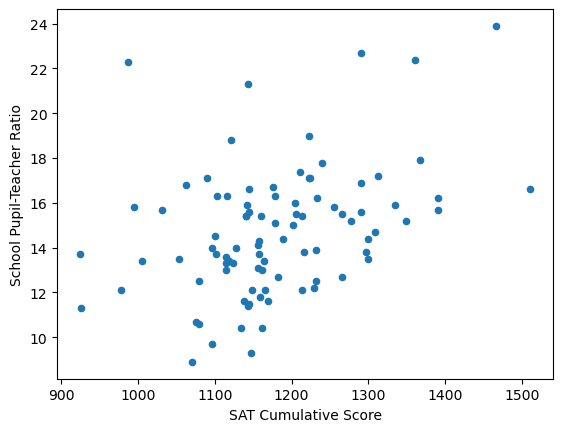

In [79]:
hispanic_greater_than_50.plot(x = "SAT Cumulative Score" ,y='School Pupil-Teacher Ratio', kind='scatter')

<AxesSubplot:xlabel='SAT Cumulative Score', ylabel='School Pupil-Teacher Ratio'>

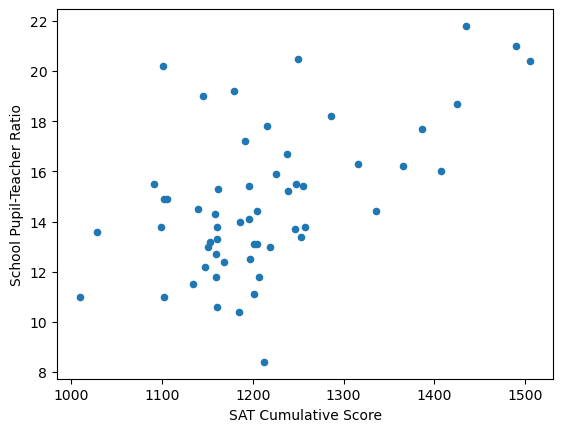

In [80]:
black_greater_than_50.plot(x = "SAT Cumulative Score" ,y='School Pupil-Teacher Ratio', kind='scatter')

<AxesSubplot:xlabel='Avg total income', ylabel='School Pupil-Teacher Ratio'>

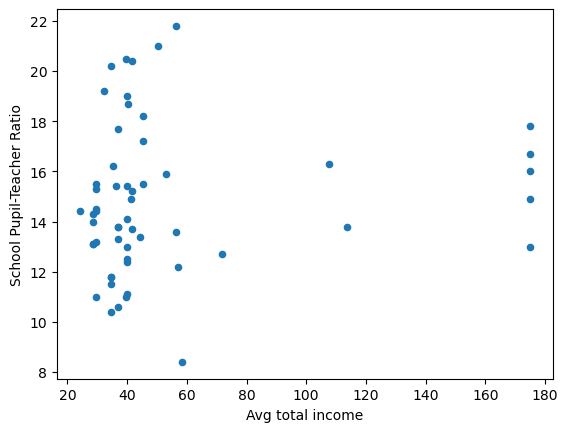

In [81]:
black_greater_than_50.plot(x = "Avg total income" ,y='School Pupil-Teacher Ratio', kind='scatter')

<AxesSubplot:xlabel='SAT Cumulative Score', ylabel='School Pupil-Teacher Ratio'>

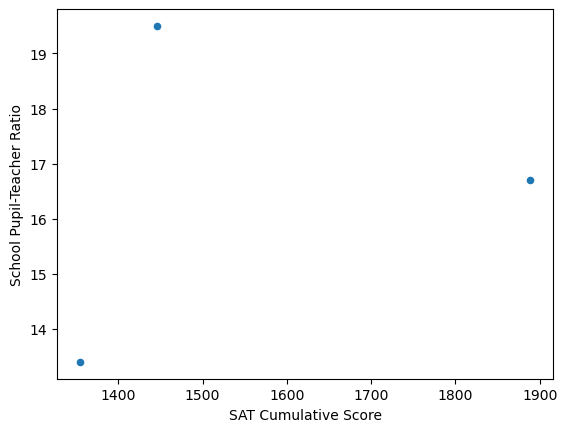

In [82]:
white_greater_than_50.plot(x = "SAT Cumulative Score" ,y='School Pupil-Teacher Ratio', kind='scatter')

In [83]:
white_greater_than_50

School ID                                  School Name        Borough  \
36    02M416                ELEANOR ROOSEVELT HIGH SCHOOL      Manhattan   
73    31R455                      TOTTENVILLE HIGH SCHOOL  Staten Island   
75    31R064  GAYNOR MCCOWN EXPEDITIONARY LEARNING SCHOOL  Staten Island   

   Building Code        Street Address           City State  Zip Code  \
36          M855  411 East 76th Street      Manhattan    NY     10021   
73          R455      100 Luten Avenue  Staten Island    NY     10312   
75          R043       100 Essex Drive  Staten Island    NY     10314   

    Latitude  Longitude  ... Avg total income TOTAL UNITS GROSS SQUARE FEET  \
36  40.77012  -73.95338  ...       497.786169         0.0            6370.0   
73  40.52823  -74.19215  ...        76.204782         1.0            1600.0   
75  40.58202  -74.15785  ...        66.106764         1.0            1680.0   

    SALE PRICE  Avg_price_sqft  School Pupil-Teacher Ratio  \
36   1066250.0     1945.765789                        16.7   
73    489000.0      302.357887                        19.5   
75    485706.0      322.611093                        13.4   

    SAT Cumulative Score  Math_Score_Race_White  Math_Score_Race_Black  \
36                1889.0                393.574                 28.204   
73                1446.0                394.706                  8.892   
75                1354.0                272.272                 60.996   

    mean_SAT_score_by_zip  
36                 1889.0  
73                 1446.0  
75                 1412.0  

[3 rows x 32 columns]

In [84]:
# Filter schools where Black enrollment is between 25% and 50%
black_between_25_and_50 = new_data[new_data['Percent Black'].between(.25, .50)]
mean_ratio_black_between_25_and_50 = black_between_25_and_50['School Pupil-Teacher Ratio'].mean()

# Filter schools where Hispanic enrollment is between 25% and 50%
hispanic_between_25_and_50 = new_data[new_data['Percent Hispanic'].between(.25, .50)]
mean_ratio_hispanic_between_25_and_50 = hispanic_between_25_and_50['School Pupil-Teacher Ratio'].mean()

# Filter schools where White enrollment is between 25% and 50%
white_between_25_and_50 = new_data[new_data['Percent White'].between(.25, .50)]
mean_ratio_white_between_25_and_50 = white_between_25_and_50['School Pupil-Teacher Ratio'].mean()

# Filter schools where Asian enrollment is between 25% and 50%
asian_between_25_and_50 = new_data[new_data['Percent Asian'].between(.25, .50)]
mean_ratio_asian_between_25_and_50 = asian_between_25_and_50['School Pupil-Teacher Ratio'].mean()

print("Mean School Pupil-Teacher Ratio for schools with Black enrollment between 25% and 50%:", mean_ratio_black_between_25_and_50)
print("Mean School Pupil-Teacher Ratio for schools with Hispanic enrollment between 25% and 50%:", mean_ratio_hispanic_between_25_and_50)
print("Mean School Pupil-Teacher Ratio for schools with White enrollment between 25% and 50%:", mean_ratio_white_between_25_and_50)
print("Mean School Pupil-Teacher Ratio for schools with Asian enrollment between 25% and 50%:", mean_ratio_asian_between_25_and_50)

Mean School Pupil-Teacher Ratio for schools with Black enrollment between 25% and 50%: 14.876699029126215
Mean School Pupil-Teacher Ratio for schools with Hispanic enrollment between 25% and 50%: 15.525675675675673
Mean School Pupil-Teacher Ratio for schools with White enrollment between 25% and 50%: 17.731818181818184
Mean School Pupil-Teacher Ratio for schools with Asian enrollment between 25% and 50%: 17.659999999999997


In [85]:
# Calculate the overall percentage ethnic makeup of all schools
overall_ethnic_makeup = new_data[['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']].mean()

print("Overall Ethnic Makeup (All Schools):")
print(overall_ethnic_makeup)

# Filter schools with School Student Pupil Ratio less than 15
schools_less_than_15_ratio = new_data[new_data['School Pupil-Teacher Ratio'] < 15]

# Calculate the percentage ethnic makeup for schools with School Student Pupil Ratio less than 15
ethnic_makeup_less_than_15_ratio = schools_less_than_15_ratio[['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']].mean()

print("\nEthnic Makeup for Schools with School Pupil-Teacher Ratio < 15:")
print(ethnic_makeup_less_than_15_ratio)

Overall Ethnic Makeup (All Schools):
Percent Black       0.341799
Percent Hispanic    0.445523
Percent White       0.089393
Percent Asian       0.106279
dtype: float64

Ethnic Makeup for Schools with School Pupil-Teacher Ratio < 15:
Percent Black       0.404647
Percent Hispanic    0.480765
Percent White       0.045154
Percent Asian       0.054000
dtype: float64


In [86]:
# Calculate the overall percentage ethnic makeup of all schools
overall_ethnic_makeup = new_data[['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']].mean()

print("Overall Ethnic Makeup (All Schools):")
print(overall_ethnic_makeup)

# Filter schools with School Student Pupil Ratio less than 15
schools_less_than_12_ratio = new_data[new_data['School Pupil-Teacher Ratio'] < 12]

# Calculate the percentage ethnic makeup for schools with School Student Pupil Ratio less than 15
ethnic_makeup_less_than_12_ratio = schools_less_than_12_ratio[['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']].mean()

print("\nEthnic Makeup for Schools with School Pupil-Teacher Ratio < 12:")
print(ethnic_makeup_less_than_12_ratio)

Overall Ethnic Makeup (All Schools):
Percent Black       0.341799
Percent Hispanic    0.445523
Percent White       0.089393
Percent Asian       0.106279
dtype: float64

Ethnic Makeup for Schools with School Pupil-Teacher Ratio < 12:
Percent Black       0.420111
Percent Hispanic    0.492972
Percent White       0.029222
Percent Asian       0.044861
dtype: float64


In [87]:
# Filter schools with Student School Pupil Ratio between 20 and 30
schools_between_20_and_30_ratio = new_data[new_data['School Pupil-Teacher Ratio'].between(20, 30)]

# Calculate the percentage ethnic makeup for schools with Student School Pupil Ratio between 20 and 30
ethnic_makeup_between_20_and_30_ratio = schools_between_20_and_30_ratio[['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']].mean()

print("Ethnic Makeup for Schools with Student Pupil-Teacher Ratio between 20 and 30:")
print(ethnic_makeup_between_20_and_30_ratio)

Ethnic Makeup for Schools with Student Pupil-Teacher Ratio between 20 and 30:
Percent Black       0.281083
Percent Hispanic    0.296458
Percent White       0.181958
Percent Asian       0.221292
dtype: float64


In [88]:
mean_sat_scores_by_borough = new_data.groupby('Borough').agg({
    'Average Score (SAT Math)': 'mean',
    'Average Score (SAT Reading)': 'mean',
    'Average Score (SAT Writing)': 'mean',
    'SAT Cumulative Score': 'mean'
})

print(mean_sat_scores_by_borough)

               Average Score (SAT Math)  Average Score (SAT Reading)  \
Borough                                                                
Bronx                        401.792208                   399.272727   
Brooklyn                     414.802198                   408.076923   
Manhattan                    456.941176                   445.779412   
Queens                       466.113208                   443.509434   
Staten Island                486.555556                   479.111111   

               Average Score (SAT Writing)  SAT Cumulative Score  
Borough                                                           
Bronx                           392.194805           1193.259740  
Brooklyn                        400.725275           1223.604396  
Manhattan                       440.382353           1343.102941  
Queens                          440.415094           1350.037736  
Staten Island                   474.777778           1440.444444  


In [89]:
ethnic_breakdown_by_borough = new_data.groupby('Borough').agg({
    'Percent Black': 'mean',
    'Percent Hispanic': 'mean',
    'Percent White': 'mean',
    'Percent Asian': 'mean'
})

print("Ethnic Breakdown Across All Five Boroughs:")
print(ethnic_breakdown_by_borough)

Ethnic Breakdown Across All Five Boroughs:
               Percent Black  Percent Hispanic  Percent White  Percent Asian
Borough                                                                     
Bronx               0.285026          0.628623       0.031234       0.041935
Brooklyn            0.525945          0.302044       0.078505       0.079165
Manhattan           0.250676          0.515074       0.104162       0.107926
Queens              0.255604          0.368528       0.111849       0.243283
Staten Island       0.161667          0.257667       0.453222       0.111667


In [90]:
# Calculate the quantile thresholds for top and bottom 20% of Black scores
black_top_quantile = new_data['Percent Black'].quantile(0.8)
black_bottom_quantile = new_data['Percent Black'].quantile(0.2)

# Filter the data for top 20% and bottom 20% scoring Black students
top_black_students = new_data[new_data['Percent Black'] >= black_top_quantile]
bottom_black_students = new_data[new_data['Percent Black'] <= black_bottom_quantile]

# Calculate the mean School Pupil-Teacher Ratio for each group
mean_ratio_top_black = top_black_students['School Pupil-Teacher Ratio'].mean()
mean_ratio_bottom_black = bottom_black_students['School Pupil-Teacher Ratio'].mean()

print("Mean School Pupil-Teacher Ratio for Top 20% Scoring Black Students:", mean_ratio_top_black)
print("Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Black Students:", mean_ratio_bottom_black)

Mean School Pupil-Teacher Ratio for Top 20% Scoring Black Students: 14.806666666666672
Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Black Students: 16.95833333333333


In [91]:
# Calculate the quantile thresholds for top and bottom 20% of Hispanic scores
hispanic_top_quantile = new_data['Percent Hispanic'].quantile(0.8)
hispanic_bottom_quantile = new_data['Percent Hispanic'].quantile(0.2)

# Filter the data for top 20% and bottom 20% scoring Hispanic students
top_hispanic_students = new_data[new_data['Percent Hispanic'] >= hispanic_top_quantile]
bottom_hispanic_students = new_data[new_data['Percent Hispanic'] <= hispanic_bottom_quantile]

# Calculate the mean School Pupil-Teacher Ratio for each group
mean_ratio_top_hispanic = top_hispanic_students['School Pupil-Teacher Ratio'].mean()
mean_ratio_bottom_hispanic = bottom_hispanic_students['School Pupil-Teacher Ratio'].mean()

print("Mean School Pupil-Teacher Ratio for Top 20% Scoring Hispanic Students:", mean_ratio_top_hispanic)
print("Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Hispanic Students:", mean_ratio_bottom_hispanic)

Mean School Pupil-Teacher Ratio for Top 20% Scoring Hispanic Students: 14.389999999999997
Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Hispanic Students: 16.149180327868855


In [92]:
# Calculate the quantile thresholds for top and bottom 20% of Hispanic scores
hispanic_top_quantile = new_data['Percent Hispanic'].quantile(0.8)
hispanic_bottom_quantile = new_data['Percent Hispanic'].quantile(0.2)

# Filter the data for top 20% and bottom 20% scoring Hispanic students
top_hispanic_students = new_data[new_data['Percent Hispanic'] >= hispanic_top_quantile]
bottom_hispanic_students = new_data[new_data['Percent Hispanic'] <= hispanic_bottom_quantile]

# Calculate the mean School Pupil-Teacher Ratio for each group
mean_ratio_top_hispanic = top_hispanic_students['School Pupil-Teacher Ratio'].mean()
mean_ratio_bottom_hispanic = bottom_hispanic_students['School Pupil-Teacher Ratio'].mean()

print("Mean School Pupil-Teacher Ratio for Top 20% Scoring Hispanic Students:", mean_ratio_top_hispanic)
print("Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Hispanic Students:", mean_ratio_bottom_hispanic)

Mean School Pupil-Teacher Ratio for Top 20% Scoring Hispanic Students: 14.389999999999997
Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Hispanic Students: 16.149180327868855


In [93]:
# Calculate the quantile thresholds for top and bottom 20% of White scores
white_top_quantile = new_data['Percent White'].quantile(0.8)
white_bottom_quantile = new_data['Percent White'].quantile(0.2)

# Filter the data for top 20% and bottom 20% scoring White students
top_white_students = new_data[new_data['Percent White'] >= white_top_quantile]
bottom_white_students = new_data[new_data['Percent White'] <= white_bottom_quantile]

# Calculate the mean School Pupil-Teacher Ratio for each group
mean_ratio_top_white = top_white_students['School Pupil-Teacher Ratio'].mean()
mean_ratio_bottom_white = bottom_white_students['School Pupil-Teacher Ratio'].mean()

print("Mean School Pupil-Teacher Ratio for Top 20% Scoring White Students:", mean_ratio_top_white)
print("Mean School Pupil-Teacher Ratio for Bottom 20% Scoring White Students:", mean_ratio_bottom_white)

Mean School Pupil-Teacher Ratio for Top 20% Scoring White Students: 17.666666666666668
Mean School Pupil-Teacher Ratio for Bottom 20% Scoring White Students: 14.518309859154925


In [94]:
# Calculate the quantile thresholds for top and bottom 20% of Asian scores
asian_top_quantile = new_data['Percent Asian'].quantile(0.8)
asian_bottom_quantile = new_data['Percent Asian'].quantile(0.2)

# Filter the data for top 20% and bottom 20% scoring Asian students
top_asian_students = new_data[new_data['Percent Asian'] >= asian_top_quantile]
bottom_asian_students = new_data[new_data['Percent Asian'] <= asian_bottom_quantile]

# Calculate the mean School Pupil-Teacher Ratio for each group
mean_ratio_top_asian = top_asian_students['School Pupil-Teacher Ratio'].mean()
mean_ratio_bottom_asian = bottom_asian_students['School Pupil-Teacher Ratio'].mean()

print("Mean School Pupil-Teacher Ratio for Top 20% Scoring Asian Students:", mean_ratio_top_asian)
print("Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Asian Students:", mean_ratio_bottom_asian)

Mean School Pupil-Teacher Ratio for Top 20% Scoring Asian Students: 17.681666666666672
Mean School Pupil-Teacher Ratio for Bottom 20% Scoring Asian Students: 13.760317460317458


In [95]:
# Filter the data for Asian students
asian_students = new_data[new_data['Percent Asian'] > 0]  # Exclude rows with 0% Asian students

# Create a list of boroughs
boroughs = asian_students['Borough'].unique()

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Borough', 'Mean Ratio Top 20%', 'Mean Ratio Bottom 20%'])

# Iterate through each borough
for borough in boroughs:
    borough_data = asian_students[asian_students['Borough'] == borough]
    top_students = borough_data[borough_data['Percent Asian'] >= asian_top_quantile]
    bottom_students = borough_data[borough_data['Percent Asian'] <= asian_bottom_quantile]
    
    mean_ratio_top = top_students['School Pupil-Teacher Ratio'].mean()
    mean_ratio_bottom = bottom_students['School Pupil-Teacher Ratio'].mean()
    
    results = results.append({'Borough': borough, 'Mean Ratio Top 20%': mean_ratio_top, 'Mean Ratio Bottom 20%': mean_ratio_bottom}, ignore_index=True)

# Display the results
print(results)


         Borough  Mean Ratio Top 20%  Mean Ratio Bottom 20%
0      Manhattan           17.241667              15.760000
1  Staten Island           21.100000                    NaN
2          Bronx           18.100000              14.126087
3         Queens           17.554839              12.100000
4       Brooklyn           18.035714              13.058333


/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/1886355798.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Borough': borough, 'Mean Ratio Top 20%': mean_ratio_top, 'Mean Ratio Bottom 20%': mean_ratio_bottom}, ignore_index=True)
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/1886355798.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Borough': borough, 'Mean Ratio Top 20%': mean_ratio_top, 'Mean Ratio Bottom 20%': mean_ratio_bottom}, ignore_index=True)
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_57256/1886355798.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Borough': borough, 'Mea

In [96]:
staten_island_data = new_data[new_data['Borough'] == 'Staten Island']
iqr_ratio = np.percentile(staten_island_data['School Pupil-Teacher Ratio'], 75) - np.percentile(staten_island_data['School Pupil-Teacher Ratio'], 25)
print("Interquartile Range for School Pupil-Teacher Ratio in Staten Island:", iqr_ratio)

Interquartile Range for School Pupil-Teacher Ratio in Staten Island: 3.1999999999999993


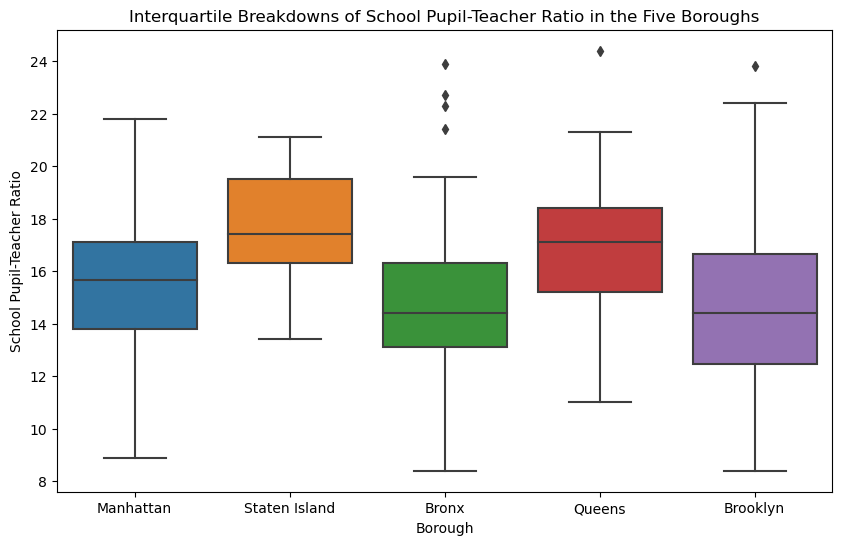

In [97]:

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data, x='Borough', y='School Pupil-Teacher Ratio')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('School Pupil-Teacher Ratio')
plt.title('Interquartile Breakdowns of School Pupil-Teacher Ratio in the Five Boroughs')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

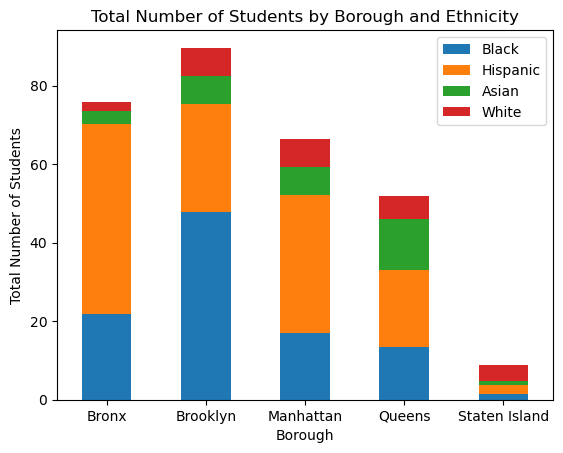

In [98]:
# Group data by borough and ethnicity and sum up the student enrollment
ethnicity_columns = ['Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White']
ethnicity_labels = ['Black', 'Hispanic', 'Asian', 'White']

ethnicity_data = new_data.groupby('Borough')[ethnicity_columns].sum()

# Plotting
plt.figure(figsize=(10, 6))
ethnicity_data.plot(kind='bar', stacked=True)
plt.title('Total Number of Students by Borough and Ethnicity')
plt.xlabel('Borough')
plt.ylabel('Total Number of Students')
plt.xticks(rotation=0)
plt.legend(ethnicity_labels)
plt.show()


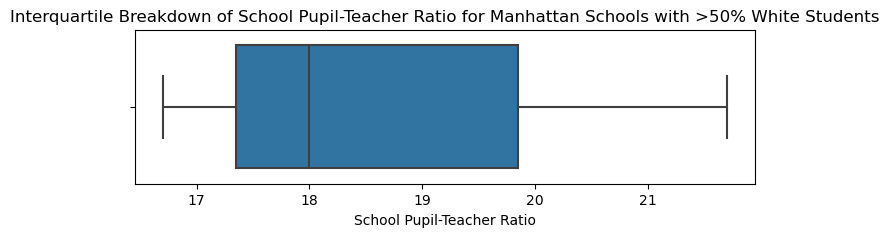

In [99]:
manhattan_white_data = new_data[(new_data['Borough'] == 'Manhattan') & (new_data['Percent White'] > .50)]

# Create a boxplot for School Pupil-Teacher Ratio
plt.figure(figsize=(8, 2))
sns.boxplot(x=manhattan_white_data['School Pupil-Teacher Ratio'])
plt.title("Interquartile Breakdown of School Pupil-Teacher Ratio for Manhattan Schools with >50% White Students")
plt.xlabel("School Pupil-Teacher Ratio")
plt.show()

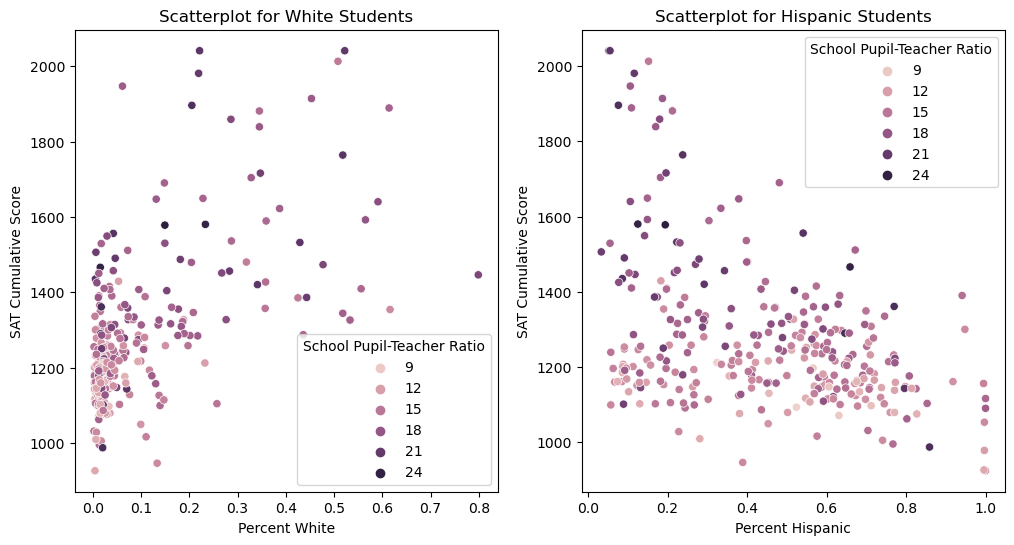

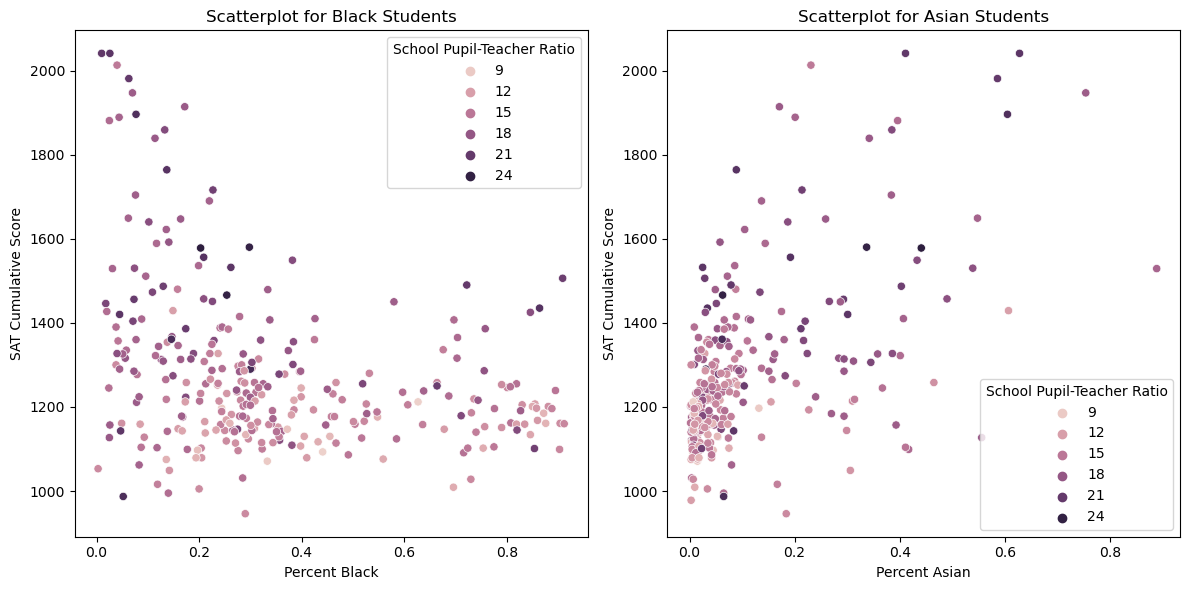

In [100]:
# Filter data for each ethnicity
white_data = new_data[new_data['Percent White'] > 0]
hispanic_data = new_data[new_data['Percent Hispanic'] > 0]
black_data = new_data[new_data['Percent Black'] > 0]
asian_data = new_data[new_data['Percent Asian'] > 0]

# Create scatterplot for White students
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=white_data, x='Percent White', y='SAT Cumulative Score', hue='School Pupil-Teacher Ratio')
plt.title("Scatterplot for White Students")
plt.xlabel("Percent White")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Hispanic students
plt.subplot(1, 2, 2)
sns.scatterplot(data=hispanic_data, x='Percent Hispanic', y='SAT Cumulative Score', hue='School Pupil-Teacher Ratio')
plt.title("Scatterplot for Hispanic Students")
plt.xlabel("Percent Hispanic")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Black students
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=black_data, x='Percent Black', y='SAT Cumulative Score', hue='School Pupil-Teacher Ratio')
plt.title("Scatterplot for Black Students")
plt.xlabel("Percent Black")
plt.ylabel("SAT Cumulative Score")

# Create scatterplot for Asian students
plt.subplot(1, 2, 2)
sns.scatterplot(data=asian_data, x='Percent Asian', y='SAT Cumulative Score', hue='School Pupil-Teacher Ratio')
plt.title("Scatterplot for Asian Students")
plt.xlabel("Percent Asian")
plt.ylabel("SAT Cumulative Score")

plt.tight_layout()
plt.show()

In [101]:
import plotly.express as px

# Create scatterplot for White students using Plotly
fig = px.scatter(white_data, x='Percent White', y='SAT Cumulative Score', color='School Pupil-Teacher Ratio', hover_name='School Name')
fig.update_layout(title="Scatterplot for White Students",
                  xaxis_title="Percent White",
                  yaxis_title="SAT Cumulative Score")

# Show the interactive plot
fig.show()



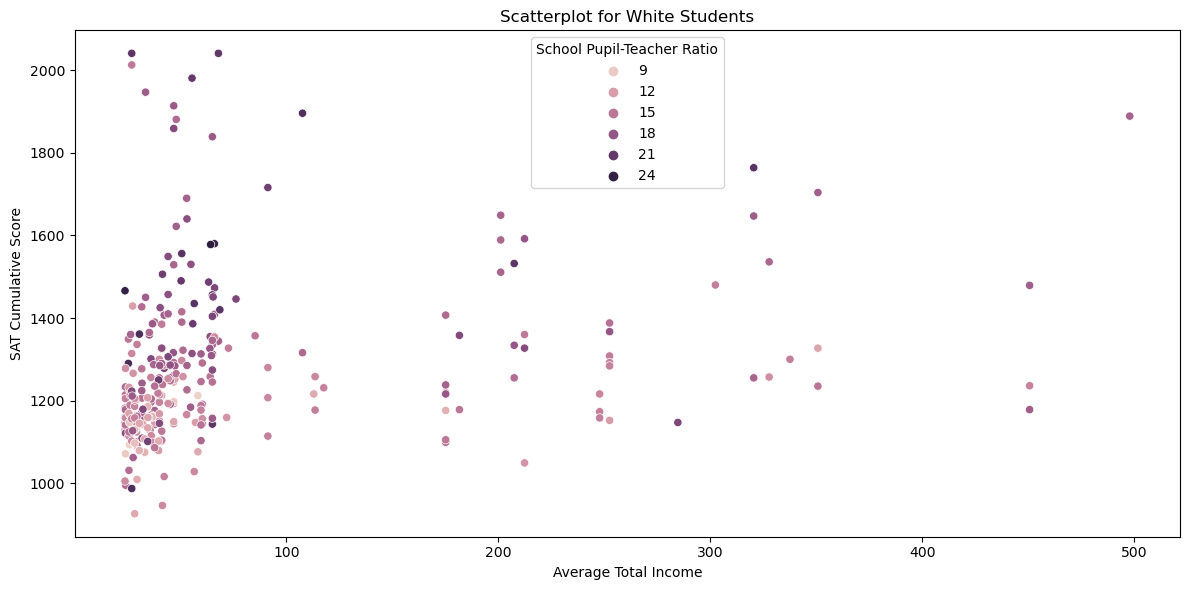

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatterplot for White students
plt.figure(figsize=(12, 6))
sns.scatterplot(data=white_data, x='Avg total income', y='SAT Cumulative Score', hue='School Pupil-Teacher Ratio')
plt.title("Scatterplot for White Students")
plt.xlabel("Average Total Income")
plt.ylabel("SAT Cumulative Score")
plt.legend(title='School Pupil-Teacher Ratio')

# Repeat for other ethnicities (Black, Hispanic, Asian)
# ...

plt.tight_layout()
plt.show()

In [103]:
# Top 10 schools with highest Percent Tested
top_10_percent_tested = new_data.nlargest(10, 'Percent Tested')[['School Name', 'Percent Tested']]
print("Top 10 Schools with Highest Percent Tested:")
print(top_10_percent_tested)

# Bottom 10 schools with lowest Percent Tested
bottom_10_percent_tested = new_data.nsmallest(10, 'Percent Tested')[['School Name', 'Percent Tested']]
print("\nBottom 10 Schools with Lowest Percent Tested:")
print(bottom_10_percent_tested)

Top 10 Schools with Highest Percent Tested:
                                           School Name  Percent Tested
46                     YOUNG WOMEN'S LEADERSHIP SCHOOL           1.000
71                 STATEN ISLAND TECHNICAL HIGH SCHOOL           0.997
297                                  SCHOLARS' ACADEMY           0.992
22                           MANHATTAN VILLAGE ACADEMY           0.988
167          BACCALAUREATE SCHOOL FOR GLOBAL EDUCATION           0.985
225                           BROOKLYN COLLEGE ACADEMY           0.981
44                       CENTRAL PARK EAST HIGH SCHOOL           0.979
289  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...           0.979
39              MANHATTAN / HUNTER SCIENCE HIGH SCHOOL           0.972
267                        TOWNSEND HARRIS HIGH SCHOOL           0.971

Bottom 10 Schools with Lowest Percent Tested:
                                           School Name  Percent Tested
171  CITY POLYTECHNIC HIGH SCHOOL OF ENGINEERING, A...   

In [104]:
school_row = new_data[new_data['School Name'] == "YOUNG WOMEN'S LEADERSHIP SCHOOL"]
school_row.T


46
School ID                                             04M610
School Name                  YOUNG WOMEN'S LEADERSHIP SCHOOL
Borough                                            Manhattan
Building Code                                           M895
Street Address                         105 East 106th Street
City                                               Manhattan
State                                                     NY
Zip Code                                               10029
Latitude                                            40.79271
Longitude                                           -73.9473
Phone Number                                    212-289-7593
Start Time                                           8:45 AM
End Time                                             3:15 PM
Student Enrollment                                     480.0
Percent White                                          0.034
Percent Black                                          0.279
Percent Hispanic                                       0.574
Percent Asian                                          0.089
Average Score (SAT Math)                               478.0
Average Score (SAT Reading)                            465.0
Average Score (SAT Writing)                            472.0
Percent Tested                                           1.0
Avg total income                                   50.632099
TOTAL UNITS                                              1.0
GROSS SQUARE FEET                                     9037.5
SALE PRICE                                          960000.0
Avg_price_sqft                                    504.568577
School Pupil-Teacher Ratio                              15.6
SAT Cumulative Score                                  1415.0
Math_Score_Race_White                                 16.252
Math_Score_Race_Black                                133.362
mean_SAT_score_by_zip                                 1414.5

In [105]:
school_row = new_data[new_data['School Name'] == "SCHOLARS' ACADEMY"]
school_row.T

297
School ID                                    27Q323
School Name                       SCHOLARS' ACADEMY
Borough                                      Queens
Building Code                                  Q180
Street Address               320 Beach 104th Street
City                                  Rockaway Park
State                                            NY
Zip Code                                      11694
Latitude                                   40.58413
Longitude                                 -73.82568
Phone Number                           718-474-6918
Start Time                                  8:45 AM
End Time                                    3:00 PM
Student Enrollment                           1302.0
Percent White                                 0.347
Percent Black                                 0.227
Percent Hispanic                              0.196
Percent Asian                                 0.214
Average Score (SAT Math)                      588.0
Average Score (SAT Reading)                   560.0
Average Score (SAT Writing)                   568.0
Percent Tested                                0.992
Avg total income                           91.24427
TOTAL UNITS                                     1.0
GROSS SQUARE FEET                            2115.0
SALE PRICE                                 631250.0
Avg_price_sqft                           376.860294
School Pupil-Teacher Ratio                     20.2
SAT Cumulative Score                         1716.0
Math_Score_Race_White                       204.036
Math_Score_Race_Black                       133.476
mean_SAT_score_by_zip                       1329.25

In [106]:
new_data.T



0    \
School ID                                                               01M539   
School Name                  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
Borough                                                              Manhattan   
Building Code                                                             M022   
Street Address                                             111 Columbia Street   
City                                                                 Manhattan   
State                                                                       NY   
Zip Code                                                                 10002   
Latitude                                                              40.71873   
Longitude                                                            -73.97943   
Phone Number                                                      212-677-5190   
Start Time                                                             8:15 AM   
End Time                                                               4:00 PM   
Student Enrollment                                                      1735.0   
Percent White                                                            0.286   
Percent Black                                                            0.133   
Percent Hispanic                                                          0.18   
Percent Asian                                                            0.385   
Average Score (SAT Math)                                                 657.0   
Average Score (SAT Reading)                                              601.0   
Average Score (SAT Writing)                                              601.0   
Percent Tested                                                            0.91   
Avg total income                                                     46.846786   
TOTAL UNITS                                                                0.0   
GROSS SQUARE FEET                                                      10230.0   
SALE PRICE                                                            845000.0   
Avg_price_sqft                                                     1016.835017   
School Pupil-Teacher Ratio                                                19.0   
SAT Cumulative Score                                                    1859.0   
Math_Score_Race_White                                                  187.902   
Math_Score_Race_Black                                                   87.381   
mean_SAT_score_by_zip                                                   1378.3   

                                              1    \
School ID                                  02M294   
School Name                  ESSEX STREET ACADEMY   
Borough                                 Manhattan   
Building Code                                M445   
Street Address                   350 Grand Street   
City                                    Manhattan   
State                                          NY   
Zip Code                                    10002   
Latitude                                 40.71687   
Longitude                               -73.98953   
Phone Number                         212-475-4773   
Start Time                                8:00 AM   
End Time                                  2:45 PM   
Student Enrollment                          358.0   
Percent White                               0.117   
Percent Black                               0.385   
Percent Hispanic                            0.413   
Percent Asian                               0.059   
Average Score (SAT Math)                    395.0   
Average Score (SAT Reading)                 411.0   
Average Score (SAT Writing)                 387.0   
Percent Tested                              0.789   
Avg total income                        46.846786   
TOTAL UNITS                                   0.0   
GROSS SQUARE FEET                         1

In [107]:
#This is the beginning of the preprocessing step. In this cell, I'm engineering new features.

# SAT Scores per Student
new_data['SAT Scores per Student'] = new_data['SAT Cumulative Score'] / new_data['Student Enrollment']

# % of High Achievers
high_achiever_threshold = 0.9  # Define the threshold (e.g., top 10%)
new_data['% High Achievers'] = (new_data['SAT Cumulative Score'] >= new_data['SAT Cumulative Score'].quantile(high_achiever_threshold)).astype(int)

# Student Enrollment and School-Pupil Teacher Ratio Interaction
new_data['Enrollment-Ratio Interaction'] = new_data['Student Enrollment'] * new_data['School Pupil-Teacher Ratio']

# Percent Tested and Student Enrollment Interaction
new_data['Tested-Enrollment Interaction'] = new_data['Percent Tested'] * new_data['Student Enrollment']

# Student Diversity Index using Herfindahl-Hirschman Index
ethnicities = ['Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Asian']
new_data['Diversity Index'] = (new_data[ethnicities] ** 2).sum(axis=1)

# Assuming each ethnicity with greater than 15% representation gives a diversity score
ethnicity_threshold = 0.15
new_data['Diverse School'] = (new_data[ethnicities] > ethnicity_threshold).all(axis=1).astype(int)

In [108]:
new_data.T

0    \
School ID                                                                 01M539   
School Name                    NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
Borough                                                                Manhattan   
Building Code                                                               M022   
Street Address                                               111 Columbia Street   
City                                                                   Manhattan   
State                                                                         NY   
Zip Code                                                                   10002   
Latitude                                                                40.71873   
Longitude                                                              -73.97943   
Phone Number                                                        212-677-5190   
Start Time                                                               8:15 AM   
End Time                                                                 4:00 PM   
Student Enrollment                                                        1735.0   
Percent White                                                              0.286   
Percent Black                                                              0.133   
Percent Hispanic                                                            0.18   
Percent Asian                                                              0.385   
Average Score (SAT Math)                                                   657.0   
Average Score (SAT Reading)                                                601.0   
Average Score (SAT Writing)                                                601.0   
Percent Tested                                                              0.91   
Avg total income                                                       46.846786   
TOTAL UNITS                                                                  0.0   
GROSS SQUARE FEET                                                        10230.0   
SALE PRICE                                                              845000.0   
Avg_price_sqft                                                       1016.835017   
School Pupil-Teacher Ratio                                                  19.0   
SAT Cumulative Score                                                      1859.0   
Math_Score_Race_White                                                    187.902   
Math_Score_Race_Black                                                     87.381   
mean_SAT_score_by_zip                                                     1378.3   
SAT Scores per Student                                                   1.07147   
% High Achievers                                                               1   
Enrollment-Ratio Interaction                                             32965.0   
Tested-Enrollment Interaction                                            1578.85   
Diversity Index                                                          0.28011   
Diverse School                                                                 0   

                                                1    \
School ID                                    02M294   
School Name                    ESSEX STREET ACADEMY   
Borough                                   Manhattan   
Building Code                                  M445   
Street Address                     350 Grand Street   
City                                      Manhattan   
State                                            NY   
Zip Code                                      10002   
Latitude                                   40.71687   
Longitude                                 -73.98953   
Phone Number                           212-475-4773   
Start Time                                  8:00 AM   
End Time                                    2:45 PM   
Student Enrollment            

In [109]:
preprocessed_data = new_data

In [110]:
preprocessed_data.T

0    \
School ID                                                                 01M539   
School Name                    NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
Borough                                                                Manhattan   
Building Code                                                               M022   
Street Address                                               111 Columbia Street   
City                                                                   Manhattan   
State                                                                         NY   
Zip Code                                                                   10002   
Latitude                                                                40.71873   
Longitude                                                              -73.97943   
Phone Number                                                        212-677-5190   
Start Time                                                               8:15 AM   
End Time                                                                 4:00 PM   
Student Enrollment                                                        1735.0   
Percent White                                                              0.286   
Percent Black                                                              0.133   
Percent Hispanic                                                            0.18   
Percent Asian                                                              0.385   
Average Score (SAT Math)                                                   657.0   
Average Score (SAT Reading)                                                601.0   
Average Score (SAT Writing)                                                601.0   
Percent Tested                                                              0.91   
Avg total income                                                       46.846786   
TOTAL UNITS                                                                  0.0   
GROSS SQUARE FEET                                                        10230.0   
SALE PRICE                                                              845000.0   
Avg_price_sqft                                                       1016.835017   
School Pupil-Teacher Ratio                                                  19.0   
SAT Cumulative Score                                                      1859.0   
Math_Score_Race_White                                                    187.902   
Math_Score_Race_Black                                                     87.381   
mean_SAT_score_by_zip                                                     1378.3   
SAT Scores per Student                                                   1.07147   
% High Achievers                                                               1   
Enrollment-Ratio Interaction                                             32965.0   
Tested-Enrollment Interaction                                            1578.85   
Diversity Index                                                          0.28011   
Diverse School                                                                 0   

                                                1    \
School ID                                    02M294   
School Name                    ESSEX STREET ACADEMY   
Borough                                   Manhattan   
Building Code                                  M445   
Street Address                     350 Grand Street   
City                                      Manhattan   
State                                            NY   
Zip Code                                      10002   
Latitude                                   40.71687   
Longitude                                 -73.98953   
Phone Number                           212-475-4773   
Start Time                                  8:00 AM   
End Time                                    2:45 PM   
Student Enrollment            

In [111]:
preprocessed_data.drop(['City','State'],axis=1,inplace=True)

In [112]:
preprocessed_data.T

0    \
School ID                                                                 01M539   
School Name                    NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
Borough                                                                Manhattan   
Building Code                                                               M022   
Street Address                                               111 Columbia Street   
Zip Code                                                                   10002   
Latitude                                                                40.71873   
Longitude                                                              -73.97943   
Phone Number                                                        212-677-5190   
Start Time                                                               8:15 AM   
End Time                                                                 4:00 PM   
Student Enrollment                                                        1735.0   
Percent White                                                              0.286   
Percent Black                                                              0.133   
Percent Hispanic                                                            0.18   
Percent Asian                                                              0.385   
Average Score (SAT Math)                                                   657.0   
Average Score (SAT Reading)                                                601.0   
Average Score (SAT Writing)                                                601.0   
Percent Tested                                                              0.91   
Avg total income                                                       46.846786   
TOTAL UNITS                                                                  0.0   
GROSS SQUARE FEET                                                        10230.0   
SALE PRICE                                                              845000.0   
Avg_price_sqft                                                       1016.835017   
School Pupil-Teacher Ratio                                                  19.0   
SAT Cumulative Score                                                      1859.0   
Math_Score_Race_White                                                    187.902   
Math_Score_Race_Black                                                     87.381   
mean_SAT_score_by_zip                                                     1378.3   
SAT Scores per Student                                                   1.07147   
% High Achievers                                                               1   
Enrollment-Ratio Interaction                                             32965.0   
Tested-Enrollment Interaction                                            1578.85   
Diversity Index                                                          0.28011   
Diverse School                                                                 0   

                                                1    \
School ID                                    02M294   
School Name                    ESSEX STREET ACADEMY   
Borough                                   Manhattan   
Building Code                                  M445   
Street Address                     350 Grand Street   
Zip Code                                      10002   
Latitude                                   40.71687   
Longitude                                 -73.98953   
Phone Number                           212-475-4773   
Start Time                                  8:00 AM   
End Time                                    2:45 PM   
Student Enrollment                            358.0   
Percent White                                 0.117   
Percent Black                                 0.385   
Percent Hispanic                              0.413   
Percent Asian                                 0.059   
Average Score (SAT Math)         

In [113]:
columns_to_drop = ['School ID', 'School Name', 'Building Code', 'Street Address', 
                   'Phone Number', 'Start Time', 'End Time']

preprocessed_data = preprocessed_data.drop(columns=columns_to_drop)

In [114]:
preprocessed_data.T

0            1            2    \
Borough                          Manhattan    Manhattan    Manhattan   
Zip Code                             10002        10002        10002   
Latitude                          40.71873     40.71687     40.71687   
Longitude                        -73.97943    -73.98953    -73.98953   
Student Enrollment                  1735.0        358.0        383.0   
Percent White                        0.286        0.117        0.031   
Percent Black                        0.133        0.385        0.282   
Percent Hispanic                      0.18        0.413        0.569   
Percent Asian                        0.385        0.059        0.086   
Average Score (SAT Math)             657.0        395.0        418.0   
Average Score (SAT Reading)          601.0        411.0        428.0   
Average Score (SAT Writing)          601.0        387.0        415.0   
Percent Tested                        0.91        0.789        0.651   
Avg total income                 46.846786    46.846786    46.846786   
TOTAL UNITS                            0.0          0.0          0.0   
GROSS SQUARE FEET                  10230.0      10230.0      10230.0   
SALE PRICE                        845000.0     845000.0     845000.0   
Avg_price_sqft                 1016.835017  1016.835017  1016.835017   
School Pupil-Teacher Ratio            19.0         13.8         13.4   
SAT Cumulative Score                1859.0       1193.0       1261.0   
Math_Score_Race_White              187.902       46.215       12.958   
Math_Score_Race_Black               87.381      152.075      117.876   
mean_SAT_score_by_zip               1378.3       1378.3       1378.3   
SAT Scores per Student             1.07147     3.332402     3.292428   
% High Achievers                         1            0            0   
Enrollment-Ratio Interaction       32965.0       4940.4       5132.2   
Tested-Enrollment Interaction      1578.85      282.462      249.333   
Diversity Index                    0.28011     0.335964     0.411642   
Diverse School                           0            0            0   

                                       3            4            5    \
Borough                          Manhattan    Manhattan    Manhattan   
Zip Code                             10002        10002        10002   
Latitude                          40.71687     40.71376     40.71896   
Longitude                        -73.98953    -73.98526    -73.97607   
Student Enrollment                   416.0        255.0        545.0   
Percent White                        0.017        0.039        0.453   
Percent Black                        0.031        0.244        0.172   
Percent Hispanic                     0.055        0.566        0.187   
Percent Asian                        0.889        0.132        0.171   
Average Score (SAT Math)             613.0        410.0        634.0   
Average Score (SAT Reading)          453.0        406.0        641.0   
Average Score (SAT Writing)          463.0        381.0        639.0   
Percent Tested                       0.959        0.597        0.708   
Avg total income                 46.846786    46.846786    46.846786   
TOTAL UNITS                            0.0          0.0          0.0   
GROSS SQUARE FEET                  10230.0      10230.0      10230.0   
SALE PRICE                        845000.0     845000.0     845000.0   
Avg_price_sqft                 1016.835017  1016.835017  1016.835017   
School Pupil-Teacher Ratio            16.6          8.9         17.5   
SAT Cumulative Score                1529.0       1197.0       1914.0   
Math_Score_Race_White               10.421        15.99      287.202   
Math_Score_Race_Black               19.003       100.04      109.048   
mean_SAT_score_by_zip               1378.3       1378.3       1378.3   
SAT Scores per Student            3.675481     4.694118     3.511927   
% High Achievers                         1            0            1   
Enroll

In [115]:
modeling_df = preprocessed_data.T

In [116]:
modeling_df = pd.get_dummies(preprocessed_data, columns=['Borough'])

In [117]:
modeling_df = pd.get_dummies(preprocessed_data, columns=['Zip Code'], prefix=['Zip'])

In [118]:
modeling_df.isna().sum()

Borough               0
Latitude              0
Longitude             0
Student Enrollment    0
Percent White         0
                     ..
Zip_11432             0
Zip_11433             0
Zip_11434             0
Zip_11691             0
Zip_11694             0
Length: 136, dtype: int64

In [119]:
modeling_df.head()

Borough  Latitude  Longitude  Student Enrollment  Percent White  \
0  Manhattan  40.71873  -73.97943              1735.0          0.286   
1  Manhattan  40.71687  -73.98953               358.0          0.117   
2  Manhattan  40.71687  -73.98953               383.0          0.031   
3  Manhattan  40.71687  -73.98953               416.0          0.017   
4  Manhattan  40.71376  -73.98526               255.0          0.039   

   Percent Black  Percent Hispanic  Percent Asian  Average Score (SAT Math)  \
0          0.133             0.180          0.385                     657.0   
1          0.385             0.413          0.059                     395.0   
2          0.282             0.569          0.086                     418.0   
3          0.031             0.055          0.889                     613.0   
4          0.244             0.566          0.132                     410.0   

   Average Score (SAT Reading)  ...  Zip_11413  Zip_11417  Zip_11418  \
0                        601.0  ...          0          0          0   
1                        411.0  ...          0          0          0   
2                        428.0  ...          0          0          0   
3                        453.0  ...          0          0          0   
4                        406.0  ...          0          0          0   

   Zip_11423  Zip_11427  Zip_11432  Zip_11433  Zip_11434  Zip_11691  Zip_11694  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 136 columns]

In [120]:
modeling_df.T

0          1          2          3          4    \
Borough             Manhattan  Manhattan  Manhattan  Manhattan  Manhattan   
Latitude             40.71873   40.71687   40.71687   40.71687   40.71376   
Longitude           -73.97943  -73.98953  -73.98953  -73.98953  -73.98526   
Student Enrollment     1735.0      358.0      383.0      416.0      255.0   
Percent White           0.286      0.117      0.031      0.017      0.039   
...                       ...        ...        ...        ...        ...   
Zip_11432                   0          0          0          0          0   
Zip_11433                   0          0          0          0          0   
Zip_11434                   0          0          0          0          0   
Zip_11691                   0          0          0          0          0   
Zip_11694                   0          0          0          0          0   

                          5          6          7          8          9    \
Borough             Manhattan  Manhattan  Manhattan  Manhattan  Manhattan   
Latitude             40.71896   40.72057   40.71233   40.71687   40.71641   
Longitude           -73.97607  -73.98567   -73.9848  -73.98953  -73.99268   
Student Enrollment      545.0      363.0      304.0      441.0      423.0   
Percent White           0.453      0.025      0.033      0.039      0.019   
...                       ...        ...        ...        ...        ...   
Zip_11432                   0          0          0          0          0   
Zip_11433                   0          0          0          0          0   
Zip_11434                   0          0          0          0          0   
Zip_11691                   0          0          0          0          0   
Zip_11694                   0          0          0          0          0   

                    ...       288       289       290       291       292  \
Borough             ...    Queens    Queens    Queens    Queens    Queens   
Latitude            ...  40.69694    40.701  40.68618  40.67553  40.60199   
Longitude           ... -73.78698 -73.79815 -73.78408 -73.78343 -73.76283   
Student Enrollment  ...     611.0     426.0     604.0     679.0     409.0   
Percent White       ...     0.012     0.061     0.018     0.015     0.007   
...                 ...       ...       ...       ...       ...       ...   
Zip_11432           ...         0         0         0         0         0   
Zip_11433           ...         1         1         0         0         0   
Zip_11434           ...         0         0         1         1         0   
Zip_11691           ...         0         0         0         0         1   
Zip_11694           ...         0         0         0         0         0   

                         293       294       295       296       297  
Borough               Queens    Queens    Queens    Queens    Queens  
Latitude            40.60199  40.58601  40.58601  40.58601  40.58413  
Longitude          -73.76283 -73.82309 -73.82309 -73.82309 -73.82568  
Student Enrollment     381.0     368.0     683.0     397.0    1302.0  
Percent White          0.021     0.147     0.107     0.038     0.347  
...                      ...       ...       ...       ...       ...  
Zip_11432                  0         0         0         0         0  
Zip_11433                  0         0         0         0         0  
Zip_11434                  0         0         0         0         0  
Zip_11691                  1         0         0         0         0  
Zip_11694                  0         1         1         1         1  

[136 rows x 298 columns]

In [121]:
modeling_df.head(30)

Borough  Latitude  Longitude  Student Enrollment  Percent White  \
0   Manhattan  40.71873  -73.97943              1735.0          0.286   
1   Manhattan  40.71687  -73.98953               358.0          0.117   
2   Manhattan  40.71687  -73.98953               383.0          0.031   
3   Manhattan  40.71687  -73.98953               416.0          0.017   
4   Manhattan  40.71376  -73.98526               255.0          0.039   
5   Manhattan  40.71896  -73.97607               545.0          0.453   
6   Manhattan  40.72057  -73.98567               363.0          0.025   
7   Manhattan  40.71233  -73.98480               304.0          0.033   
8   Manhattan  40.71687  -73.98953               441.0          0.039   
9   Manhattan  40.71641  -73.99268               423.0          0.019   
10  Manhattan  40.73249  -73.98305              1664.0          0.073   
11  Manhattan  40.73552  -73.98760               353.0          0.099   
12  Manhattan  40.73249  -73.98305               482.0          0.565   
13  Manhattan  40.73552  -73.98760               530.0          0.058   
14  Manhattan  40.69079  -74.01976               447.0          0.188   
15  Manhattan  40.70523  -74.01332               566.0          0.027   
16  Manhattan  40.70492  -74.01151               659.0          0.328   
17  Manhattan  40.70922  -74.01203               796.0          0.072   
18  Manhattan  40.70915  -74.01208               699.0          0.044   
19  Manhattan  40.72978  -73.98304               666.0          0.083   
20  Manhattan  40.74405  -73.99148               451.0          0.228   
21  Manhattan  40.73895  -73.98541               713.0          0.359   
22  Manhattan  40.74149  -73.99145               415.0          0.072   
23  Manhattan  40.74289  -74.00213               483.0          0.033   
24  Manhattan  40.74289  -74.00213               438.0          0.039   
25  Manhattan  40.74289  -74.00213               355.0          0.017   
26  Manhattan  40.72435  -74.00476               439.0          0.032   
27  Manhattan  40.72435  -74.00476               442.0          0.287   
28  Manhattan  40.74611  -73.98101               284.0          0.049   
29  Manhattan  40.76336  -73.99051               449.0          0.016   

    Percent Black  Percent Hispanic  Percent Asian  Average Score (SAT Math)  \
0           0.133             0.180          0.385                     657.0   
1           0.385             0.413          0.059                     395.0   
2           0.282             0.569          0.086                     418.0   
3           0.031             0.055          0.889                     613.0   
4           0.244             0.566          0.132                     410.0   
5           0.172             0.187          0.171                     634.0   
6           0.399             0.512          0.058                     438.0   
7           0.250             0.411          0.299                     437.0   
8           0.308             0.569          0.059                     381.0   
9           0.281             0.454          0.137                     430.0   
10          0.189             0.509          0.224                     452.0   
11          0.142             0.453          0.306                     403.0   
12          0.141             0.149          0.058                     501.0   
13          0.425             0.442          0.036                     446.0   
14          0.237             0.517          0.029                     446.0   
15          0.311             0.588          0.062                     411.0   
16          0.076             0.182          0.384                     577.0   
17          0.229             0.471          0.217                     469.0   
18          0.279             0.619          0.039                     390.0   
19          0.221             0.579          0.094                     454.0   
20          0.062             0.149          0.548            

In [122]:
inf_values = (modeling_df == np.inf).sum()
neg_inf_values = (modeling_df == -np.inf).sum()

print("Positive infinity values:\n", inf_values)
print("\nNegative infinity values:\n", neg_inf_values)

Positive infinity values:
 Borough               0
Latitude              0
Longitude             0
Student Enrollment    0
Percent White         0
                     ..
Zip_11432             0
Zip_11433             0
Zip_11434             0
Zip_11691             0
Zip_11694             0
Length: 136, dtype: int64

Negative infinity values:
 Borough               0
Latitude              0
Longitude             0
Student Enrollment    0
Percent White         0
                     ..
Zip_11432             0
Zip_11433             0
Zip_11434             0
Zip_11691             0
Zip_11694             0
Length: 136, dtype: int64


In [123]:
# Step 1: One-hot encode the 'Borough' column
borough_dummies = pd.get_dummies(modeling_df['Borough'], prefix='Borough')

# Step 2: Drop the original 'Borough' column
modeling_df = modeling_df.drop('Borough', axis=1)

# Step 3: Concatenate the one-hot encoded columns to the original dataframe
modeling_df = pd.concat([modeling_df, borough_dummies], axis=1)

In [124]:
columns_to_drop = ['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']
modeling_df = modeling_df.drop(columns=columns_to_drop)
print(modeling_df.columns)

Index(['Latitude', 'Longitude', 'Student Enrollment', 'Percent White',
       'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested',
       'Avg total income', 'TOTAL UNITS',
       ...
       'Zip_11432', 'Zip_11433', 'Zip_11434', 'Zip_11691', 'Zip_11694',
       'Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan',
       'Borough_Queens', 'Borough_Staten Island'],
      dtype='object', length=137)


In [125]:
columns_list = modeling_df.columns.tolist()
print(columns_list[:30])

['Latitude', 'Longitude', 'Student Enrollment', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested', 'Avg total income', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE', 'Avg_price_sqft', 'School Pupil-Teacher Ratio', 'SAT Cumulative Score', 'Math_Score_Race_White', 'Math_Score_Race_Black', 'mean_SAT_score_by_zip', 'SAT Scores per Student', '% High Achievers', 'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction', 'Diversity Index', 'Diverse School', 'Zip_10002', 'Zip_10003', 'Zip_10004', 'Zip_10006', 'Zip_10009', 'Zip_10010']


In [126]:
modeling_df = modeling_df.drop(columns=['SAT Scores per Student'])

In [127]:
columns_list = modeling_df.columns.tolist()
print(columns_list[:30])

['Latitude', 'Longitude', 'Student Enrollment', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested', 'Avg total income', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE', 'Avg_price_sqft', 'School Pupil-Teacher Ratio', 'SAT Cumulative Score', 'Math_Score_Race_White', 'Math_Score_Race_Black', 'mean_SAT_score_by_zip', '% High Achievers', 'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction', 'Diversity Index', 'Diverse School', 'Zip_10002', 'Zip_10003', 'Zip_10004', 'Zip_10006', 'Zip_10009', 'Zip_10010', 'Zip_10011']


In [128]:
from sklearn.model_selection import train_test_split


X = modeling_df.drop(columns=['SAT Cumulative Score'])  
y = modeling_df['SAT Cumulative Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
columns_list = modeling_df.columns.tolist()
print(columns_list[:30])

['Latitude', 'Longitude', 'Student Enrollment', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested', 'Avg total income', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE', 'Avg_price_sqft', 'School Pupil-Teacher Ratio', 'SAT Cumulative Score', 'Math_Score_Race_White', 'Math_Score_Race_Black', 'mean_SAT_score_by_zip', '% High Achievers', 'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction', 'Diversity Index', 'Diverse School', 'Zip_10002', 'Zip_10003', 'Zip_10004', 'Zip_10006', 'Zip_10009', 'Zip_10010', 'Zip_10011']


In [130]:
print(X.columns[:30])

Index(['Latitude', 'Longitude', 'Student Enrollment', 'Percent White',
       'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested',
       'Avg total income', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE',
       'Avg_price_sqft', 'School Pupil-Teacher Ratio', 'Math_Score_Race_White',
       'Math_Score_Race_Black', 'mean_SAT_score_by_zip', '% High Achievers',
       'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction',
       'Diversity Index', 'Diverse School', 'Zip_10002', 'Zip_10003',
       'Zip_10004', 'Zip_10006', 'Zip_10009', 'Zip_10010', 'Zip_10011',
       'Zip_10013'],
      dtype='object')


In [131]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = modeling_df.drop('SAT Cumulative Score', axis=1)  # Features
y = modeling_df['SAT Cumulative Score']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

minmax_columns = ['School Pupil-Teacher Ratio', 'Percent White', 'Percent Black', 
                  'Percent Hispanic', 'Percent Asian', 'Percent Tested', 'Diverse School']

minmax_scaler = MinMaxScaler()
X_train[minmax_columns] = minmax_scaler.fit_transform(X_train[minmax_columns])
X_test[minmax_columns] = minmax_scaler.transform(X_test[minmax_columns])  

# Columns for Standardization
standardize_columns = ['Student Enrollment', 'GROSS SQUARE FEET', 
                       'TOTAL UNITS', 'Avg total income', 'Enrollment-Ratio Interaction',
                       'Tested-Enrollment Interaction']

standard_scaler = StandardScaler()
X_train[standardize_columns] = standard_scaler.fit_transform(X_train[standardize_columns])
X_test[standardize_columns] = standard_scaler.transform(X_test[standardize_columns])

In [132]:
print(X.columns[:30])

Index(['Latitude', 'Longitude', 'Student Enrollment', 'Percent White',
       'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested',
       'Avg total income', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE',
       'Avg_price_sqft', 'School Pupil-Teacher Ratio', 'Math_Score_Race_White',
       'Math_Score_Race_Black', 'mean_SAT_score_by_zip', '% High Achievers',
       'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction',
       'Diversity Index', 'Diverse School', 'Zip_10002', 'Zip_10003',
       'Zip_10004', 'Zip_10006', 'Zip_10009', 'Zip_10010', 'Zip_10011',
       'Zip_10013'],
      dtype='object')


In [133]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Avg total income']]
regressor.fit(simplified_X_train, y_train)








LinearRegression()

In [134]:
simplified_X_train = X_train[['Student Enrollment', 'Percent Tested']]
regressor.fit(simplified_X_train, y_train)

LinearRegression()

In [135]:
y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['Student Enrollment', 'Percent Tested']])

In [136]:
print(X_train.head())

     Latitude  Longitude  Student Enrollment  Percent White  Percent Black  \
6    40.72057  -73.98567           -0.520515       0.040717       0.441372   
182  40.62026  -73.98201            2.866430       0.302932       0.127212   
170  40.68545  -73.99349           -0.654475       0.107492       0.606195   
146  40.83137  -73.87882           -0.443458       0.000000       0.000000   
30   40.76503  -73.99252           -0.448200       0.027687       0.232301   

     Percent Hispanic  Percent Asian  Percent Tested  Avg total income  \
6            0.485232       0.065242        0.210591         -0.370180   
182          0.254219       0.451069        0.437192         -0.322577   
170          0.319620       0.026997        0.533251          1.027270   
146          1.000000       0.000000        0.580049         -0.578906   
30           0.696203       0.056243        0.464286          1.869450   

     TOTAL UNITS  ...  Zip_11432  Zip_11433  Zip_11434  Zip_11691  Zip_11694  \
6     

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 102.80538477229926
Test MAE: 99.87968979284894
Training MSE: 21120.116132450876
Test MSE: 19467.906455012377
Training R^2: 0.4856625348300646
Test R^2: 0.18370119992422962


In [138]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Student Enrollment']]
regressor.fit(simplified_X_train, y_train)

LinearRegression()

In [139]:
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Student Enrollment']]
regressor.fit(simplified_X_train, y_train)

LinearRegression()

In [140]:
y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Student Enrollment']])

In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 118.3348002986574
Test MAE: 81.04524094648326
Training MSE: 29054.83018590869
Test MSE: 15531.946312793585
Training R^2: 0.2924287151147862
Test R^2: 0.3487379258127512


In [142]:
print("Borough" in modeling_df.columns)

False


In [143]:
modeling_df.head()

Latitude  Longitude  Student Enrollment  Percent White  Percent Black  \
0  40.71873  -73.97943              1735.0          0.286          0.133   
1  40.71687  -73.98953               358.0          0.117          0.385   
2  40.71687  -73.98953               383.0          0.031          0.282   
3  40.71687  -73.98953               416.0          0.017          0.031   
4  40.71376  -73.98526               255.0          0.039          0.244   

   Percent Hispanic  Percent Asian  Percent Tested  Avg total income  \
0             0.180          0.385           0.910         46.846786   
1             0.413          0.059           0.789         46.846786   
2             0.569          0.086           0.651         46.846786   
3             0.055          0.889           0.959         46.846786   
4             0.566          0.132           0.597         46.846786   

   TOTAL UNITS  ...  Zip_11432  Zip_11433  Zip_11434  Zip_11691  Zip_11694  \
0          0.0  ...          0          0          0          0          0   
1          0.0  ...          0          0          0          0          0   
2          0.0  ...          0          0          0          0          0   
3          0.0  ...          0          0          0          0          0   
4          0.0  ...          0          0          0          0          0   

   Borough_Bronx  Borough_Brooklyn  Borough_Manhattan  Borough_Queens  \
0              0                 0                  1               0   
1              0                 0                  1               0   
2              0                 0                  1               0   
3              0                 0                  1               0   
4              0                 0                  1               0   

   Borough_Staten Island  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 136 columns]

In [144]:
# Make sure you've created the one-hot encoded columns and dropped the original 'Borough' column

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Use the new one-hot encoded columns for Borough
borough_encoded_columns = [col for col in X_train.columns if 'Borough_' in col]
selected_features = ['School Pupil-Teacher Ratio'] + borough_encoded_columns

simplified_X_train = X_train[selected_features]
regressor.fit(simplified_X_train, y_train)

simplified_X_test = X_test[selected_features]
y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(simplified_X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 112.39446970637034
Test MAE: 86.53836887478964
Training MSE: 27079.01559951669
Test MSE: 14830.810169381231
Training R^2: 0.340545660099251
Test R^2: 0.3781369058150359


In [145]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Percent Tested']]
regressor.fit(simplified_X_train, y_train)

simplified_X_train = X_train[['School Pupil-Teacher Ratio', 'Percent Tested']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', 'Percent Tested']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 104.48022191743169
Test MAE: 87.76501412693423
Training MSE: 21620.935407154386
Test MSE: 16919.52863940162
Training R^2: 0.4734661001777255
Test R^2: 0.2905559229952446


In [146]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
simplified_X_train = X_train[['School Pupil-Teacher Ratio', '% High Achievers']]
regressor.fit(simplified_X_train, y_train)

simplified_X_train = X_train[['School Pupil-Teacher Ratio', '% High Achievers']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['School Pupil-Teacher Ratio', '% High Achievers']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 88.23724980016351
Test MAE: 75.4613891601661
Training MSE: 12746.226444422724
Test MSE: 9509.93529458437
Training R^2: 0.6895915837397619
Test R^2: 0.6012437810040574


In [147]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
simplified_X_train = X_train[['Tested-Enrollment Interaction', '% High Achievers']]
regressor.fit(simplified_X_train, y_train)

simplified_X_train = X_train[['Tested-Enrollment Interaction', '% High Achievers']]
regressor.fit(simplified_X_train, y_train)

y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['Tested-Enrollment Interaction', '% High Achievers']])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 83.84107991598364
Test MAE: 81.29477745276226
Training MSE: 12207.42857846484
Test MSE: 11979.044208248886
Training R^2: 0.7027129097247999
Test R^2: 0.4977128416019011


In [148]:
print(X_train.dtypes)
print(X_test.dtypes)

Latitude                 float64
Longitude                float64
Student Enrollment       float64
Percent White            float64
Percent Black            float64
                          ...   
Borough_Bronx              uint8
Borough_Brooklyn           uint8
Borough_Manhattan          uint8
Borough_Queens             uint8
Borough_Staten Island      uint8
Length: 135, dtype: object
Latitude                 float64
Longitude                float64
Student Enrollment       float64
Percent White            float64
Percent Black            float64
                          ...   
Borough_Bronx              uint8
Borough_Brooklyn           uint8
Borough_Manhattan          uint8
Borough_Queens             uint8
Borough_Staten Island      uint8
Length: 135, dtype: object


In [149]:
print(X_train.head())

     Latitude  Longitude  Student Enrollment  Percent White  Percent Black  \
6    40.72057  -73.98567           -0.520515       0.040717       0.441372   
182  40.62026  -73.98201            2.866430       0.302932       0.127212   
170  40.68545  -73.99349           -0.654475       0.107492       0.606195   
146  40.83137  -73.87882           -0.443458       0.000000       0.000000   
30   40.76503  -73.99252           -0.448200       0.027687       0.232301   

     Percent Hispanic  Percent Asian  Percent Tested  Avg total income  \
6            0.485232       0.065242        0.210591         -0.370180   
182          0.254219       0.451069        0.437192         -0.322577   
170          0.319620       0.026997        0.533251          1.027270   
146          1.000000       0.000000        0.580049         -0.578906   
30           0.696203       0.056243        0.464286          1.869450   

     TOTAL UNITS  ...  Zip_11432  Zip_11433  Zip_11434  Zip_11691  Zip_11694  \
6     

In [150]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Latitude                 0
Longitude                0
Student Enrollment       0
Percent White            0
Percent Black            0
                        ..
Borough_Bronx            0
Borough_Brooklyn         0
Borough_Manhattan        0
Borough_Queens           0
Borough_Staten Island    0
Length: 135, dtype: int64
Latitude                 0
Longitude                0
Student Enrollment       0
Percent White            0
Percent Black            0
                        ..
Borough_Bronx            0
Borough_Brooklyn         0
Borough_Manhattan        0
Borough_Queens           0
Borough_Staten Island    0
Length: 135, dtype: int64


In [151]:
print((X_train == np.inf).sum())
print((X_train == -np.inf).sum())

print((X_test == np.inf).sum())
print((X_test == -np.inf).sum())

Latitude                 0
Longitude                0
Student Enrollment       0
Percent White            0
Percent Black            0
                        ..
Borough_Bronx            0
Borough_Brooklyn         0
Borough_Manhattan        0
Borough_Queens           0
Borough_Staten Island    0
Length: 135, dtype: int64
Latitude                 0
Longitude                0
Student Enrollment       0
Percent White            0
Percent Black            0
                        ..
Borough_Bronx            0
Borough_Brooklyn         0
Borough_Manhattan        0
Borough_Queens           0
Borough_Staten Island    0
Length: 135, dtype: int64
Latitude                 0
Longitude                0
Student Enrollment       0
Percent White            0
Percent Black            0
                        ..
Borough_Bronx            0
Borough_Brooklyn         0
Borough_Manhattan        0
Borough_Queens           0
Borough_Staten Island    0
Length: 135, dtype: int64
Latitude                 0
Long

In [152]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

mean_value = X_train['Avg_price_sqft'].mean()
X_train['Avg_price_sqft'].fillna(mean_value, inplace=True)
X_test['Avg_price_sqft'].fillna(mean_value, inplace=True)

In [153]:
from sklearn.linear_model import RidgeCV

ridge_regressor_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], store_cv_values=True)
ridge_regressor_cv.fit(X_train, y_train)

best_alpha = ridge_regressor_cv.alpha_
print(f"Best alpha: {best_alpha}")

y_train_pred = ridge_regressor_cv.predict(X_train)
y_test_pred = ridge_regressor_cv.predict(X_test)

Best alpha: 1.0


In [154]:
from sklearn.linear_model import Ridge

# If you've already found the best alpha using RidgeCV, use it here:
best_alpha = ridge_regressor_cv.alpha_

ridge_regressor = Ridge(alpha=best_alpha)

# Selecting more features for training
selected_features = [
    'Tested-Enrollment Interaction', 
    '% High Achievers', 
    'Diversity Index', 
    'Avg_price_sqft'
]
simplified_X_train = X_train[selected_features]
ridge_regressor.fit(simplified_X_train, y_train)

y_train_pred = ridge_regressor.predict(simplified_X_train)
y_test_pred = ridge_regressor.predict(X_test[selected_features])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))





Training MAE: 79.92565426064824
Test MAE: 78.44617434325933
Training MSE: 11450.370200579744
Test MSE: 11097.627427416179
Training R^2: 0.7211495264851027
Test R^2: 0.5346710765422144


In [155]:
from sklearn.linear_model import Ridge

# If you've already found the best alpha using RidgeCV, use it here:
best_alpha = ridge_regressor_cv.alpha_

ridge_regressor = Ridge(alpha=best_alpha)

# Selecting more features for training
selected_features = [
    'Tested-Enrollment Interaction', 
    '% High Achievers', 
    'Diversity Index', 
    'Math_Score_Race_White',
    'Enrollment-Ratio Interaction'
]
simplified_X_train = X_train[selected_features]
ridge_regressor.fit(simplified_X_train, y_train)

y_train_pred = ridge_regressor.predict(simplified_X_train)
y_test_pred = ridge_regressor.predict(X_test[selected_features])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))





Training MAE: 73.1866403099634
Test MAE: 73.07453088005833
Training MSE: 9578.43942835081
Test MSE: 10126.05605157316
Training R^2: 0.7667365924995024
Test R^2: 0.5754095375637602


In [156]:
from sklearn.linear_model import Ridge

# If you've already found the best alpha using RidgeCV, use it here:
best_alpha = ridge_regressor_cv.alpha_

ridge_regressor = Ridge(alpha=best_alpha)

# Selecting more features for training
selected_features = [
    'Tested-Enrollment Interaction', 
    '% High Achievers', 
    'Diversity Index', 
    'Math_Score_Race_White',
    'Avg total income'
]
simplified_X_train = X_train[selected_features]
ridge_regressor.fit(simplified_X_train, y_train)

y_train_pred = ridge_regressor.predict(simplified_X_train)
y_test_pred = ridge_regressor.predict(X_test[selected_features])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))





Training MAE: 73.1469248635148
Test MAE: 76.03973380854
Training MSE: 10057.888796723573
Test MSE: 10129.367853919686
Training R^2: 0.7550605784444814
Test R^2: 0.5752706720782594


In [157]:
from sklearn.model_selection import cross_val_score

# Using Ridge Regression as an example
ridge_regressor = Ridge(alpha=best_alpha)
scores = cross_val_score(ridge_regressor, X_train, y_train, cv=5, scoring='r2')

print(f"R^2 for each fold: {scores}")
print(f"Average R^2: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=5) # You can adjust the max_depth parameter
tree_regressor.fit(X_train, y_train)

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

# Print metrics as before
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))





R^2 for each fold: [0.8352512  0.62813272 0.78161002 0.78333182 0.82845278]
Average R^2: 0.7713557059623224
Standard Deviation: 0.0749721453674224
Training MAE: 41.93487182751888
Test MAE: 77.03430194805195
Training MSE: 3306.383377138734
Test MSE: 11220.068831538754
Training R^2: 0.9194797588037599
Test R^2: 0.5295370488286634


Training MAE: 0.0
Test MAE: 96.18333333333334
Training MSE: 0.0
Test MSE: 17847.116666666665
Training R^2: 1.0
Test R^2: 0.2516617052029583


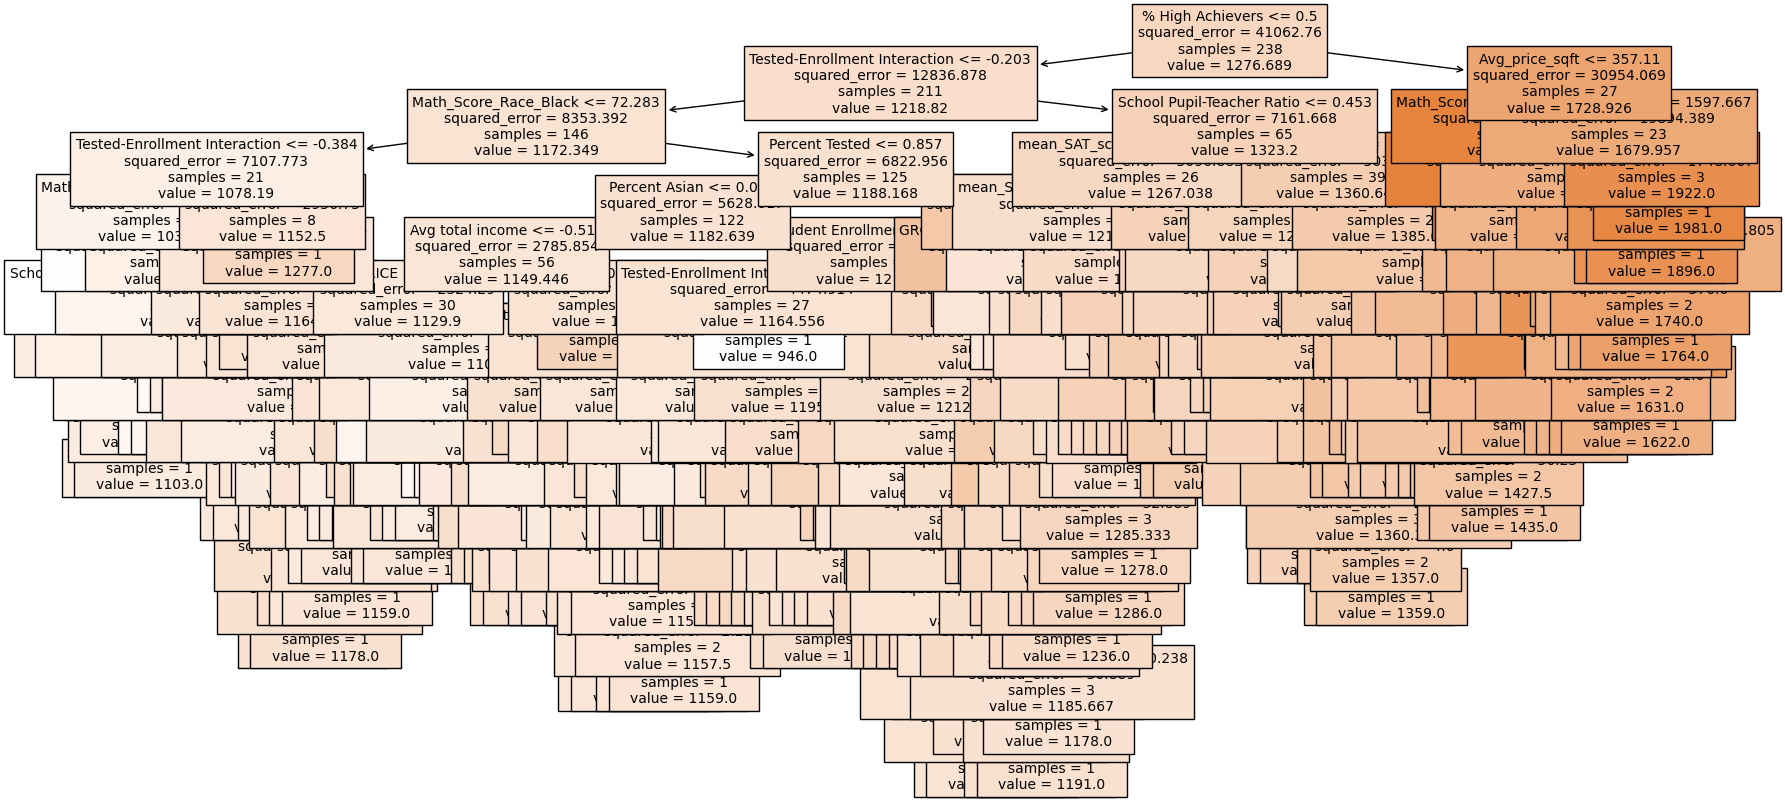

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=None)  # You can adjust max_depth to control the depth of the tree

# Fit the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Calculate and print metrics
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_regressor, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

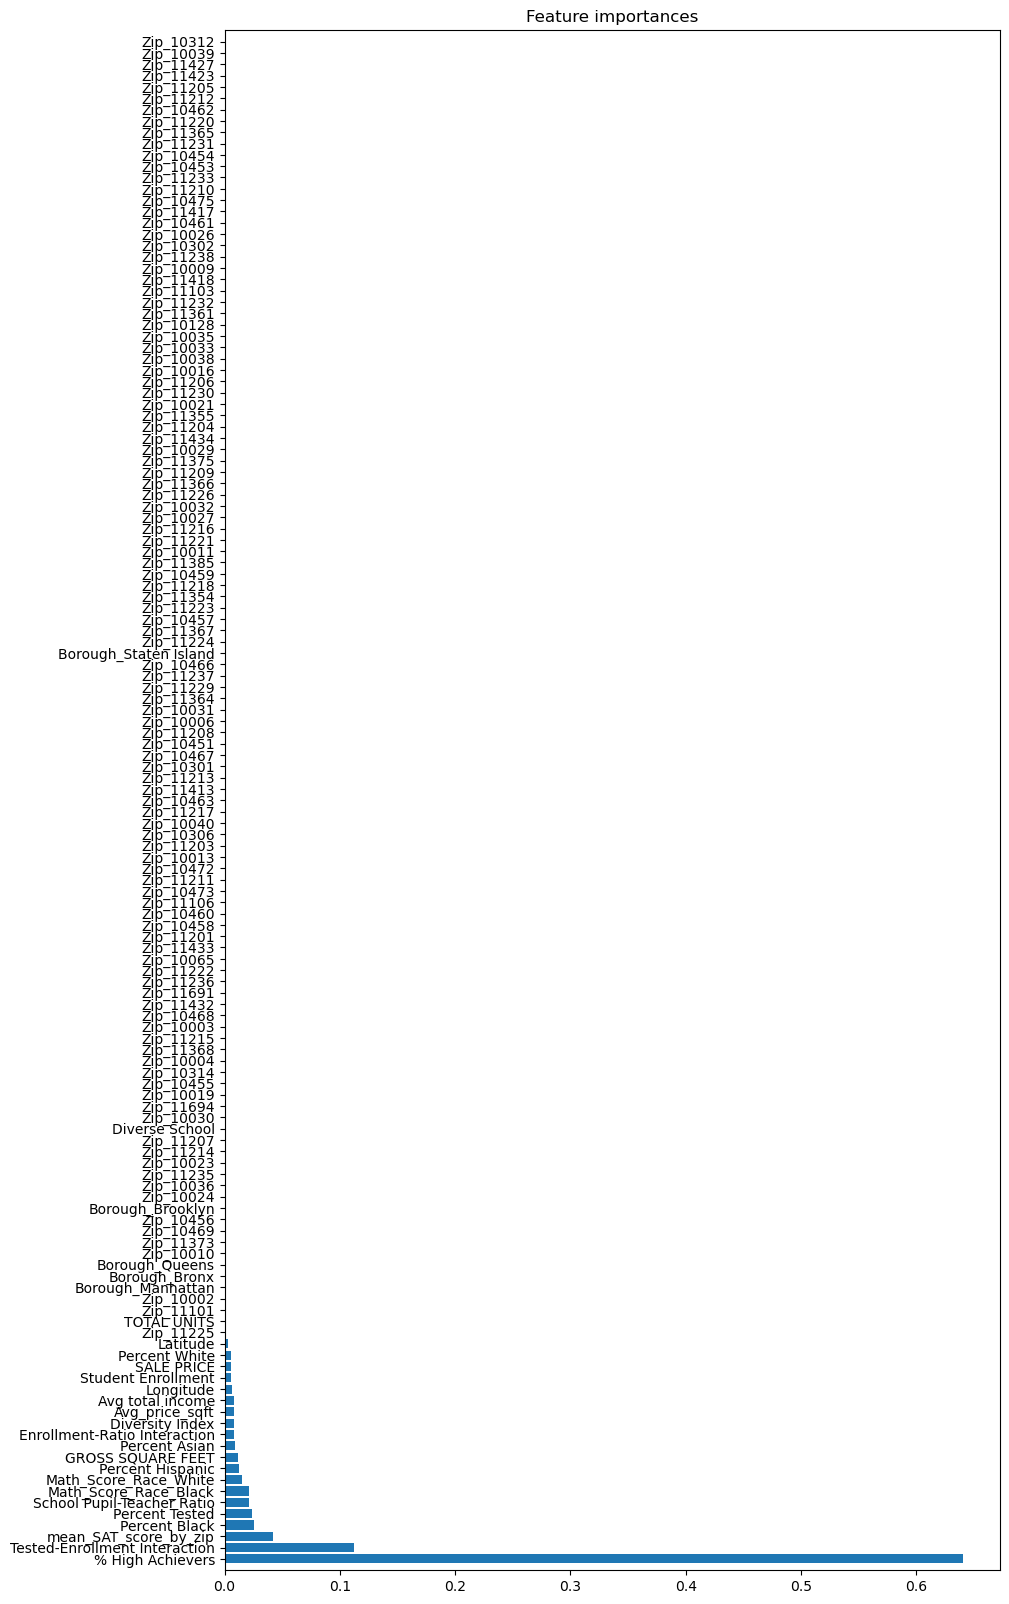

In [161]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_

import matplotlib.pyplot as plt

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 20))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
         align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()

In [162]:
correlation = new_data['SAT Cumulative Score'].corr(new_data['% High Achievers'])
print(correlation)

0.784394865185909


In [163]:
new_df = modeling_df.drop('% High Achievers', axis=1)

In [164]:
X = new_df.drop(columns=['SAT Cumulative Score'])  
y = new_df['SAT Cumulative Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # Note: Use median from X_train to avoid data leakage

In [169]:
import numpy as np

X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [171]:
nan_columns_train = X_train.columns[X_train.isna().any()].tolist()
nan_columns_test = X_test.columns[X_test.isna().any()].tolist()

print("Columns with NaN values in X_train:", nan_columns_train)
print("Columns with NaN values in X_test:", nan_columns_test)

Columns with NaN values in X_train: ['Avg_price_sqft']
Columns with NaN values in X_test: ['Avg_price_sqft']


In [172]:
median_value_train = X_train['Avg_price_sqft'].median()

X_train['Avg_price_sqft'].fillna(median_value_train, inplace=True)
X_test['Avg_price_sqft'].fillna(median_value_train, inplace=True) 

In [173]:
minmax_columns = ['School Pupil-Teacher Ratio', 'Percent White', 'Percent Black', 
                  'Percent Hispanic', 'Percent Asian', 'Percent Tested', 'Diverse School']

minmax_scaler = MinMaxScaler()
X_train[minmax_columns] = minmax_scaler.fit_transform(X_train[minmax_columns])
X_test[minmax_columns] = minmax_scaler.transform(X_test[minmax_columns])  

# Adjusted the columns list based on your earlier code
standardize_columns = ['Student Enrollment', 'GROSS SQUARE FEET', 
                       'TOTAL UNITS', 'Avg total income', 'Enrollment-Ratio Interaction',
                       'Tested-Enrollment Interaction']

standard_scaler = StandardScaler()
X_train[standardize_columns] = standard_scaler.fit_transform(X_train[standardize_columns])
X_test[standardize_columns] = standard_scaler.transform(X_test[standardize_columns])

In [174]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Evaluation
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


Training MAE: 0.0
Test MAE: 97.06666666666666
Training MSE: 0.0
Test MSE: 17513.966666666667
Training R^2: 1.0
Test R^2: 0.26563084697347583


In [177]:
from sklearn.model_selection import cross_validate

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Metrics we are interested in
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

# Apply k-fold cross-validation. For instance, using 5 folds:
scores = cross_validate(tree_model, X_train, y_train, cv=5, scoring=scoring)

# Display results
print("MAE for each fold:", -scores['test_neg_mean_absolute_error'])
print("Average MAE:", -scores['test_neg_mean_absolute_error'].mean())

print("\nMSE for each fold:", -scores['test_neg_mean_squared_error'])
print("Average MSE:", -scores['test_neg_mean_squared_error'].mean())

print("\nR^2 for each fold:", scores['test_r2'])
print("Average R^2:", scores['test_r2'].mean())




MAE for each fold: [ 66.8125      84.3125     101.64583333 126.55319149  91.61702128]
Average MAE: 94.18820921985817

MSE for each fold: [ 8077.60416667 10386.3125     20601.39583333 37035.74468085
 17630.59574468]
Average MSE: 18746.33058510638

R^2 for each fold: [0.80853747 0.41046792 0.53429387 0.34360282 0.59062668]
Average R^2: 0.537505753089488


In [178]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Evaluate the model
rf_train_mae = mean_absolute_error(y_train, rf_train_preds)

rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

rf_train_mse = mean_squared_error(y_train, rf_train_preds)
rf_test_mse = mean_squared_error(y_test, rf_test_preds)

rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

print(f"Random Forest - Training MAE: {rf_train_mae}")
print(f"Random Forest - Test MAE: {rf_test_mae}")
print(f"Random Forest - Training MSE: {rf_train_mse}")
print(f"Random Forest - Test MSE: {rf_test_mse}")
print(f"Random Forest - Training R^2: {rf_train_r2}")
print(f"Random Forest - Test R^2: {rf_test_r2}")

Random Forest - Training MAE: 25.547689075630245
Random Forest - Test MAE: 69.66116666666667
Random Forest - Training MSE: 1347.4429483193273
Random Forest - Test MSE: 10948.782128333334
Random Forest - Training R^2: 0.9671857680065112
Random Forest - Test R^2: 0.540912232432244


In [179]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Using 100 boosting stages

# Fit the model
gb_model.fit(X_train, y_train)

# Predictions
gb_train_preds = gb_model.predict(X_train)
gb_test_preds = gb_model.predict(X_test)

# Evaluate the model
gb_train_mae = mean_absolute_error(y_train, gb_train_preds)
gb_test_mae = mean_absolute_error(y_test, gb_test_preds)

gb_train_mse = mean_squared_error(y_train, gb_train_preds)
gb_test_mse = mean_squared_error(y_test, gb_test_preds)

gb_train_r2 = r2_score(y_train, gb_train_preds)
gb_test_r2 = r2_score(y_test, gb_test_preds)

print(f"Gradient Boosting - Training MAE: {gb_train_mae}")
print(f"Gradient Boosting - Test MAE: {gb_test_mae}")
print(f"Gradient Boosting - Training MSE: {gb_train_mse}")
print(f"Gradient Boosting - Test MSE: {gb_test_mse}")
print(f"Gradient Boosting - Training R^2: {gb_train_r2}")
print(f"Gradient Boosting - Test R^2: {gb_test_r2}")






Gradient Boosting - Training MAE: 20.667747938452806
Gradient Boosting - Test MAE: 75.88566477377671
Gradient Boosting - Training MSE: 685.3537690910966
Gradient Boosting - Test MSE: 11376.27214524671
Gradient Boosting - Training R^2: 0.9833096031229981
Gradient Boosting - Test R^2: 0.5229873678014652


In [180]:
from sklearn.model_selection import GridSearchCV

# Set the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, 
                           cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [181]:
# Initialize the Decision Tree with the best hyperparameters
optimized_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)

# Fit the model
optimized_tree.fit(X_train, y_train)

# Predictions
train_preds = optimized_tree.predict(X_train)
test_preds = optimized_tree.predict(X_test)

# Evaluate
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Optimized Decision Tree - Training MAE: {train_mae}")
print(f"Optimized Decision Tree - Test MAE: {test_mae}\n")
print(f"Optimized Decision Tree - Training MSE: {train_mse}")
print(f"Optimized Decision Tree - Test MSE: {test_mse}\n")
print(f"Optimized Decision Tree - Training R^2: {train_r2}")
print(f"Optimized Decision Tree - Test R^2: {test_r2}")

Optimized Decision Tree - Training MAE: 35.867567026810725
Optimized Decision Tree - Test MAE: 91.30646825396825

Optimized Decision Tree - Training MSE: 2927.101380552221
Optimized Decision Tree - Test MSE: 16111.690090986394

Optimized Decision Tree - Training R^2: 0.9287164002826939
Optimized Decision Tree - Test R^2: 0.32442898681184806


In [182]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2']
}

tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [183]:
# Train and evaluate the tree with the new hyperparameters
optimized_tree = DecisionTreeRegressor(
    max_depth=None,
    max_features=None,
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)

optimized_tree.fit(X_train, y_train)

# Predictions
train_preds = optimized_tree.predict(X_train)
test_preds = optimized_tree.predict(X_test)

# Evaluate
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Optimized Decision Tree - Training MAE: {train_mae}")
print(f"Optimized Decision Tree - Test MAE: {test_mae}\n")
print(f"Optimized Decision Tree - Training MSE: {train_mse}")
print(f"Optimized Decision Tree - Test MSE: {test_mse}\n")
print(f"Optimized Decision Tree - Training R^2: {train_r2}")
print(f"Optimized Decision Tree - Test R^2: {test_r2}")



Optimized Decision Tree - Training MAE: 58.09854182747815
Optimized Decision Tree - Test MAE: 88.10268916268916

Optimized Decision Tree - Training MSE: 7633.234968537778
Optimized Decision Tree - Test MSE: 14941.151876390222

Optimized Decision Tree - Training R^2: 0.8141080901192642
Optimized Decision Tree - Test R^2: 0.37351022429497127


In [184]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

# Calculate metrics for Ridge
print("Ridge - Training MSE:", mean_squared_error(y_train, ridge_train_preds))
print("Ridge - Test MSE:", mean_squared_error(y_test, ridge_test_preds))
print("Ridge - Training R^2:", r2_score(y_train, ridge_train_preds))
print("Ridge - Test R^2:", r2_score(y_test, ridge_test_preds))

# Calculate metrics for Lasso
print("\nLasso - Training MSE:", mean_squared_error(y_train, lasso_train_preds))
print("Lasso - Test MSE:", mean_squared_error(y_test, lasso_test_preds))
print("Lasso - Training R^2:", r2_score(y_train, lasso_train_preds))
print("Lasso - Test R^2:", r2_score(y_test, lasso_test_preds))
print("Lasso coefficients:", lasso.coef_)






Ridge - Training MSE: 3058.7791642133593
Ridge - Test MSE: 8718.049392028503
Ridge - Training R^2: 0.9255096557249116
Ridge - Test R^2: 0.6344479426095722

Lasso - Training MSE: 3283.525137553252
Lasso - Test MSE: 8027.414247640498
Lasso - Training R^2: 0.9200364247298803
Lasso - Test R^2: 0.663406610607945
Lasso coefficients: [ 2.81518534e+01 -0.00000000e+00 -0.00000000e+00 -1.45789241e+02
 -1.24953026e+02  0.00000000e+00  6.21548269e+01  2.87949813e+01
  0.00000000e+00 -0.00000000e+00  5.54507403e+00  1.67434576e+00
  0.00000000e+00  9.25498152e+00  2.67646340e+02  1.78876474e+02
  8.13759885e+00 -0.00000000e+00  1.78741608e+01 -0.00000000e+00
  2.55441696e+00  0.00000000e+00 -6.12669022e+00  0.00000000e+00
 -2.89344531e-02  1.53659830e+00  5.95439514e+00 -2.32443730e-01
  0.00000000e+00 -1.42743755e+00  3.33927248e+00 -9.17576594e+00
  3.18364072e+00  0.00000000e+00 -5.92689979e+00 -4.22562538e+00
  7.56652497e+00 -5.87277155e-01  2.51001929e+00 -0.00000000e+00
  6.24178780e+00 -2.2

In [185]:
from sklearn.linear_model import Lasso

# Assuming you've already created your model and fit it
lasso = Lasso(alpha=best_alpha)  # Replace best_alpha with the optimal alpha you've found
lasso.fit(X_train, y_train)

# Get the feature importance
feature_importance = lasso.coef_

# Pair each feature name with its coefficient
features = list(X_train.columns)
feature_pairs = list(zip(features, feature_importance))

# Sort by absolute value
sorted_features = sorted(feature_pairs, key=lambda x: abs(x[1]), reverse=True)

# Display the sorted features
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")



Percent White: -539.6348932308476
Percent Black: -277.95340700158
Percent Asian: 244.17293339573806
Percent Tested: 98.77703438136847
Tested-Enrollment Interaction: 47.404657900878085
Borough_Brooklyn: -44.917298823676965
School Pupil-Teacher Ratio: 41.002241567543436
Zip_11211: 36.08979200319353
Zip_11214: -31.57131137330645
Student Enrollment: -23.262918789650726
Borough_Manhattan: 15.074004507275639
Borough_Bronx: 13.58143143208175
Enrollment-Ratio Interaction: -9.906212792788558
GROSS SQUARE FEET: 6.878732900103307
Borough_Staten Island: -6.58762923400552
Zip_10468: 4.634003978285201
Avg total income: -3.2855137137281596
Zip_11433: 3.228692512851339
Math_Score_Race_White: 2.9381223178460556
TOTAL UNITS: -1.2639727246234458
Math_Score_Race_Black: 1.1958568280052737
mean_SAT_score_by_zip: 0.25699183933855824
Avg_price_sqft: -0.007261193592164722
SALE PRICE: 6.953108327813661e-06
Latitude: 0.0
Longitude: 0.0
Percent Hispanic: 0.0
Diversity Index: 0.0
Diverse School: -0.0
Zip_10002: -0

Correlation between Percent White and Target Variable: 0.61


/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



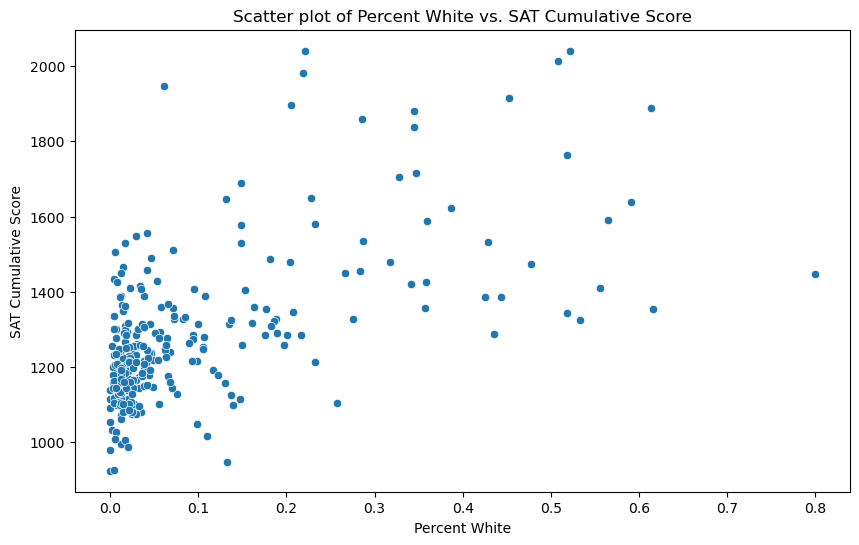

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation Coefficient
correlation = np.corrcoef(new_df['Percent White'], new_df['SAT Cumulative Score'])[0, 1]
print(f'Correlation between Percent White and Target Variable: {correlation:.2f}')

# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(new_data['Percent White'], new_df['SAT Cumulative Score'])
plt.title('Scatter plot of Percent White vs. SAT Cumulative Score')
plt.show()

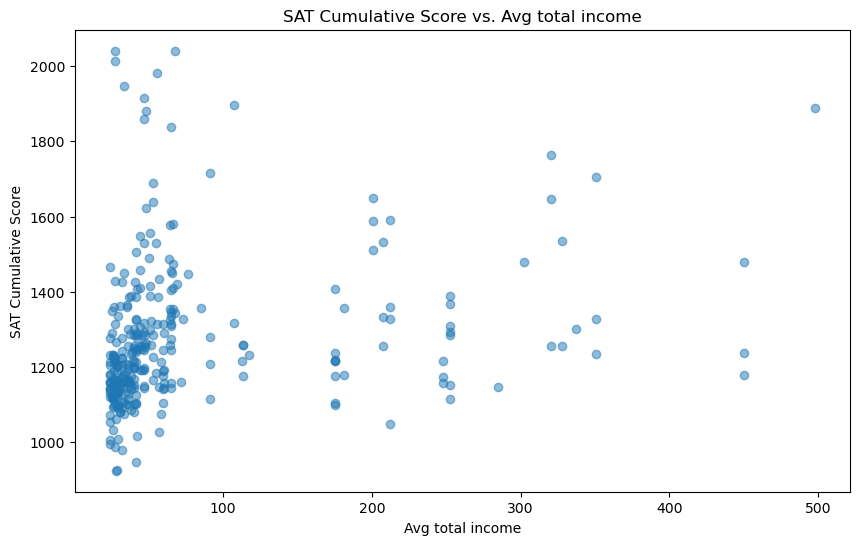

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe called df
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Avg total income'], new_df['SAT Cumulative Score'], alpha=0.5)
plt.title('SAT Cumulative Score vs. Avg total income')
plt.xlabel('Avg total income')
plt.ylabel('SAT Cumulative Score')
plt.show()

In [203]:
# Filter the data for households making less than 100k
filtered_data = new_data[new_data['Avg total income'] < 100000]

# Sort this filtered data by 'SAT Cumulative Score' in descending order and get the top 6
top_scores = filtered_data.sort_values(by='SAT Cumulative Score', ascending=False).head(6)

In [201]:
new_data.columns

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'Zip Code', 'Latitude', 'Longitude', 'Phone Number',
       'Start Time', 'End Time', 'Student Enrollment', 'Percent White',
       'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income',
       'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE', 'Avg_price_sqft',
       'School Pupil-Teacher Ratio', 'SAT Cumulative Score',
       'Math_Score_Race_White', 'Math_Score_Race_Black',
       'mean_SAT_score_by_zip', 'SAT Scores per Student', '% High Achievers',
       'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction',
       'Diversity Index', 'Diverse School'],
      dtype='object')

In [204]:
top_zip_codes = top_scores['Zip Code'].tolist()
print(top_zip_codes)

[10468, 10306, 10468, 11367, 11433, 10002]


In [206]:
schools_in_zip = new_data[new_data['Zip Code'].isin(top_zip_codes)]['School Name'].unique().tolist()
print(schools_in_zip)

['NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL', 'ESSEX STREET ACADEMY', 'LOWER MANHATTAN ARTS ACADEMY', 'HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES', 'HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES', 'BARD HIGH SCHOOL EARLY COLLEGE', 'MARTA VALLE HIGH SCHOOL', 'UNIVERSITY NEIGHBORHOOD HIGH SCHOOL', 'NEW DESIGN HIGH SCHOOL', 'PACE HIGH SCHOOL', 'STATEN ISLAND TECHNICAL HIGH SCHOOL', 'NEW DORP HIGH SCHOOL', 'HIGH SCHOOL FOR TEACHING AND THE PROFESSIONS', 'BRONX HIGH SCHOOL OF SCIENCE', 'KINGSBRIDGE INTERNATIONAL HIGH SCHOOL', 'DISCOVERY HIGH SCHOOL', 'HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE', 'DEWITT CLINTON HIGH SCHOOL', 'INTERNATIONAL SCHOOL FOR LIBERAL ARTS', 'JOHN BOWNE HIGH SCHOOL', 'TOWNSEND HARRIS HIGH SCHOOL', 'YORK EARLY COLLEGE ACADEMY', 'QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE']


In [208]:
potential_private = new_data[new_data['School Name'].str.contains('Academy|Institute|Prep|Science|Technology|Sciences', case=False, na=False)]

In [209]:
filtered_data = new_data[~new_data['School Name'].isin(potential_private['School Name'].unique())]

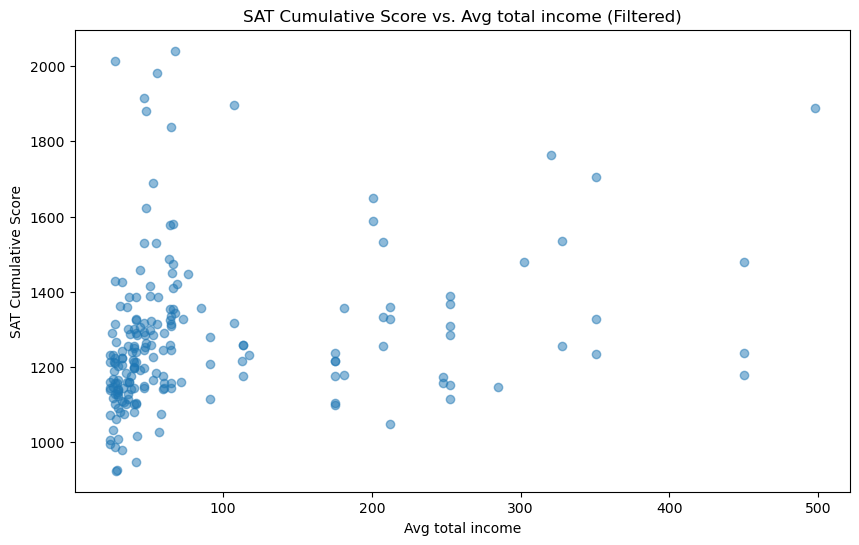

In [210]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Avg total income'], filtered_data['SAT Cumulative Score'], alpha=0.5)
plt.title('SAT Cumulative Score vs. Avg total income (Filtered)')
plt.xlabel('Avg total income')
plt.ylabel('SAT Cumulative Score')
plt.show()

In [211]:
correlation_coefficient = filtered_data['Avg total income'].corr(filtered_data['SAT Cumulative Score'])
print(f"Correlation between 'Avg total income' and 'SAT Cumulative Score': {correlation_coefficient:.3f}")

Correlation between 'Avg total income' and 'SAT Cumulative Score': 0.242


In [213]:
races = ['White', 'Black', 'Hispanic', 'Asian']

plt.figure(figsize=(12, 8))

for race in races:
    subset = new_data[new_data['Race'] == race]
    plt.scatter(subset['Avg total income'], subset['SAT Cumulative Score'], alpha=0.5, label=race)

plt.title('SAT Cumulative Score vs. Avg total income by Race')
plt.xlabel('Avg total income')
plt.ylabel('SAT Cumulative Score')
plt.legend()
plt.show()

KeyError: 'Race'

<Figure size 1200x800 with 0 Axes>

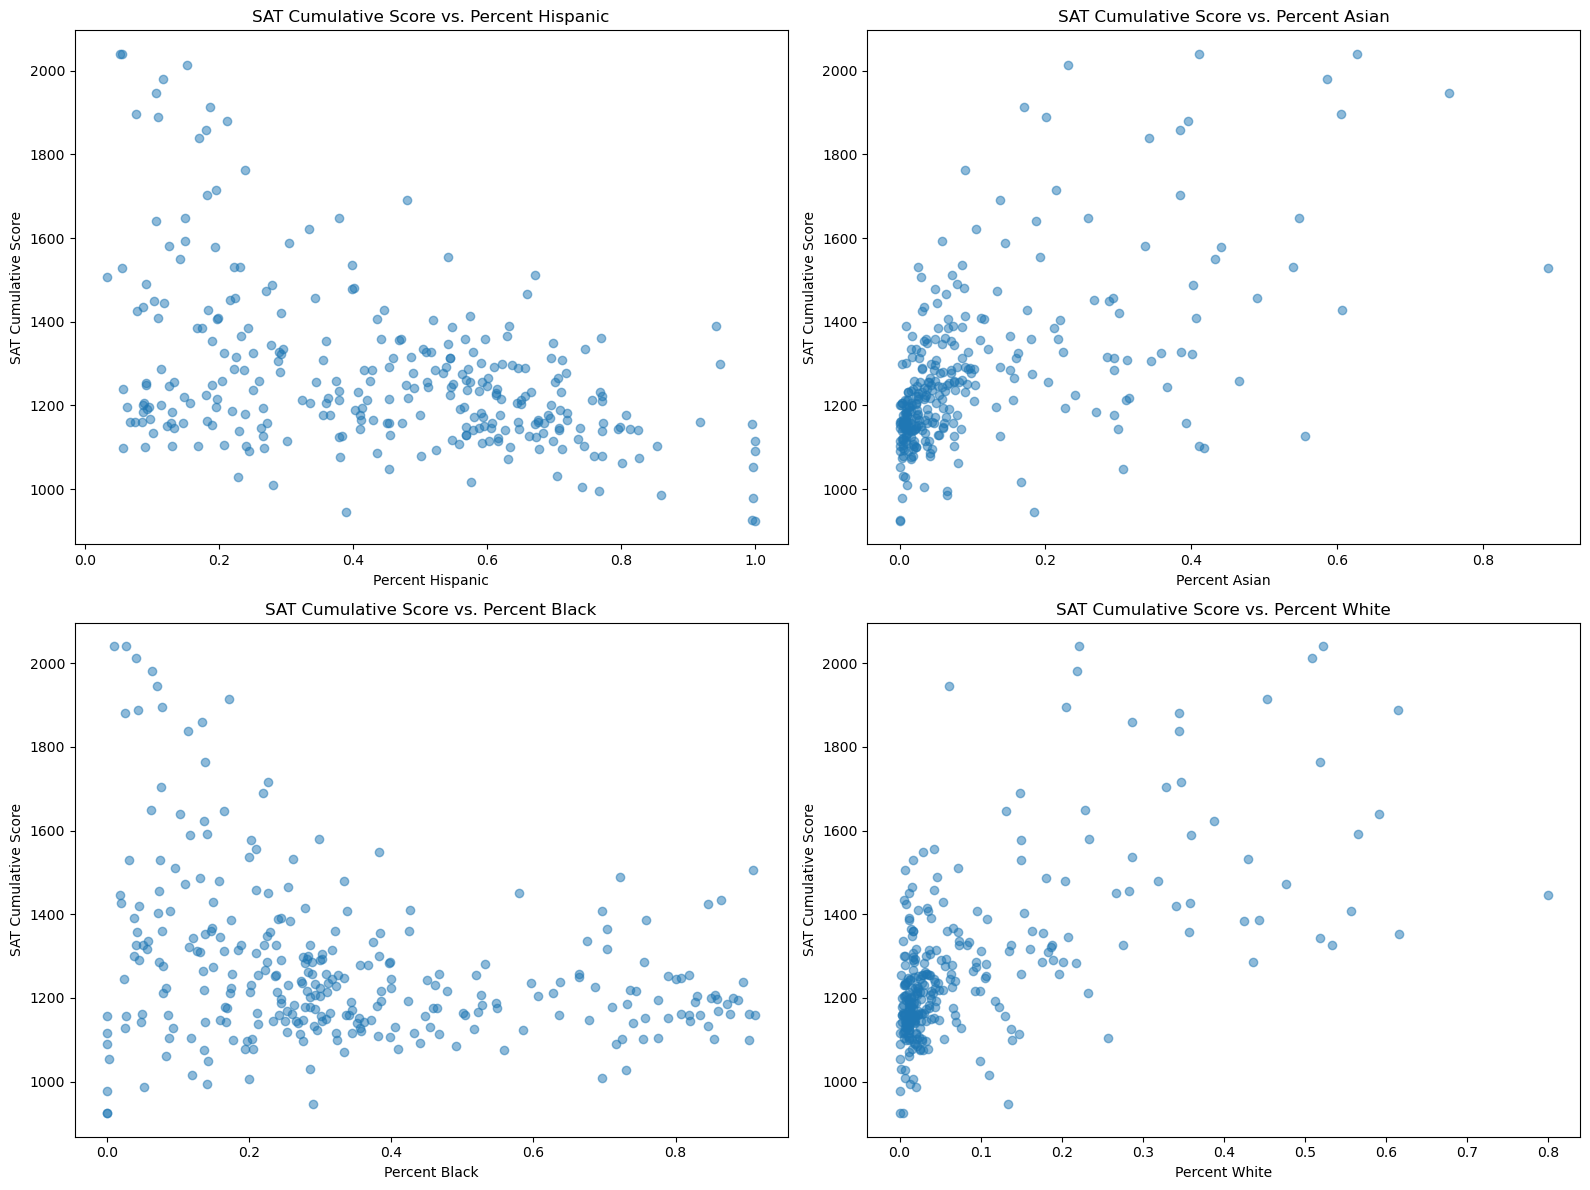

In [215]:
plt.figure(figsize=(16, 12))

# Define list of racial percentage columns
racial_columns = ['Percent Hispanic', 'Percent Asian', 'Percent Black', 'Percent White']

for idx, race in enumerate(racial_columns, 1):
    plt.subplot(2, 2, idx)  # 2x2 grid of plots
    plt.scatter(new_data[race], new_data['SAT Cumulative Score'], alpha=0.5)
    plt.title(f'SAT Cumulative Score vs. {race}')
    plt.xlabel(race)
    plt.ylabel('SAT Cumulative Score')

plt.tight_layout()
plt.show()

In [219]:
print(new_data[['Avg total income', 'SAT Cumulative Score']].dtypes)

Avg total income        float64
SAT Cumulative Score    float64
dtype: object


In [220]:
new_data['Avg total income'] = pd.to_numeric(new_data['Avg total income'], errors='coerce')
new_data['SAT Cumulative Score'] = pd.to_numeric(new_data['SAT Cumulative Score'], errors='coerce')

Size of subset for income bracket (0, 50000): 0
Size of subset for income bracket (50001, 100000): 0
Size of subset for income bracket (100001, 150000): 0
Size of subset for income bracket (150001, 200000): 0
Size of subset for income bracket (200001, 250000): 0
Size of subset for income bracket (250001, 500000): 0


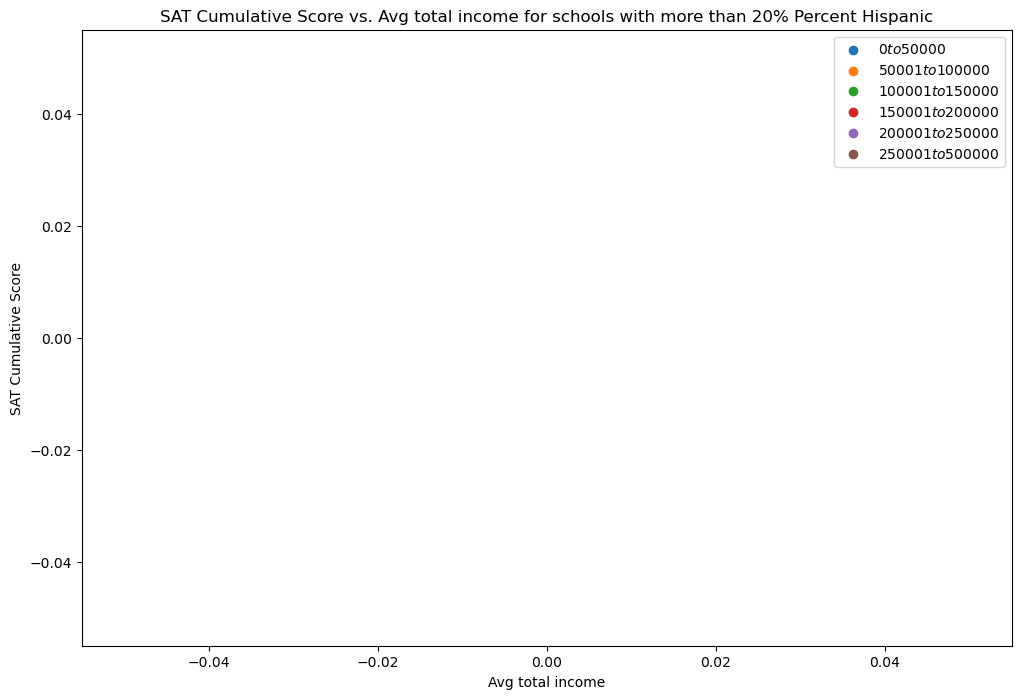

In [228]:
# Convert columns to appropriate data types
new_data['Avg total income'] = pd.to_numeric(new_data['Avg total income'] * 1000, errors='coerce')
new_data['SAT Cumulative Score'] = pd.to_numeric(new_data['SAT Cumulative Score'], errors='coerce')

def plot_income_brackets_for_race(data, race_column, threshold=0, score_column='SAT Cumulative Score'):
    plt.figure(figsize=(12, 8))

    # Define income brackets based on your data's distribution
    income_brackets = [(0, 50000), (50001, 100000), (100001, 150000), (150001, 200000), (200001, 250000), (250001, 500000)]
    
    # Filter data for schools with a percentage greater than the threshold for the given race
    subset = data[data[race_column] > threshold]

    z = 1  # zorder value
    for bracket in income_brackets:
        income_subset = subset[(subset['Avg total income'] > bracket[0]) & (subset['Avg total income'] <= bracket[1])]
        
        # Print the size of each subset
        print(f"Size of subset for income bracket {bracket}: {len(income_subset)}")
        
        plt.scatter(income_subset['Avg total income'], income_subset[score_column], alpha=1, label=f"${bracket[0]} to ${bracket[1]}", zorder=z)
        z += 1  # Increase zorder for next series

    plt.title(f'{score_column} vs. Avg total income for schools with more than {threshold}% {race_column}')
    plt.xlabel('Avg total income')
    plt.ylabel(score_column)
    plt.legend()
    plt.show()

# Example for Hispanic, with a lowered threshold (e.g., 20%)
plot_income_brackets_for_race(new_data, 'Percent Hispanic', 20)

Size of subset for income bracket (0, 50000): 0
Size of subset for income bracket (50001, 100000): 0
Size of subset for income bracket (100001, 150000): 0
Size of subset for income bracket (150001, 200000): 0
Size of subset for income bracket (200001, 250000): 0
Size of subset for income bracket (250001, 500000): 0


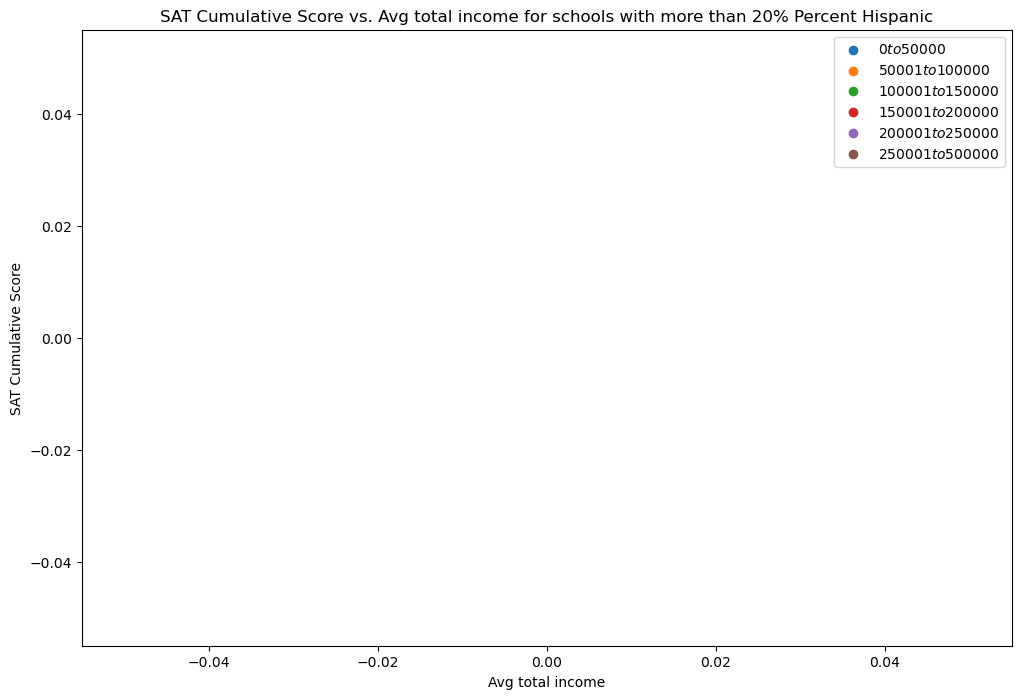

In [225]:
# Convert the Avg total income column to standard dollar representation
new_data['Avg total income'] = new_data['Avg total income'] * 1000

def plot_income_brackets_for_race(data, race_column, threshold=0, score_column='SAT Cumulative Score'):
    plt.figure(figsize=(12, 8))

    # Define income brackets based on your data's distribution
    income_brackets = [(0, 50000), (50001, 100000), (100001, 150000), (150001, 200000), (200001, 250000), (250001, 500000)]
    
    # Filter data for schools with a percentage greater than the threshold for the given race
    subset = data[data[race_column] > threshold]

    z = 1  # zorder value
    for bracket in income_brackets:
        income_subset = subset[(subset['Avg total income'] > bracket[0]) & (subset['Avg total income'] <= bracket[1])]
        
        # Print the size of each subset
        print(f"Size of subset for income bracket {bracket}: {len(income_subset)}")
        
        plt.scatter(income_subset['Avg total income'], income_subset[score_column], alpha=1, label=f"${bracket[0]} to ${bracket[1]}", zorder=z)
        z += 1  # Increase zorder for next series

    plt.title(f'{score_column} vs. Avg total income for schools with more than {threshold}% {race_column}')
    plt.xlabel('Avg total income')
    plt.ylabel(score_column)
    plt.legend()
    plt.show()

# Example for Hispanic, with a lowered threshold (e.g., 20%)
plot_income_brackets_for_race(new_data, 'Percent Hispanic', 20)

Size of subset for income bracket (0, 50000): 0
Size of subset for income bracket (50001, 100000): 0
Size of subset for income bracket (100001, 150000): 0
Size of subset for income bracket (150001, 200000): 0
Size of subset for income bracket (200001, 250000): 0
Size of subset for income bracket (250001, 500000): 0


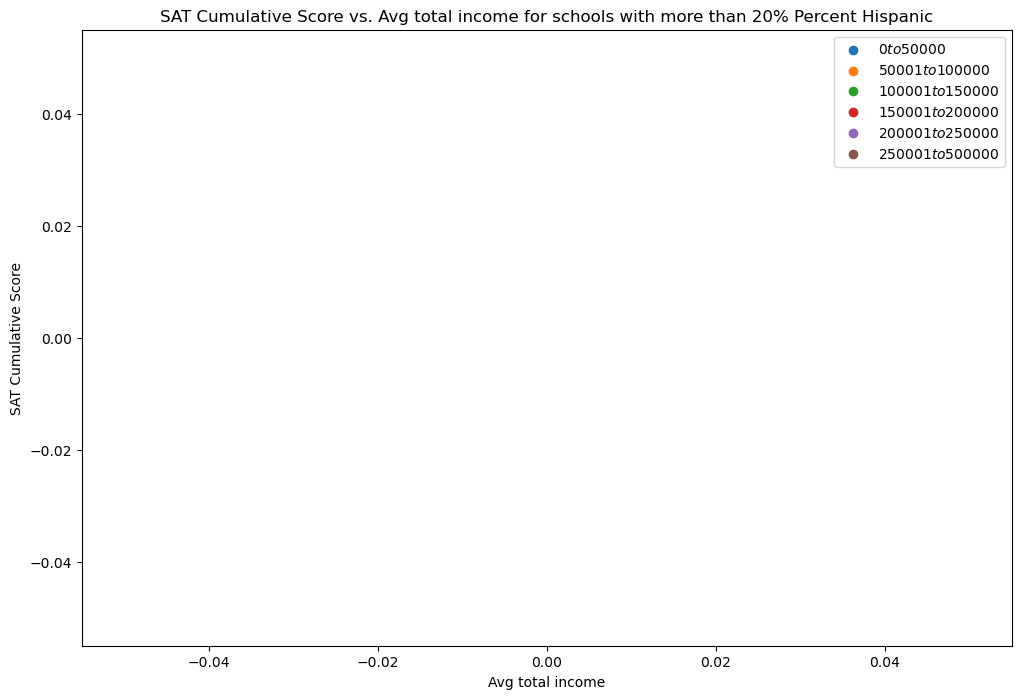

In [226]:
# Convert columns to appropriate data types
new_data['Avg total income'] = new_data['Avg total income'] * 1000
new_data['Avg total income'] = new_data['Avg total income'].astype(float)
new_data['SAT Cumulative Score'] = new_data['SAT Cumulative Score'].astype(float)

def plot_income_brackets_for_race(data, race_column, threshold=0, score_column='SAT Cumulative Score'):
    plt.figure(figsize=(12, 8))

    # Define income brackets based on your data's distribution
    income_brackets = [(0, 50000), (50001, 100000), (100001, 150000), (150001, 200000), (200001, 250000), (250001, 500000)]
    
    # Filter data for schools with a percentage greater than the threshold for the given race
    subset = data[data[race_column] > threshold]

    z = 1  # zorder value
    for bracket in income_brackets:
        income_subset = subset[(subset['Avg total income'] > bracket[0]) & (subset['Avg total income'] <= bracket[1])]
        
        # Print the size of each subset
        print(f"Size of subset for income bracket {bracket}: {len(income_subset)}")
        
        plt.scatter(income_subset['Avg total income'], income_subset[score_column], alpha=1, label=f"${bracket[0]} to ${bracket[1]}", zorder=z)
        z += 1  # Increase zorder for next series

    plt.title(f'{score_column} vs. Avg total income for schools with more than {threshold}% {race_column}')
    plt.xlabel('Avg total income')
    plt.ylabel(score_column)
    plt.legend()
    plt.show()

# Example for Hispanic, with a lowered threshold (e.g., 20%)
plot_income_brackets_for_race(new_data, 'Percent Hispanic', 20)

In [170]:
print(X_train.columns)
print(X_test.columns)

Index(['Latitude', 'Longitude', 'Student Enrollment', 'Percent White',
       'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested',
       'Avg total income', 'TOTAL UNITS',
       ...
       'Zip_11432', 'Zip_11433', 'Zip_11434', 'Zip_11691', 'Zip_11694',
       'Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan',
       'Borough_Queens', 'Borough_Staten Island'],
      dtype='object', length=135)
Index(['Latitude', 'Longitude', 'Student Enrollment', 'Percent White',
       'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested',
       'Avg total income', 'TOTAL UNITS',
       ...
       'Zip_11432', 'Zip_11433', 'Zip_11434', 'Zip_11691', 'Zip_11694',
       'Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan',
       'Borough_Queens', 'Borough_Staten Island'],
      dtype='object', length=135)


In [171]:
print(modeling_df.columns[:30])

Index(['Latitude', 'Longitude', 'Student Enrollment', 'Percent White',
       'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested',
       'Avg total income', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE',
       'Avg_price_sqft', 'School Pupil-Teacher Ratio', 'SAT Cumulative Score',
       'Math_Score_Race_White', 'Math_Score_Race_Black',
       'mean_SAT_score_by_zip', '% High Achievers',
       'Enrollment-Ratio Interaction', 'Tested-Enrollment Interaction',
       'Diversity Index', 'Diverse School', 'Zip_10002', 'Zip_10003',
       'Zip_10004', 'Zip_10006', 'Zip_10009', 'Zip_10010', 'Zip_10011'],
      dtype='object')


In [172]:
from sklearn.linear_model import Ridge

# If you've already found the best alpha using RidgeCV, use it here:
best_alpha = ridge_regressor_cv.alpha_

ridge_regressor = Ridge(alpha=best_alpha)

# Selecting more features for training
selected_features = [
    'Tested-Enrollment Interaction', 
    '% High Achievers', 
    'Diversity Index', 
    'Math_Score_Race_White',
    'Enrollment-Ratio Interaction'
]
simplified_X_train = X_train[selected_features]
ridge_regressor.fit(simplified_X_train, y_train)

y_train_pred = ridge_regressor.predict(simplified_X_train)
y_test_pred = ridge_regressor.predict(X_test[selected_features])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))





Training MAE: 73.1866403099634
Test MAE: 73.07453088005833
Training MSE: 9578.43942835081
Test MSE: 10126.05605157316
Training R^2: 0.7667365924995024
Test R^2: 0.5754095375637602


In [173]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust the number of estimators and other hyperparameters as needed.

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Training MAE: 24.981596638655457
Test MAE: 63.99366666666666
Training MSE: 1164.684383193277
Test MSE: 8042.120739999999
Training R^2: 0.9716364810866632
Test R^2: 0.662789960220081


In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [192]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
knn = KNeighborsRegressor(n_neighbors=5) 

knn.fit(X_train_scaled, y_train)

# Predict on training and test set
train_preds = knn.predict(X_train_scaled)
test_preds = knn.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)

Training MSE: 17717.490084033616
Test MSE: 19238.982000000004
Training R^2: 0.5685265705052812
Test R^2: 0.19330011382729528


In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 31)}  # checking for k from 1 to 30

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)


Best k: 12


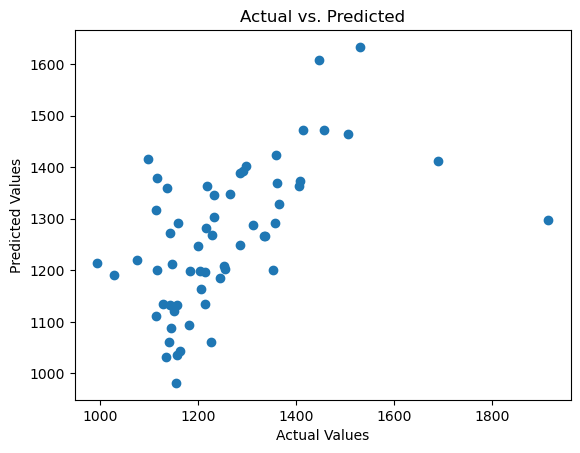

In [442]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

In [443]:
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [ 64.10962242 498.92355079]
Intercept: 995.3359094220907


In [ ]:
y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['% High Achievers', 'Percent Tested']])

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe called df
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg total income'], df['SAT Cumulative Score'], alpha=0.5)
plt.title('SAT Cumulative Score vs. Avg total income')
plt.xlabel('Avg total income')
plt.ylabel('SAT Cumulative Score')
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [444]:
next_15['Avg_price_sqft'].replace(np.inf, np.nan, inplace=True)
mean_value = next_15['Avg_price_sqft'].mean()
next_15['Avg_price_sqft'].fillna(mean_value, inplace=True)

In [131]:
y_train_pred = regressor.predict(simplified_X_train)
y_test_pred = regressor.predict(X_test[['Student Enrollment', 'Diversity Index']])

NameError: name 'regressor' is not defined

In [446]:
try:
    regressor.fit(X_train, y_train)
    print("Model trained successfully!")
except Exception as e:
    print(f"Error: {e}")

Error: could not convert string to float: 'Manhattan'


In [447]:
nan_counts = X_train.isna().sum()
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


In [448]:
inf_counts = (X_train == np.inf).sum()
neg_inf_counts = (X_train == -np.inf).sum()

print("Positive infinity counts:\n", inf_counts[inf_counts > 0])
print("\nNegative infinity counts:\n", neg_inf_counts[neg_inf_counts > 0])

Positive infinity counts:
 Avg_price_sqft    24
dtype: int64

Negative infinity counts:
 Series([], dtype: int64)


In [449]:
X_train.fillna(X_train.mean(), inplace=True)

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_20236/694844596.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [450]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [451]:
try:
    regressor.fit(X_train, y_train)
    print("Model trained successfully!")
except Exception as e:
    print(f"Error: {e}")

Error: could not convert string to float: 'Manhattan'


In [452]:
nan_cols = X_train.columns[X_train.isna().any()].tolist()
print("Columns with NaN values:", nan_cols)

Columns with NaN values: ['Avg_price_sqft']


In [453]:
# Replace NaN values with the median of the column
median_value = X_train['Avg_price_sqft'].median()
X_train['Avg_price_sqft'].fillna(median_value, inplace=True)

In [454]:
try:
    regressor.fit(X_train, y_train)
    print("Model trained successfully!")
except Exception as e:
    print(f"Error: {e}")

Error: could not convert string to float: 'Manhattan'


In [132]:
columns_to_drop = ['Math_Score_Race_White', 'Percent White', 'Math_Score_Race_Black', 'Percent Black']

X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [133]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Model coefficients shape:", regressor.coef_.shape)

X_train shape: (238, 24)
X_test shape: (60, 24)


NameError: name 'regressor' is not defined

In [134]:
regressor.fit(X_train, y_train)

NameError: name 'regressor' is not defined

In [458]:
X_test['Avg_price_sqft'].isna().sum()

0

In [459]:
X_test['Avg_price_sqft'].fillna(X_train['Avg_price_sqft'].mean(), inplace=True)

In [460]:
print((X_test == np.inf).sum().sum())
print((X_test == -np.inf).sum().sum())

6
0


In [461]:
print(X_test.isna().sum())

Borough                          0
Zip Code                         0
Latitude                         0
Longitude                        0
Student Enrollment               0
Percent Hispanic                 0
Percent Asian                    0
Average Score (SAT Math)         0
Average Score (SAT Reading)      0
Average Score (SAT Writing)      0
Percent Tested                   0
Avg total income                 0
TOTAL UNITS                      0
GROSS SQUARE FEET                0
SALE PRICE                       0
Avg_price_sqft                   0
School Pupil-Teacher Ratio       0
mean_SAT_score_by_zip            0
SAT Scores per Student           0
% High Achievers                 0
Enrollment-Ratio Interaction     0
Tested-Enrollment Interaction    0
Diversity Index                  0
Diverse School                   0
dtype: int64


In [462]:
inf_columns = (X_test == np.inf).sum()
print(inf_columns[inf_columns > 0])

Avg_price_sqft    6
dtype: int64


In [463]:
# Calculate the mean from the training set
mean_value_train = X_train['Avg_price_sqft'].replace([np.inf, -np.inf], np.nan).mean()

# Replace infinities in the test set using the mean from the training set
X_test['Avg_price_sqft'] = X_test['Avg_price_sqft'].replace(np.inf, mean_value_train)

In [464]:
inf_columns = (X_test == np.inf).sum()
print(inf_columns[inf_columns > 0])

Series([], dtype: int64)


In [465]:
print((X_test == np.inf).sum())
print((X_test == -np.inf).sum())

Borough                          0
Zip Code                         0
Latitude                         0
Longitude                        0
Student Enrollment               0
Percent Hispanic                 0
Percent Asian                    0
Average Score (SAT Math)         0
Average Score (SAT Reading)      0
Average Score (SAT Writing)      0
Percent Tested                   0
Avg total income                 0
TOTAL UNITS                      0
GROSS SQUARE FEET                0
SALE PRICE                       0
Avg_price_sqft                   0
School Pupil-Teacher Ratio       0
mean_SAT_score_by_zip            0
SAT Scores per Student           0
% High Achievers                 0
Enrollment-Ratio Interaction     0
Tested-Enrollment Interaction    0
Diversity Index                  0
Diverse School                   0
dtype: int64
Borough                          0
Zip Code                         0
Latitude                         0
Longitude                        0
Student

In [467]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00


In [468]:
print("Actual Values:", y_test[:10])
print("Predicted Values:", y_pred[:10])

Actual Values: 159    1245.0
264    1530.0
254    1361.0
9      1292.0
77     1164.0
234    1506.0
93     1145.0
109    1229.0
5      1914.0
172    1219.0
Name: SAT Cumulative Score, dtype: float64
Predicted Values: [1245.         1529.99999999 1361.         1292.         1164.
 1506.00000001 1145.         1229.         1913.99999999 1219.00000001]
